<a href="https://colab.research.google.com/github/ananyafiu/Energy-Consumption/blob/main/CAP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Energy Data Preparation

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 359.2 gigabytes of available RAM

You are using a high-RAM runtime!


**Importing Libraries **

In [ ]:
pip install git+https://github.com/RJT1990/pyflux

  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-rx4p66of
  Running command git clone --filter=blob:none --quiet https://github.com/RJT1990/pyflux /tmp/pip-req-build-rx4p66of
  Resolved https://github.com/RJT1990/pyflux to commit 297f2afc2095acd97c12e827dd500e8ea5da0c0f
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 1.4 MB/s eta 0:00:00


In [ ]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
pip install pyflux

  Using cached pyflux-0.4.15.tar.gz (1.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached numdifftools-0.9.41-py2.py3-none-any.whl (100 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyflux
  Running setup.py clean for pyflux
Failed to build pyflux
ERROR: Could not build wheels for pyflux, which is required to install pyproject.toml-based projects


In [ ]:
import pandas as pd
import numpy as np
import chardet
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
import os
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Energy Data

> We are predicting for energy demand in the future- therefore we are taking only energy sum i.e. total energy use per day for a given household.

In [ ]:
# Function to read CSV files with automatically detected encoding
def read_csv_with_auto_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']
    try:
        return pd.read_csv(file_path, encoding=encoding)
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError: Unable to read {file_path} with {encoding} encoding.")
        return None

In [ ]:
drive_folder_path = '/content/drive/My Drive/archive-12/'
# List the contents of the folder
folder_contents = os.listdir(drive_folder_path)

# Print the list of files and subfolders
print("Contents of the Google Drive folder:")
for item in folder_contents:
    print(item)

Contents of the Google Drive folder:
acorn_details.csv
daily_dataset.csv
darksky_parameters_documentation.html
uk_bank_holidays.csv
weather_hourly_darksky.csv
weather_daily_darksky.csv
informations_households.csv
hhblock_dataset
halfhourly_dataset
daily_dataset
imputed_data.csv


In [ ]:
df = read_csv_with_auto_encoding(os.path.join('/content/drive/My Drive/archive-12/imputed_data.csv'))

In [ ]:
energy = df

In [ ]:
energy

LCLid         day  energy_median  energy_mean  energy_max  \
0        MAC000131  2011-12-15         0.4850     0.432045       0.868   
1        MAC000131  2011-12-16         0.1415     0.296167       1.116   
2        MAC000131  2011-12-17         0.1015     0.189812       0.685   
3        MAC000131  2011-12-18         0.1140     0.218979       0.676   
4        MAC000131  2011-12-19         0.1910     0.325979       0.788   
...            ...         ...            ...          ...         ...   
3510428  MAC004977  2014-02-24         0.0950     0.118458       0.580   
3510429  MAC004977  2014-02-25         0.0675     0.084208       0.176   
3510430  MAC004977  2014-02-26         0.1080     0.120500       0.282   
3510431  MAC004977  2014-02-27         0.0720     0.114062       0.431   
3510432  MAC004977  2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min  
0                  22    0.239146       9.505       0.072  
1                  48    0.281471      14.216       0.031  
2                  48    0.188405       9.111       0.064  
3                  48    0.202919      10.511       0.065  
4                  48    0.259205      15.647       0.066  
...               ...         ...         ...         ...  
3510428            48    0.093814       5.686       0.052  
3510429            48    0.037107       4.042       0.046  
3510430            48    0.069332       5.784       0.046  
3510431            48    0.094482       5.475       0.047  
3510432             1    0.014352       0.097       0.097  

[3510433 rows x 9 columns]

** Energy at Day Level **

In [ ]:
housecount = energy.groupby('day')[['LCLid']].nunique()

In [ ]:
acorn_df = read_csv_with_auto_encoding(os.path.join(drive_folder_path, 'acorn_details.csv'))

**House Count**
> In the dataset we see that the number of households for which energy data was collected across different days are different. This is probably due to the gradually increasing adoption of smart meters in London.  This could lead to false interpretation that the energy for a particular day might be high when it could be that the data was only collected for more number of houses. We will look at the house count for each day.  

In [ ]:
# Get the list of all unique households
all_households = energy['LCLid'].unique()

# Group the data by date and count the number of unique households for each date
households_by_date = energy.groupby('day')['LCLid'].unique()

# Initialize an empty list to store missing households for each date
missing_households_list = []

# Iterate through each date and identify missing households
for date, households in households_by_date.items():
    missing = list(set(all_households) - set(households))
    missing_households_list.append({'Date': date, 'Missing_Households': missing})

# Create a DataFrame from the list of missing households
missing_households = pd.DataFrame(missing_households_list)

# Display the DataFrame
print(missing_households)

           Date                                 Missing_Households
0    2011-11-23  [MAC000538, MAC002995, MAC000636, MAC003485, M...
1    2011-11-24  [MAC000538, MAC002995, MAC000636, MAC003485, M...
2    2011-11-25  [MAC000538, MAC002995, MAC000636, MAC003485, M...
3    2011-11-26  [MAC000538, MAC002995, MAC000636, MAC003485, M...
4    2011-11-27  [MAC000538, MAC002995, MAC000636, MAC003485, M...
..          ...                                                ...
824  2014-02-24  [MAC000636, MAC002804, MAC000813, MAC000606, M...
825  2014-02-25  [MAC000636, MAC002804, MAC000813, MAC000606, M...
826  2014-02-26  [MAC000636, MAC002804, MAC000813, MAC000606, M...
827  2014-02-27  [MAC000636, MAC002804, MAC000813, MAC000606, M...
828  2014-02-28  [MAC000636, MAC002804, MAC000813, MAC000606, M...

[829 rows x 2 columns]


In [ ]:
missing_households

Date                                 Missing_Households
0    2011-11-23  [MAC000538, MAC002995, MAC000636, MAC003485, M...
1    2011-11-24  [MAC000538, MAC002995, MAC000636, MAC003485, M...
2    2011-11-25  [MAC000538, MAC002995, MAC000636, MAC003485, M...
3    2011-11-26  [MAC000538, MAC002995, MAC000636, MAC003485, M...
4    2011-11-27  [MAC000538, MAC002995, MAC000636, MAC003485, M...
..          ...                                                ...
824  2014-02-24  [MAC000636, MAC002804, MAC000813, MAC000606, M...
825  2014-02-25  [MAC000636, MAC002804, MAC000813, MAC000606, M...
826  2014-02-26  [MAC000636, MAC002804, MAC000813, MAC000606, M...
827  2014-02-27  [MAC000636, MAC002804, MAC000813, MAC000606, M...
828  2014-02-28  [MAC000636, MAC002804, MAC000813, MAC000606, M...

[829 rows x 2 columns]

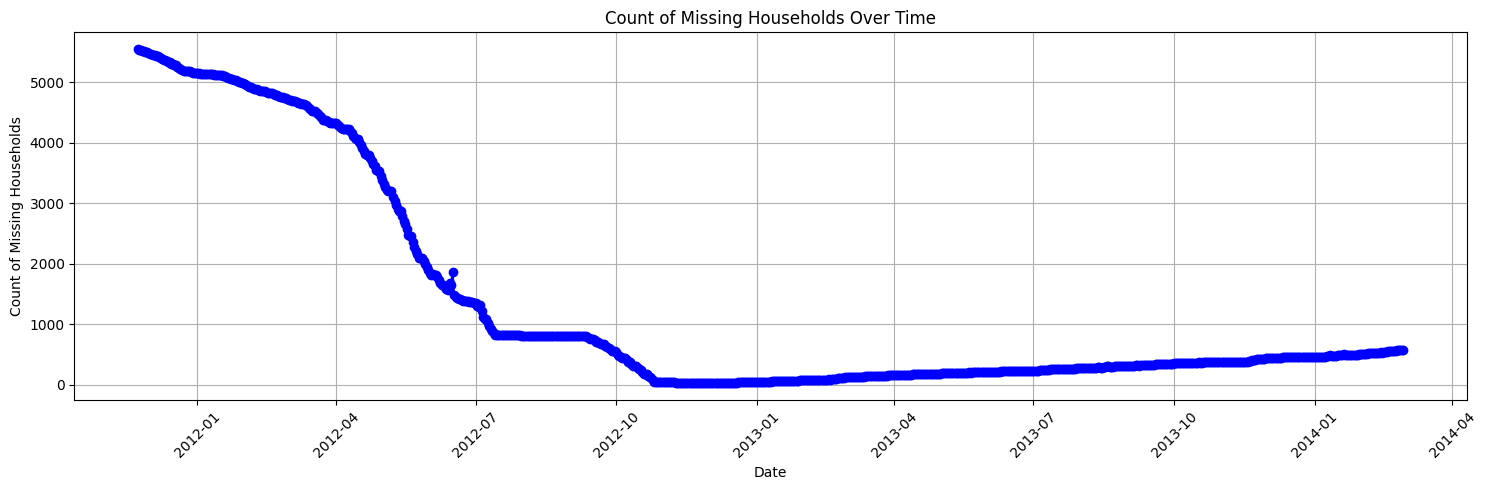

In [ ]:
# Convert the 'Date' column to datetime format
missing_households['Date'] = pd.to_datetime(missing_households['Date'])

# Plot the count of missing households over time
plt.figure(figsize=(15, 5))
plt.plot(missing_households['Date'], missing_households['Missing_Households'].apply(len), marker='o', color='blue')
plt.title('Count of Missing Households Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Missing Households')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.show()

In [ ]:
# Set the start date
start_date = '2012-11-01'

# Filter the DataFrame to include only records on or after the start date
data = energy[energy['day'] >= start_date]

# Display the filtered DataFrame
data


LCLid         day  energy_median  energy_mean  energy_max  \
322      MAC000131  2012-11-01         0.1425     0.327604       0.878   
323      MAC000131  2012-11-02         0.1050     0.211083       0.735   
324      MAC000131  2012-11-03         0.1190     0.246250       0.816   
325      MAC000131  2012-11-04         0.1360     0.265104       0.785   
326      MAC000131  2012-11-05         0.1190     0.266958       0.819   
...            ...         ...            ...          ...         ...   
3510428  MAC004977  2014-02-24         0.0950     0.118458       0.580   
3510429  MAC004977  2014-02-25         0.0675     0.084208       0.176   
3510430  MAC004977  2014-02-26         0.1080     0.120500       0.282   
3510431  MAC004977  2014-02-27         0.0720     0.114062       0.431   
3510432  MAC004977  2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min  
322                48    0.303041      15.725       0.058  
323                48    0.225041      10.132       0.058  
324                48    0.250574      11.820       0.060  
325                48    0.249165      12.725       0.061  
326                48    0.271912      12.814       0.055  
...               ...         ...         ...         ...  
3510428            48    0.093814       5.686       0.052  
3510429            48    0.037107       4.042       0.046  
3510430            48    0.069332       5.784       0.046  
3510431            48    0.094482       5.475       0.047  
3510432             1    0.014352       0.097       0.097  

[2575388 rows x 9 columns]

In [ ]:
# Get the list of all unique households
all_households = data['LCLid'].unique()

# Group the data by date and count the number of unique households for each date
households_by_date = data.groupby('day')['LCLid'].unique()

# Initialize an empty list to store missing households for each date
missing_households_list = []

# Iterate through each date and identify missing households
for date, households in households_by_date.items():
    missing = list(set(all_households) - set(households))
    missing_households_list.append({'Date': date, 'Missing_Households': missing})

# Create a DataFrame from the list of missing households
missing_households = pd.DataFrame(missing_households_list)

# Display the DataFrame
print(missing_households)

           Date                                 Missing_Households
0    2012-11-01  [MAC005037, MAC004069, MAC005567, MAC003927, M...
1    2012-11-02  [MAC005037, MAC004069, MAC005567, MAC003927, M...
2    2012-11-03  [MAC005037, MAC004069, MAC005567, MAC003927, M...
3    2012-11-04  [MAC005037, MAC004069, MAC005567, MAC003927, M...
4    2012-11-05  [MAC005037, MAC004069, MAC005567, MAC003927, M...
..          ...                                                ...
480  2014-02-24  [MAC000636, MAC002804, MAC000813, MAC000606, M...
481  2014-02-25  [MAC000636, MAC002804, MAC000813, MAC000606, M...
482  2014-02-26  [MAC000636, MAC002804, MAC000813, MAC000606, M...
483  2014-02-27  [MAC000636, MAC002804, MAC000813, MAC000606, M...
484  2014-02-28  [MAC000636, MAC002804, MAC000813, MAC000606, M...

[485 rows x 2 columns]


In [ ]:
# Create a list of all missing households
all_missing_households = []
for missing in missing_households['Missing_Households']:
    all_missing_households.extend(missing)

# Filter the DataFrame to exclude the missing households
filtered_data = data[~data['LCLid'].isin(all_missing_households)]

# Now you can use filtered_data for further analysis or visualization

In [ ]:
filtered_data

LCLid         day  energy_median  energy_mean  energy_max  \
322      MAC000131  2012-11-01         0.1425     0.327604       0.878   
323      MAC000131  2012-11-02         0.1050     0.211083       0.735   
324      MAC000131  2012-11-03         0.1190     0.246250       0.816   
325      MAC000131  2012-11-04         0.1360     0.265104       0.785   
326      MAC000131  2012-11-05         0.1190     0.266958       0.819   
...            ...         ...            ...          ...         ...   
3510428  MAC004977  2014-02-24         0.0950     0.118458       0.580   
3510429  MAC004977  2014-02-25         0.0675     0.084208       0.176   
3510430  MAC004977  2014-02-26         0.1080     0.120500       0.282   
3510431  MAC004977  2014-02-27         0.0720     0.114062       0.431   
3510432  MAC004977  2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min  
322                48    0.303041      15.725       0.058  
323                48    0.225041      10.132       0.058  
324                48    0.250574      11.820       0.060  
325                48    0.249165      12.725       0.061  
326                48    0.271912      12.814       0.055  
...               ...         ...         ...         ...  
3510428            48    0.093814       5.686       0.052  
3510429            48    0.037107       4.042       0.046  
3510430            48    0.069332       5.784       0.046  
3510431            48    0.094482       5.475       0.047  
3510432             1    0.014352       0.097       0.097  

[2342065 rows x 9 columns]

**Normalization across households**
> The data collection across households are inconsistent- therefore we will be using *energy per household* as the target to predict rather than energy alone. This is an optional step as we can also predict for energy sum as whole for each household. However there are quite a lot of unique households for which we have to repeat the exercise and our ultimate goal is to predict overall consumption forecast and not at household level.  
This also means that since household level is removed, we are not looking into the ACORN details which is available at household level

In [ ]:
energy = filtered_data

In [ ]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()

In [ ]:
energy

day    energy_sum  LCLid
0    2012-11-01  51525.248996   5520
1    2012-11-02  52578.819000   5521
2    2012-11-03  54305.661992   5521
3    2012-11-04  60184.296999   5521
4    2012-11-05  54182.923007   5520
..          ...           ...    ...
480  2014-02-24  50509.171004   4994
481  2014-02-25  49968.288002   4995
482  2014-02-26  49567.729995   4993
483  2014-02-27  50210.382998   4990
484  2014-02-28   1017.686000   4987

[485 rows x 3 columns]

In [ ]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

## Weather Information
Daily level weather information is taken using darksky api in the dataset[](http://)

In [ ]:
weather = read_csv_with_auto_encoding(os.path.join(drive_folder_path, 'weather_daily_darksky.csv'))
weather.head(10)

temperatureMax   temperatureMaxTime  windBearing                 icon  \
0           11.96  2011-11-11 23:00:00          123                  fog   
1            8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2           10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3            8.07  2011-12-02 23:00:00          232                 wind   
4            8.22  2011-12-24 23:00:00          252  partly-cloudy-night   
5            7.97  2011-12-15 14:00:00          234                 wind   
6           13.19  2011-11-19 14:00:00          117                  fog   
7            8.32  2011-11-16 23:00:00          117                  fog   
8            9.82  2011-12-12 23:00:00          221                 wind   
9            9.71  2011-11-20 14:00:00          115                  fog   

   dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0      9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1      4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2      5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3      3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4      2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   
5      2.41  2011-12-15 00:00:00        0.42       4.71    996.75   
6      8.12  2011-11-19 23:00:00        0.26       2.37   1016.80   
7      5.58  2011-11-16 07:00:00        0.81       2.36   1017.40   
8      4.10  2011-12-12 07:00:00        0.38       5.02   1002.47   
9      6.62  2011-11-20 08:00:00        0.41       1.24   1018.82   

  apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
0        2011-11-11 07:00:00  ...            10.87  2011-11-11 07:12:14   
1        2011-12-11 02:00:00  ...             8.59  2011-12-11 07:57:02   
2        2011-12-27 22:00:00  ...            10.33  2011-12-27 08:07:06   
3        2011-12-02 07:00:00  ...             7.36  2011-12-02 07:46:09   
4        2011-12-24 07:00:00  ...             7.93  2011-12-24 08:06:15   
5        2011-12-15 00:00:00  ...             7.97  2011-12-15 08:00:46   
6        2011-11-19 08:00:00  ...            13.19  2011-11-19 07:26:03   
7        2011-11-16 04:00:00  ...             8.18  2011-11-16 07:20:57   
8        2011-12-12 08:00:00  ...             8.53  2011-12-12 07:58:02   
9        2011-11-20 08:00:00  ...             9.71  2011-11-20 07:27:43   

   temperatureHighTime          uvIndexTime  \
0  2011-11-11 19:00:00  2011-11-11 11:00:00   
1  2011-12-11 14:00:00  2011-12-11 12:00:00   
2  2011-12-27 14:00:00  2011-12-27 00:00:00   
3  2011-12-02 12:00:00  2011-12-02 10:00:00   
4  2011-12-24 15:00:00  2011-12-24 13:00:00   
5  2011-12-15 14:00:00  2011-12-15 11:00:00   
6  2011-11-19 14:00:00  2011-11-19 10:00:00   
7  2011-11-16 14:00:00  2011-11-16 11:00:00   
8  2011-12-12 19:00:00  2011-12-12 11:00:00   
9  2011-11-20 14:00:00  2011-11-20 10:00:00   

                                             summary   temperatureLowTime  \
0                             Foggy until afternoon.  2011-11-11 19:00:00   
1                  Partly cloudy throughout the day.  2011-12-12 07:00:00   
2                  Mostly cloudy throughout the day.  2011-12-27 23:00:00   
3  Partly cloudy throughout the day and breezy ov...  2011-12-02 19:00:00   
4                  Mostly cloudy throughout the day.  2011-12-24 19:00:00   
5  Partly cloudy throughout the day and breezy in...  2011-12-16 08:00:00   
6                     Foggy starting in the evening.  2011-11-20 08:00:00   
7                     Foggy starting in the evening.  2011-11-16 19:00:00   
8  Partly cloudy throughout the day and breezy st...  2011-12-13 08:00:00   
9                              Foggy in the morning.  2011-11-21 02:00:00   

   apparentTemperatureMin  apparentTemperatureMaxTime  \
0                    6.48         2011-11-11 23:00:00   
1                    0.11         2011-12-11 20:00:00   
2                    5.59         2011-12-2

In [ ]:
#weather.describe()

In [ ]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

### Relationship of weather conditions with electricity consumption

In [ ]:
weather_energy =  energy.merge(weather,on='day')
weather_energy.head(2)

day    energy_sum  LCLid  temperatureMax  windBearing  dewPoint  \
0  2012-11-01  51525.248996   5520           11.46          225      5.06   
1  2012-11-02  52578.819000   5521            9.78          229      2.96   

   cloudCover  windSpeed  pressure  apparentTemperatureHigh  visibility  \
0        0.44       4.07    979.63                     6.60       12.54   
1        0.23       4.31    991.25                     6.88       12.96   

   humidity  apparentTemperatureLow  apparentTemperatureMax  uvIndex  \
0      0.85                    0.85                   11.46      1.0   
1      0.77                    1.56                    6.88      1.0   

   temperatureLow  temperatureMin  temperatureHigh  apparentTemperatureMin  \
0            4.20            4.20             9.42                    0.85   
1            3.22            4.61             9.78                    1.81   

   moonPhase  
0       0.58  
1       0.61

 *** 1. Temperature ***
> We can see that energy and temperature have an inverse relationship-we can see the peaks in one appearing with troughs in the other. This confirms the business intuition that during low temperature, it is likely that the energy consumption through heaters etc. increases.

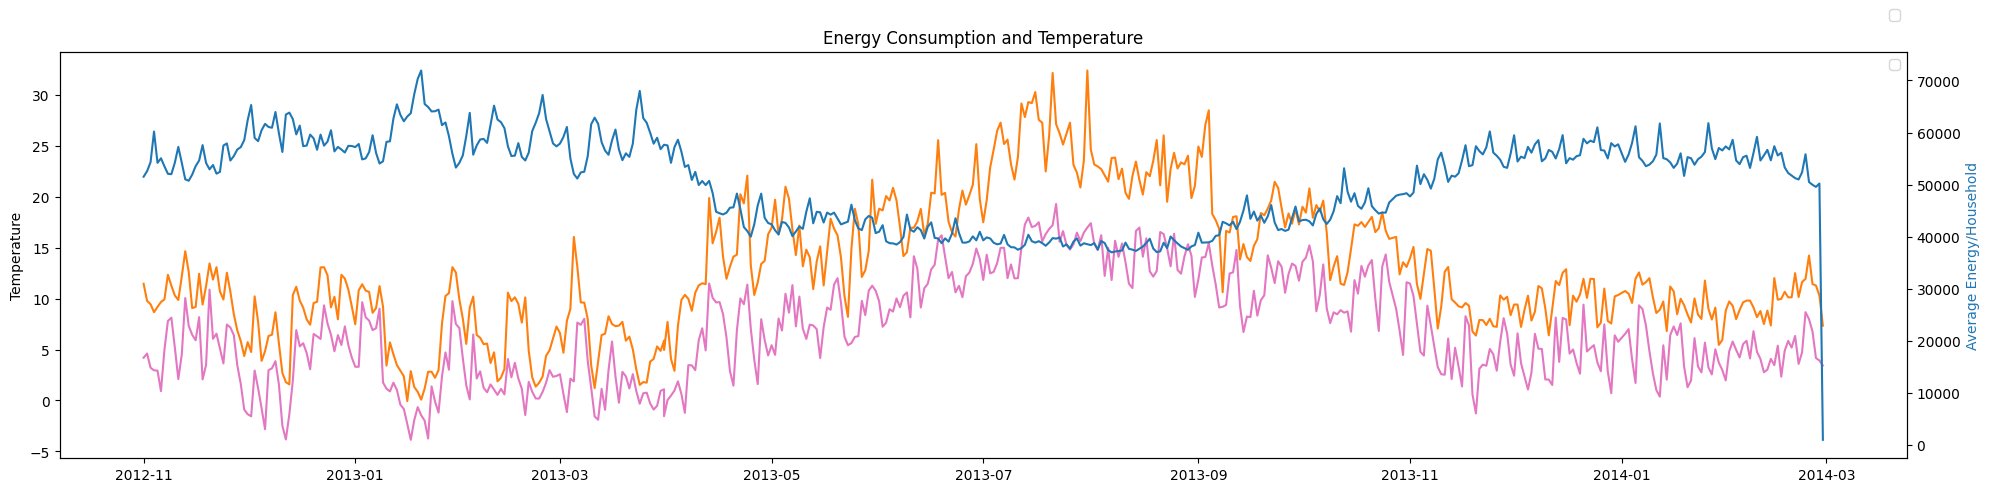

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color = 'tab:orange')
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color = 'tab:pink')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
#plt.show()


***2.  Humidity ***

>  Humidity and the average consumption of energy seems to have the same trend.


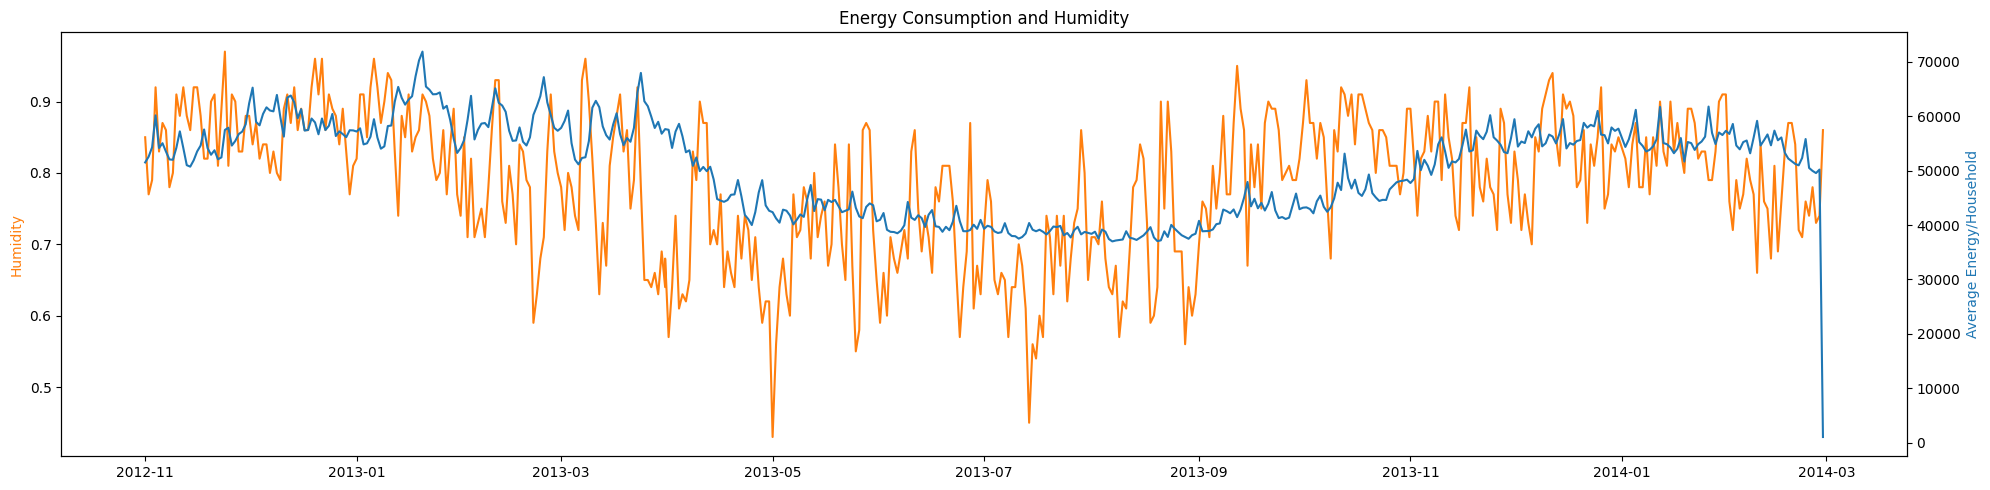

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.humidity, color = 'tab:orange')
ax1.set_ylabel('Humidity',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Humidity')
fig.tight_layout()
#plt.show()

***3. Cloud Cover***
> The cloud cover value seems to be following the same pattern as the energy consumption.

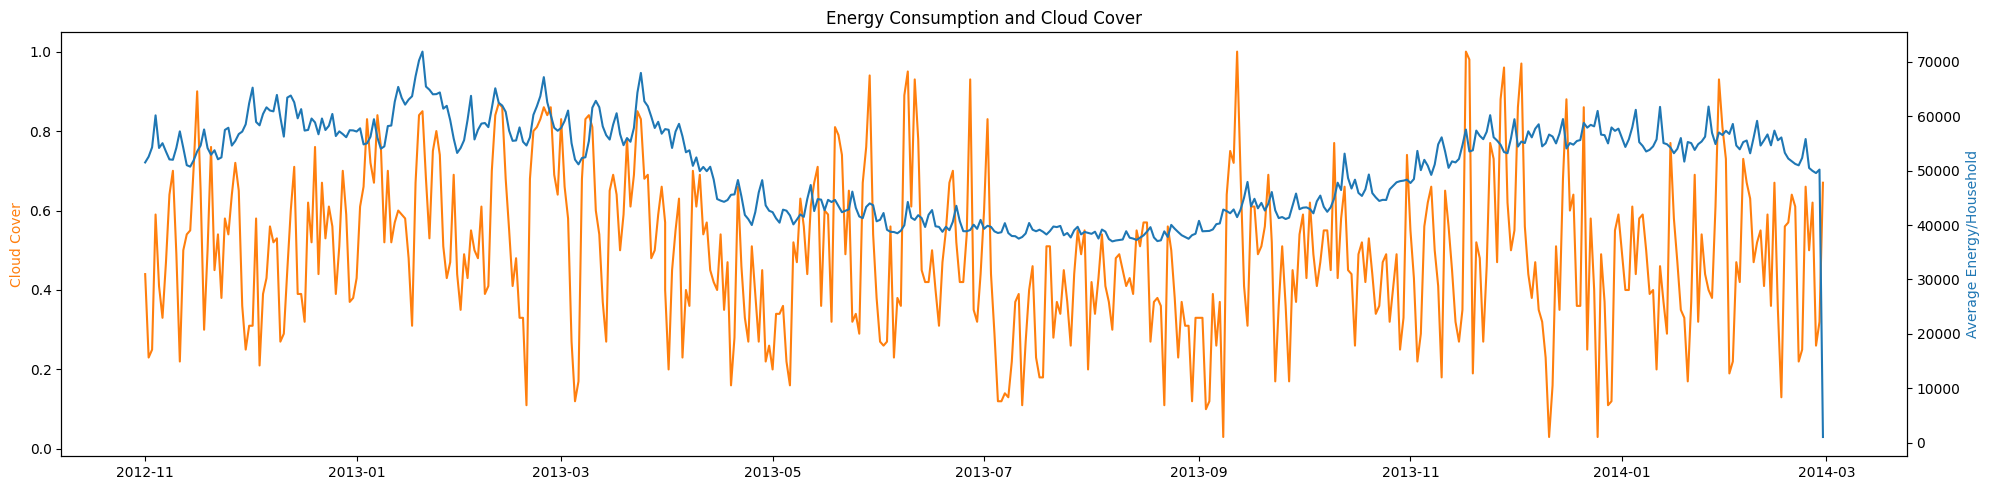

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.cloudCover, color = 'tab:orange')
ax1.set_ylabel('Cloud Cover',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Cloud Cover')
fig.tight_layout()
#plt.show()

***4. Visibility***
> The visibility factor does not seem to affect energy consumption at all- since visibility is most likely an outdoors factor, it is unlikely that it's increase or decrease affects energy consumption within a household.

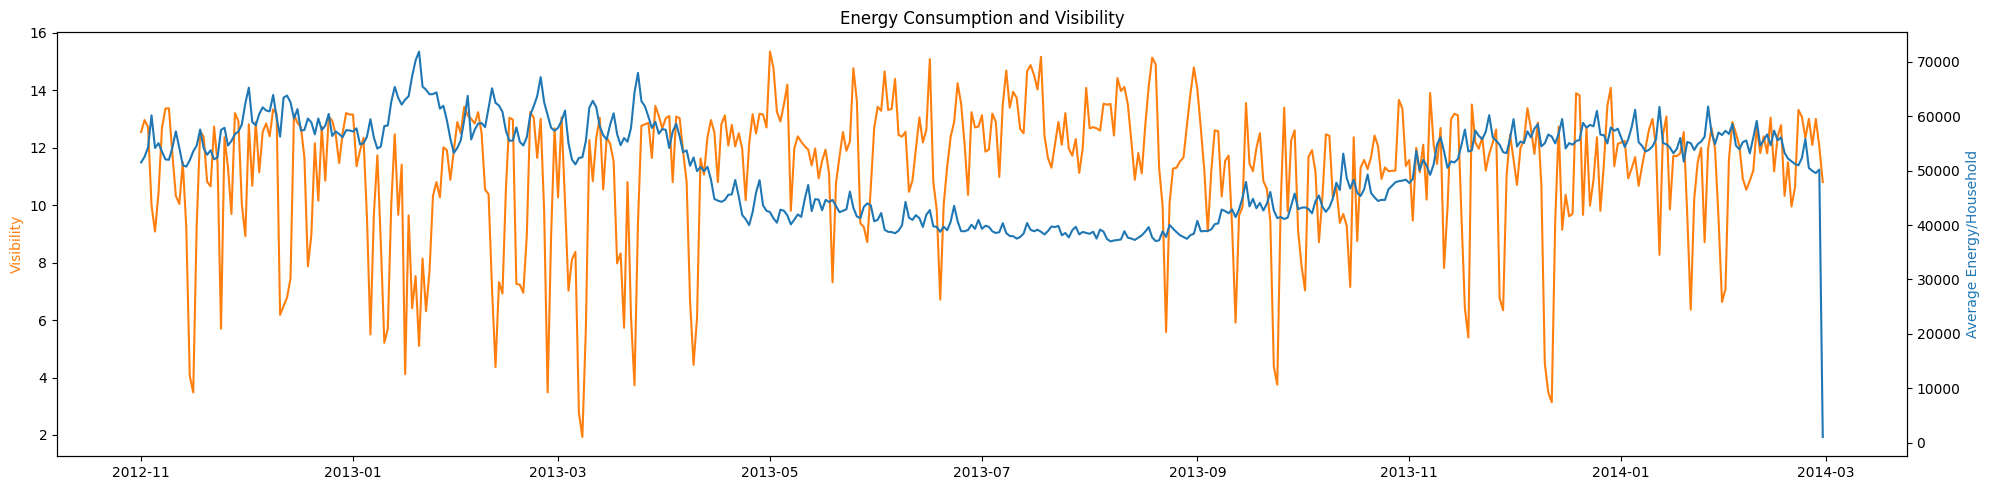

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.visibility, color = 'tab:orange')
ax1.set_ylabel('Visibility',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Visibility')
fig.tight_layout()
#plt.show()

***5.  Wind Speed***
>  Like visibility, wind speed seems to be an outdoors factor which does not affect in the energy consumption as such.

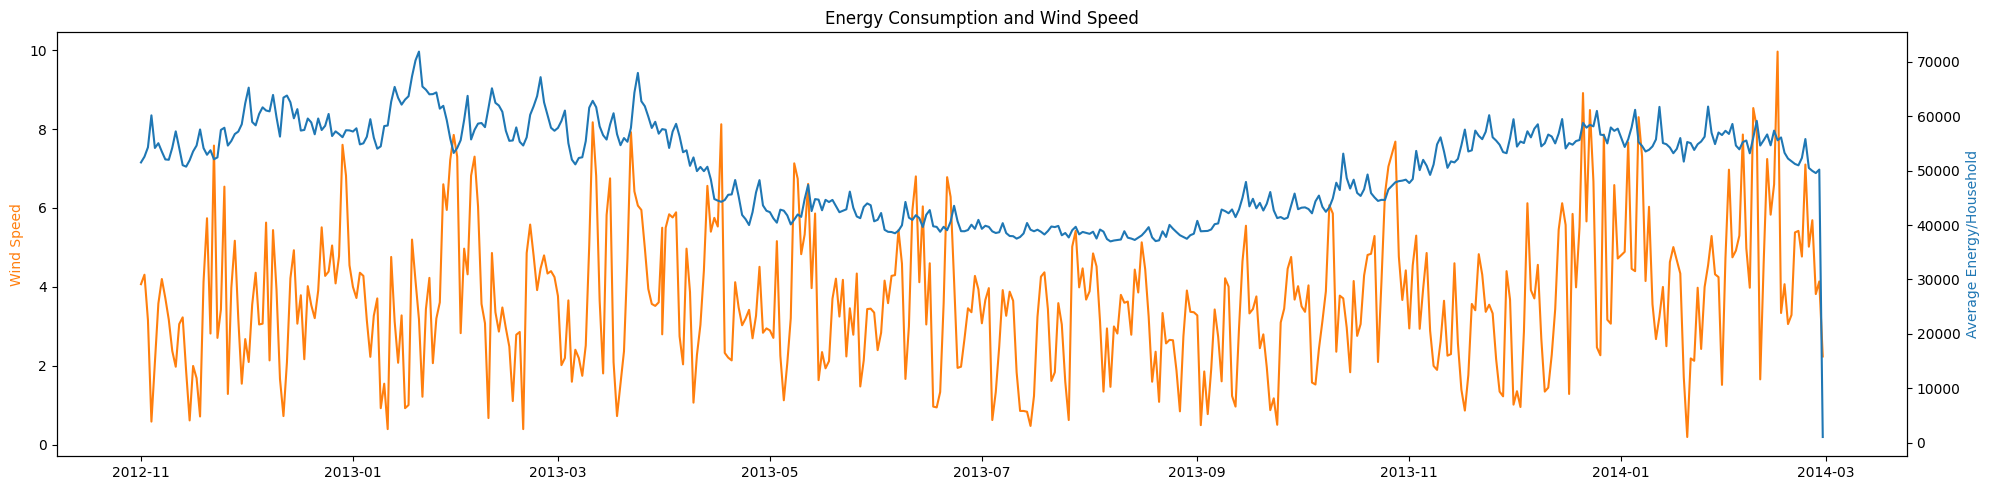

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.windSpeed, color = 'tab:orange')
ax1.set_ylabel('Wind Speed',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Wind Speed')
fig.tight_layout()
#plt.show()

***6.  UV Index***
> The UV index has an inverse relationship with energy consumption- why?

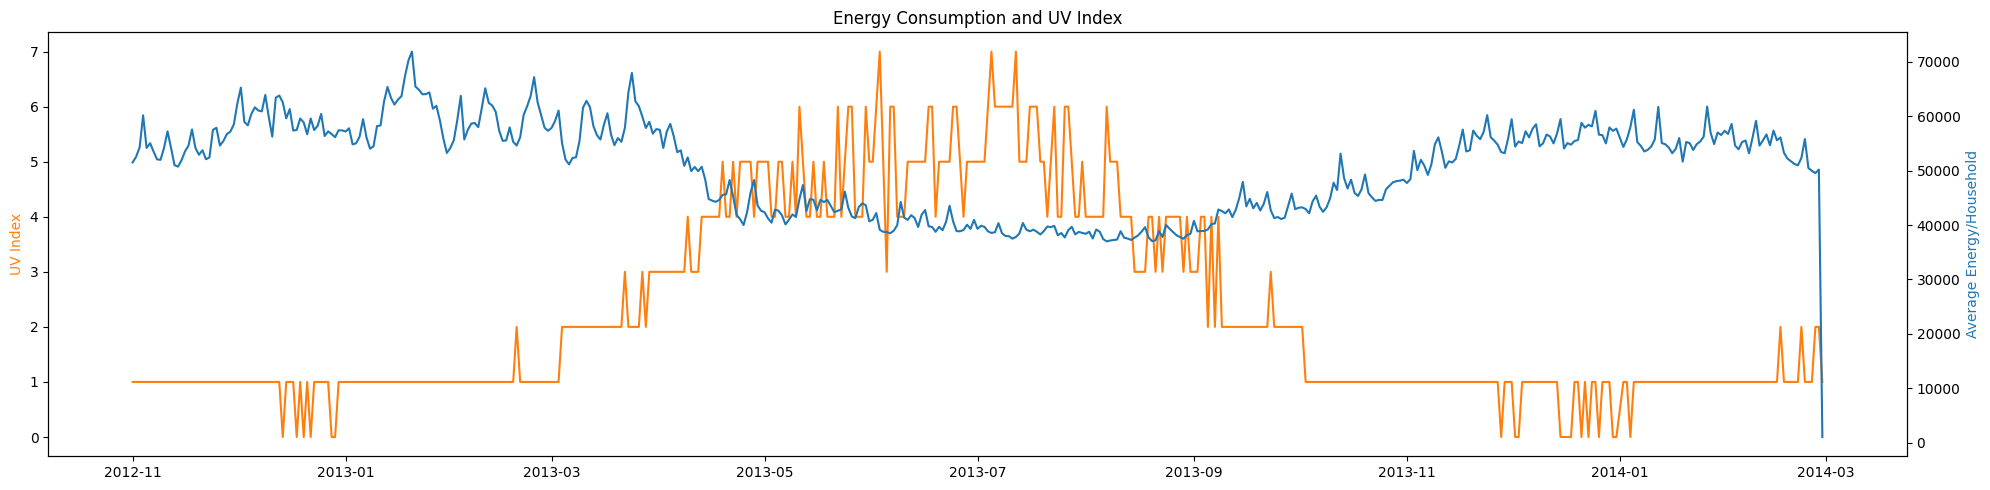

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.uvIndex, color = 'tab:orange')
ax1.set_ylabel('UV Index',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and UV Index')
fig.tight_layout()
#plt.show()

***7. dewPoint***
> Dew Point- is a function of humidity and temperature display similar relation to energy consumption.

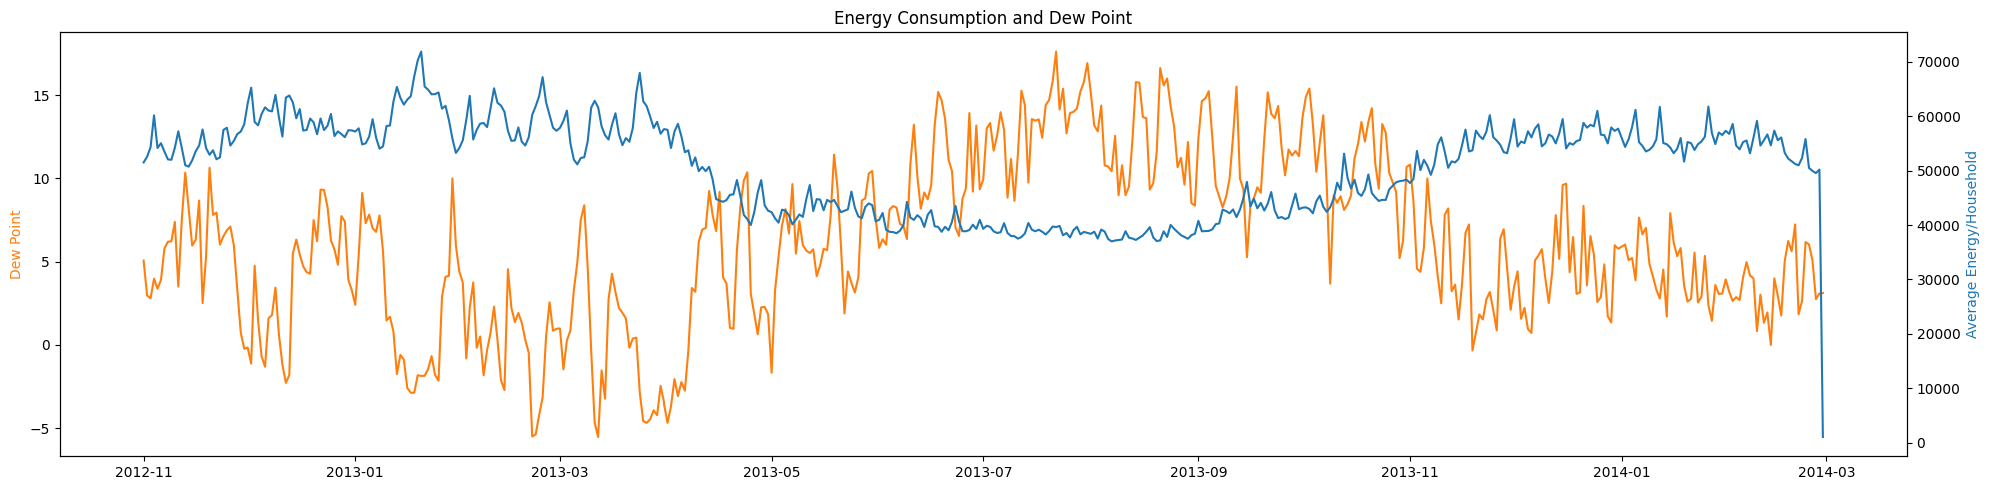

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.dewPoint, color = 'tab:orange')
ax1.set_ylabel('Dew Point',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Dew Point')
fig.tight_layout()
#plt.show()

### Correlation between Weather Variables and Energy Consumption
* Energy has high positive correlation with humidity and high negative correlation with temperature.
* Multicollinearity between Dew Point, UV Index display with Temperature.
* Cloud Cover and Visibility display multicollinearity with Humidity
* Pressure and Moon Phase have minimal correlation with Energy.
* Wind Speed has low correlation with energy.


In [ ]:
cor_matrix = weather_energy[['energy_sum','temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase', 'windBearing', 'temperatureMin']].corr()
cor_matrix

energy_sum  temperatureMax  dewPoint  cloudCover  windSpeed  \
energy_sum        1.000000       -0.854911 -0.742353    0.263439   0.191076   
temperatureMax   -0.854911        1.000000  0.874605   -0.341904  -0.158536   
dewPoint         -0.742353        0.874605  1.000000   -0.089939  -0.128207   
cloudCover        0.263439       -0.341904 -0.089939    1.000000   0.146779   
windSpeed         0.191076       -0.158536 -0.128207    0.146779   1.000000   
pressure         -0.238966        0.242340  0.108890   -0.087263  -0.364275   
visibility       -0.276909        0.306428  0.051763   -0.362408   0.236311   
humidity          0.408960       -0.406668  0.038168    0.393731  -0.088873   
uvIndex          -0.723815        0.687606  0.412227   -0.275526  -0.153928   
moonPhase        -0.073696        0.064068  0.038050   -0.113131  -0.032251   
windBearing      -0.068342        0.074979  0.138019   -0.056022   0.027923   
temperatureMin   -0.808847        0.908980  0.933483   -0.110226  -0.047336   

                pressure  visibility  humidity   uvIndex  moonPhase  \
energy_sum     -0.238966   -0.276909  0.408960 -0.723815  -0.073696   
temperatureMax  0.242340    0.306428 -0.406668  0.687606   0.064068   
dewPoint        0.108890    0.051763  0.038168  0.412227   0.038050   
cloudCover     -0.087263   -0.362408  0.393731 -0.275526  -0.113131   
windSpeed      -0.364275    0.236311 -0.088873 -0.153928  -0.032251   
pressure        1.000000    0.100085 -0.276373  0.283336   0.096480   
visibility      0.100085    1.000000 -0.639685  0.307217   0.060572   
humidity       -0.276373   -0.639685  1.000000 -0.653456  -0.047974   
uvIndex         0.283336    0.307217 -0.653456  1.000000   0.003827   
moonPhase       0.096480    0.060572 -0.047974  0.003827   1.000000   
windBearing     0.007686    0.207421  0.064445 -0.108287   0.034361   
temperatureMin  0.151513    0.213942 -0.242848  0.559817   0.040759   

                windBearing  temperatureMin  
energy_sum        -0.068342       -0.808847  
temperatureMax     0.074979        0.908980  
dewPoint           0.138019        0.933483  
cloudCover        -0.056022       -0.110226  
windSpeed          0.027923       -0.047336  
pressure           0.007686        0.151513  
visibility         0.207421        0.213942  
humidity           0.064445       -0.242848  
uvIndex           -0.108287        0.559817  
moonPhase          0.034361        0.040759  
windBearing        1.000000        0.100527  
temperatureMin     0.100527        1.000000

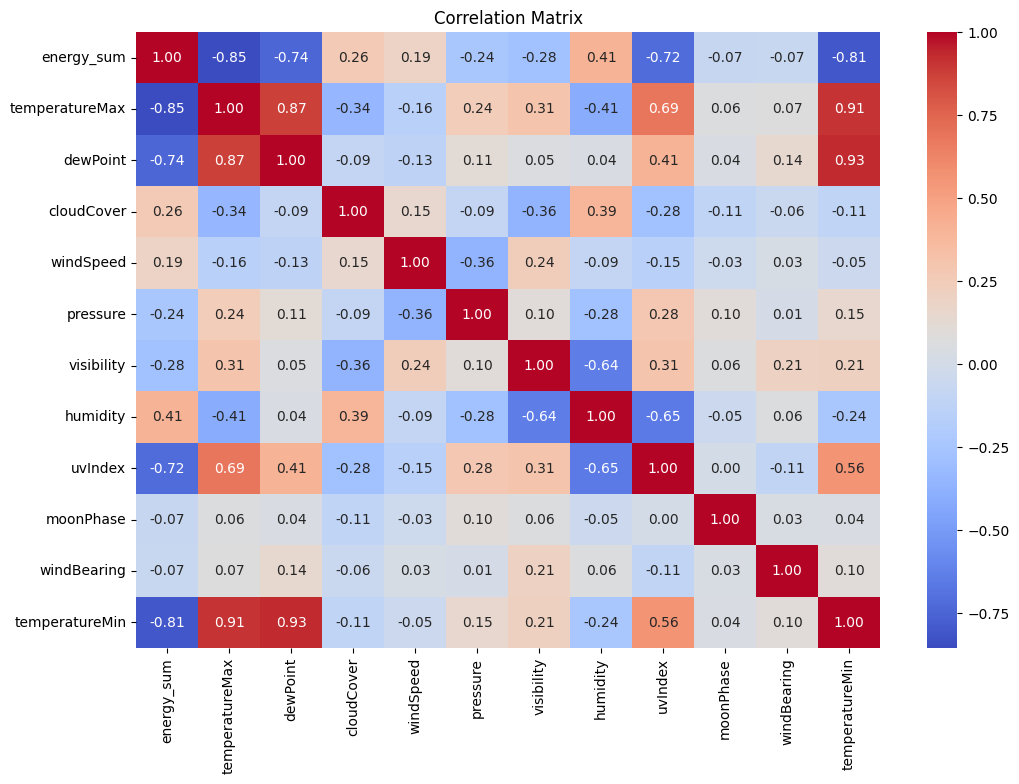

In [ ]:
import seaborn as sns
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Define the list of variables to keep
variables_to_keep = ['day', 'energy_sum', 'temperatureMax', 'dewPoint', 'cloudCover', 'visibility', 'humidity', 'uvIndex', 'temperatureMin']

# Keep only the specified variables in the DataFrame
weather_energy = weather_energy.filter(variables_to_keep)

In [ ]:
weather_energy

day    energy_sum  temperatureMax  dewPoint  cloudCover  \
0    2012-11-01  51525.248996           11.46      5.06        0.44   
1    2012-11-02  52578.819000            9.78      2.96        0.23   
2    2012-11-03  54305.661992            9.45      2.79        0.25   
3    2012-11-04  60184.296999            8.67      3.97        0.59   
4    2012-11-05  54182.923007            9.19      3.37        0.41   
..          ...           ...             ...       ...         ...   
479  2014-02-24  50509.171004           14.23      6.03        0.50   
480  2014-02-25  49968.288002           11.43      5.06        0.62   
481  2014-02-26  49567.729995           11.29      2.74        0.26   
482  2014-02-27  50210.382998           10.31      3.08        0.32   
483  2014-02-28   1017.686000            7.35      3.11        0.67   

     visibility  humidity  uvIndex  temperatureMin  
0         12.54      0.85      1.0            4.20  
1         12.96      0.77      1.0            4.61  
2         12.71      0.79      1.0            3.22  
3          9.99      0.92      1.0            2.96  
4          9.08      0.83      1.0            2.94  
..          ...       ...      ...             ...  
479       13.00      0.74      1.0            7.99  
480       12.09      0.78      1.0            6.79  
481       13.00      0.73      2.0            4.17  
482       12.04      0.74      2.0            3.93  
483       10.80      0.86      1.0            3.43  

[484 rows x 9 columns]

### Creating Weather Clusters


In [ ]:
#scaling
#scaler = MinMaxScaler()
#eather_scaled = scaler.fit_transform(weather_energy[['temperatureMax','humidity','temperatureMin', 'dewPoint', 'uvIndex', 'visibility', 'cloudCover']])

In [ ]:
households = read_csv_with_auto_encoding(os.path.join(drive_folder_path, 'informations_households.csv'))

In [ ]:
households

LCLid stdorToU    Acorn Acorn_grouped       file
0     MAC005492      ToU   ACORN-        ACORN-    block_0
1     MAC001074      ToU   ACORN-        ACORN-    block_0
2     MAC000002      Std  ACORN-A      Affluent    block_0
3     MAC003613      Std  ACORN-A      Affluent    block_0
4     MAC003597      Std  ACORN-A      Affluent    block_0
...         ...      ...      ...           ...        ...
5561  MAC002056      Std  ACORN-U       ACORN-U  block_111
5562  MAC004587      Std  ACORN-U       ACORN-U  block_111
5563  MAC004828      Std  ACORN-U       ACORN-U  block_111
5564  MAC001704      ToU  ACORN-U       ACORN-U  block_111
5565  MAC002774      ToU  ACORN-U       ACORN-U  block_111

[5566 rows x 5 columns]

In [ ]:
# Merge the datasets on the 'LCLid' column
merged_df = pd.merge(filtered_data, households, on='LCLid', how='left')

In [ ]:
merged_df

LCLid         day  energy_median  energy_mean  energy_max  \
0        MAC000131  2012-11-01         0.1425     0.327604       0.878   
1        MAC000131  2012-11-02         0.1050     0.211083       0.735   
2        MAC000131  2012-11-03         0.1190     0.246250       0.816   
3        MAC000131  2012-11-04         0.1360     0.265104       0.785   
4        MAC000131  2012-11-05         0.1190     0.266958       0.819   
...            ...         ...            ...          ...         ...   
2342060  MAC004977  2014-02-24         0.0950     0.118458       0.580   
2342061  MAC004977  2014-02-25         0.0675     0.084208       0.176   
2342062  MAC004977  2014-02-26         0.1080     0.120500       0.282   
2342063  MAC004977  2014-02-27         0.0720     0.114062       0.431   
2342064  MAC004977  2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min stdorToU    Acorn  \
0                  48    0.303041      15.725       0.058      Std  ACORN-E   
1                  48    0.225041      10.132       0.058      Std  ACORN-E   
2                  48    0.250574      11.820       0.060      Std  ACORN-E   
3                  48    0.249165      12.725       0.061      Std  ACORN-E   
4                  48    0.271912      12.814       0.055      Std  ACORN-E   
...               ...         ...         ...         ...      ...      ...   
2342060            48    0.093814       5.686       0.052      ToU  ACORN-E   
2342061            48    0.037107       4.042       0.046      ToU  ACORN-E   
2342062            48    0.069332       5.784       0.046      ToU  ACORN-E   
2342063            48    0.094482       5.475       0.047      ToU  ACORN-E   
2342064             1    0.014352       0.097       0.097      ToU  ACORN-E   

        Acorn_grouped      file  
0            Affluent  block_22  
1            Affluent  block_22  
2            Affluent  block_22  
3            Affluent  block_22  
4            Affluent  block_22  
...               ...       ...  
2342060      Affluent  block_33  
2342061      Affluent  block_33  
2342062      Affluent  block_33  
2342063      Affluent  block_33  
2342064      Affluent  block_33  

[2342065 rows x 13 columns]

In [ ]:
holiday = read_csv_with_auto_encoding(os.path.join('/content/drive/My Drive/archive-12/uk_bank_holidays.csv'))

In [ ]:
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays'], errors='coerce')

In [ ]:
holiday

Bank holidays                                          Type
0     2012-12-26                                    Boxing Day
1     2012-12-25                                 Christmas Day
2     2012-08-27                           Summer bank holiday
3     2012-05-06  Queen?s Diamond Jubilee (extra bank holiday)
4     2012-04-06          Spring bank holiday (substitute day)
5     2012-07-05                        Early May bank holiday
6     2012-09-04                                 Easter Monday
7     2012-06-04                                   Good Friday
8     2012-02-01               New Year?s Day (substitute day)
9     2013-12-26                                    Boxing Day
10    2013-12-25                                 Christmas Day
11    2013-08-26                           Summer bank holiday
12    2013-05-27                           Spring bank holiday
13    2013-06-05                        Early May bank holiday
14    2013-01-04                                 Easter Monday
15    2013-03-29                                   Good Friday
16    2013-01-01                                New Year?s Day
17    2014-12-26                                    Boxing Day
18    2014-12-25                                 Christmas Day
19    2014-08-25                           Summer bank holiday
20    2014-05-26                           Spring bank holiday
21    2014-05-05                        Early May bank holiday
22    2014-04-21                                 Easter Monday
23    2014-04-18                                   Good Friday
24    2014-01-01                                New Year?s Day

In [ ]:
# Convert the 'day' column in your existing dataset to datetime64 data type
merged_df['day'] = pd.to_datetime(merged_df['day'])

# Merge the datasets on the 'day' column
merged_data = pd.merge(merged_df, holiday, left_on='day', right_on='Bank holidays', how='left')

# Display the merged data
merged_data

LCLid        day  energy_median  energy_mean  energy_max  \
0        MAC000131 2012-11-01         0.1425     0.327604       0.878   
1        MAC000131 2012-11-02         0.1050     0.211083       0.735   
2        MAC000131 2012-11-03         0.1190     0.246250       0.816   
3        MAC000131 2012-11-04         0.1360     0.265104       0.785   
4        MAC000131 2012-11-05         0.1190     0.266958       0.819   
...            ...        ...            ...          ...         ...   
2342060  MAC004977 2014-02-24         0.0950     0.118458       0.580   
2342061  MAC004977 2014-02-25         0.0675     0.084208       0.176   
2342062  MAC004977 2014-02-26         0.1080     0.120500       0.282   
2342063  MAC004977 2014-02-27         0.0720     0.114062       0.431   
2342064  MAC004977 2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min stdorToU    Acorn  \
0                  48    0.303041      15.725       0.058      Std  ACORN-E   
1                  48    0.225041      10.132       0.058      Std  ACORN-E   
2                  48    0.250574      11.820       0.060      Std  ACORN-E   
3                  48    0.249165      12.725       0.061      Std  ACORN-E   
4                  48    0.271912      12.814       0.055      Std  ACORN-E   
...               ...         ...         ...         ...      ...      ...   
2342060            48    0.093814       5.686       0.052      ToU  ACORN-E   
2342061            48    0.037107       4.042       0.046      ToU  ACORN-E   
2342062            48    0.069332       5.784       0.046      ToU  ACORN-E   
2342063            48    0.094482       5.475       0.047      ToU  ACORN-E   
2342064             1    0.014352       0.097       0.097      ToU  ACORN-E   

        Acorn_grouped      file Bank holidays Type  
0            Affluent  block_22           NaT  NaN  
1            Affluent  block_22           NaT  NaN  
2            Affluent  block_22           NaT  NaN  
3            Affluent  block_22           NaT  NaN  
4            Affluent  block_22           NaT  NaN  
...               ...       ...           ...  ...  
2342060      Affluent  block_33           NaT  NaN  
2342061      Affluent  block_33           NaT  NaN  
2342062      Affluent  block_33           NaT  NaN  
2342063      Affluent  block_33           NaT  NaN  
2342064      Affluent  block_33           NaT  NaN  

[2342065 rows x 15 columns]

In [ ]:
# Create a new column to store the binary indicator
merged_data['is_bank_holiday'] = (merged_data['day'] == merged_data['Bank holidays']).astype(int)

merged_data

LCLid        day  energy_median  energy_mean  energy_max  \
0        MAC000131 2012-11-01         0.1425     0.327604       0.878   
1        MAC000131 2012-11-02         0.1050     0.211083       0.735   
2        MAC000131 2012-11-03         0.1190     0.246250       0.816   
3        MAC000131 2012-11-04         0.1360     0.265104       0.785   
4        MAC000131 2012-11-05         0.1190     0.266958       0.819   
...            ...        ...            ...          ...         ...   
2342060  MAC004977 2014-02-24         0.0950     0.118458       0.580   
2342061  MAC004977 2014-02-25         0.0675     0.084208       0.176   
2342062  MAC004977 2014-02-26         0.1080     0.120500       0.282   
2342063  MAC004977 2014-02-27         0.0720     0.114062       0.431   
2342064  MAC004977 2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min stdorToU    Acorn  \
0                  48    0.303041      15.725       0.058      Std  ACORN-E   
1                  48    0.225041      10.132       0.058      Std  ACORN-E   
2                  48    0.250574      11.820       0.060      Std  ACORN-E   
3                  48    0.249165      12.725       0.061      Std  ACORN-E   
4                  48    0.271912      12.814       0.055      Std  ACORN-E   
...               ...         ...         ...         ...      ...      ...   
2342060            48    0.093814       5.686       0.052      ToU  ACORN-E   
2342061            48    0.037107       4.042       0.046      ToU  ACORN-E   
2342062            48    0.069332       5.784       0.046      ToU  ACORN-E   
2342063            48    0.094482       5.475       0.047      ToU  ACORN-E   
2342064             1    0.014352       0.097       0.097      ToU  ACORN-E   

        Acorn_grouped      file Bank holidays Type  is_bank_holiday  
0            Affluent  block_22           NaT  NaN                0  
1            Affluent  block_22           NaT  NaN                0  
2            Affluent  block_22           NaT  NaN                0  
3            Affluent  block_22           NaT  NaN                0  
4            Affluent  block_22           NaT  NaN                0  
...               ...       ...           ...  ...              ...  
2342060      Affluent  block_33           NaT  NaN                0  
2342061      Affluent  block_33           NaT  NaN                0  
2342062      Affluent  block_33           NaT  NaN                0  
2342063      Affluent  block_33           NaT  NaN                0  
2342064      Affluent  block_33           NaT  NaN                0  

[2342065 rows x 16 columns]

In [ ]:
delete = ['Bank holidays', 'Type']
merged_data = merged_data.drop(delete, axis=1)

In [ ]:
merged_data

LCLid        day  energy_median  energy_mean  energy_max  \
0        MAC000131 2012-11-01         0.1425     0.327604       0.878   
1        MAC000131 2012-11-02         0.1050     0.211083       0.735   
2        MAC000131 2012-11-03         0.1190     0.246250       0.816   
3        MAC000131 2012-11-04         0.1360     0.265104       0.785   
4        MAC000131 2012-11-05         0.1190     0.266958       0.819   
...            ...        ...            ...          ...         ...   
2342060  MAC004977 2014-02-24         0.0950     0.118458       0.580   
2342061  MAC004977 2014-02-25         0.0675     0.084208       0.176   
2342062  MAC004977 2014-02-26         0.1080     0.120500       0.282   
2342063  MAC004977 2014-02-27         0.0720     0.114062       0.431   
2342064  MAC004977 2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min stdorToU    Acorn  \
0                  48    0.303041      15.725       0.058      Std  ACORN-E   
1                  48    0.225041      10.132       0.058      Std  ACORN-E   
2                  48    0.250574      11.820       0.060      Std  ACORN-E   
3                  48    0.249165      12.725       0.061      Std  ACORN-E   
4                  48    0.271912      12.814       0.055      Std  ACORN-E   
...               ...         ...         ...         ...      ...      ...   
2342060            48    0.093814       5.686       0.052      ToU  ACORN-E   
2342061            48    0.037107       4.042       0.046      ToU  ACORN-E   
2342062            48    0.069332       5.784       0.046      ToU  ACORN-E   
2342063            48    0.094482       5.475       0.047      ToU  ACORN-E   
2342064             1    0.014352       0.097       0.097      ToU  ACORN-E   

        Acorn_grouped      file  is_bank_holiday  
0            Affluent  block_22                0  
1            Affluent  block_22                0  
2            Affluent  block_22                0  
3            Affluent  block_22                0  
4            Affluent  block_22                0  
...               ...       ...              ...  
2342060      Affluent  block_33                0  
2342061      Affluent  block_33                0  
2342062      Affluent  block_33                0  
2342063      Affluent  block_33                0  
2342064      Affluent  block_33                0  

[2342065 rows x 14 columns]

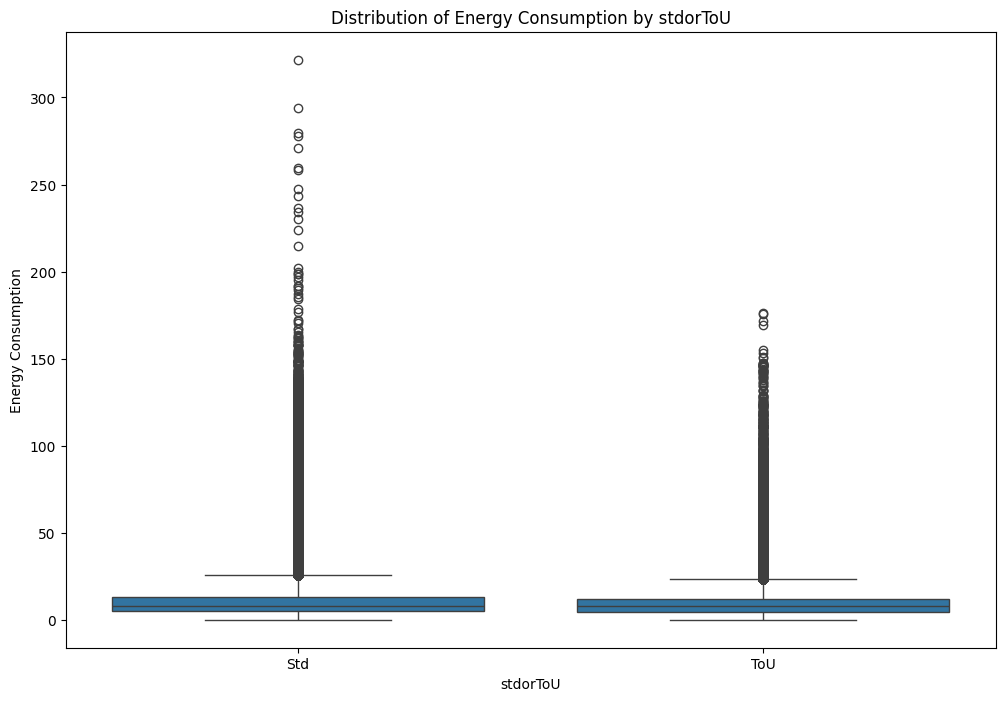

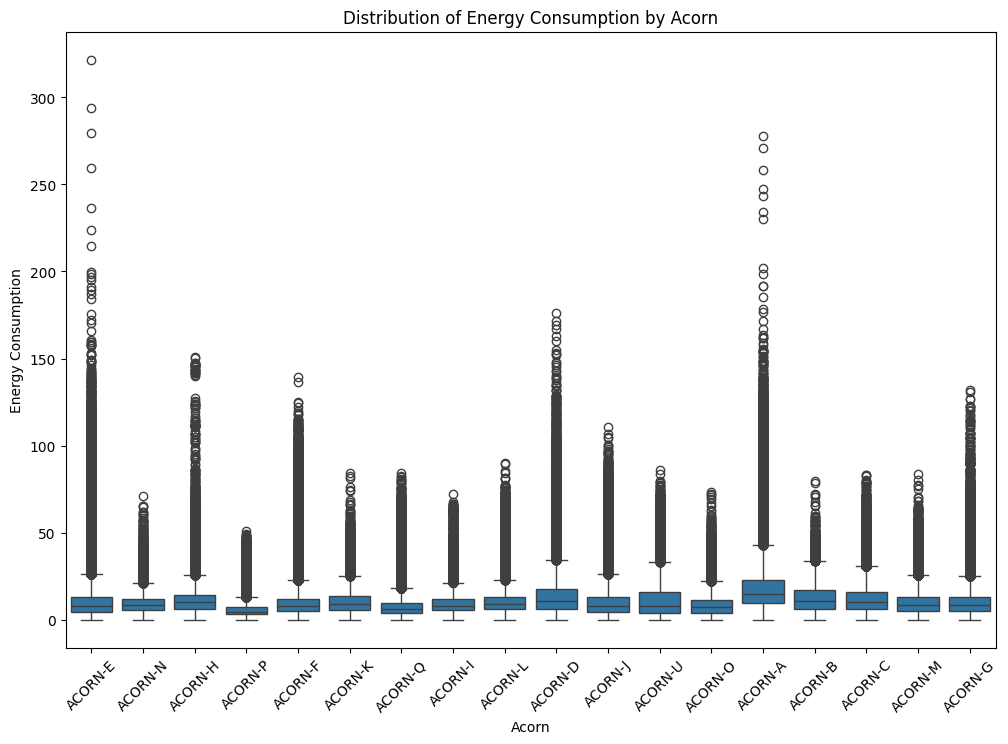

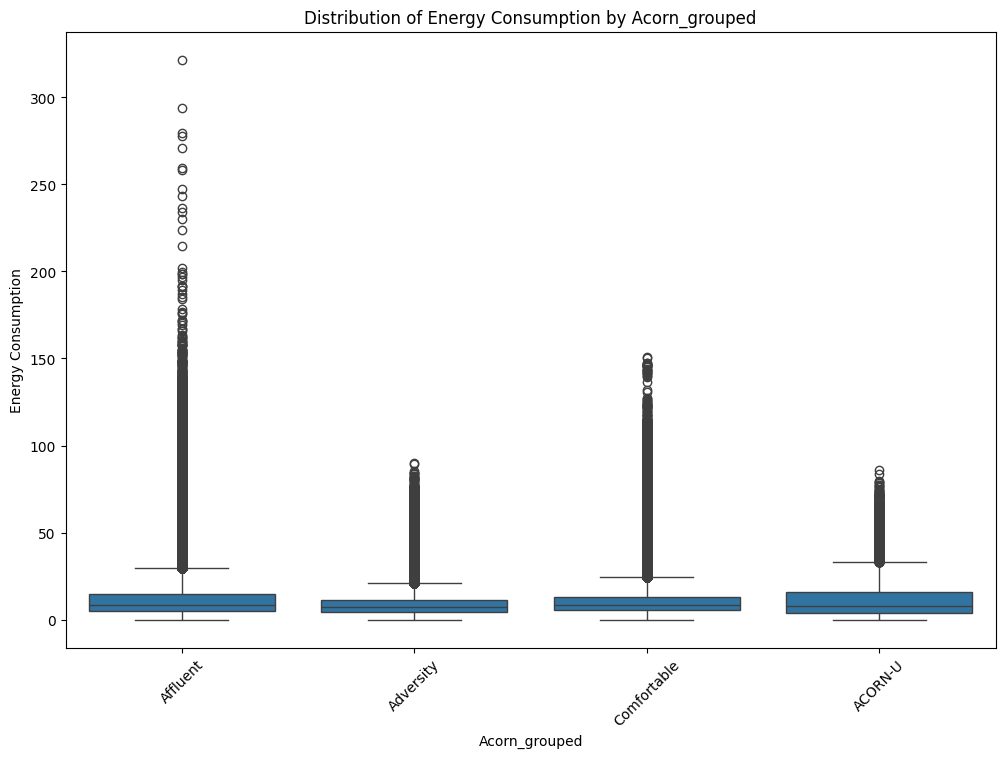

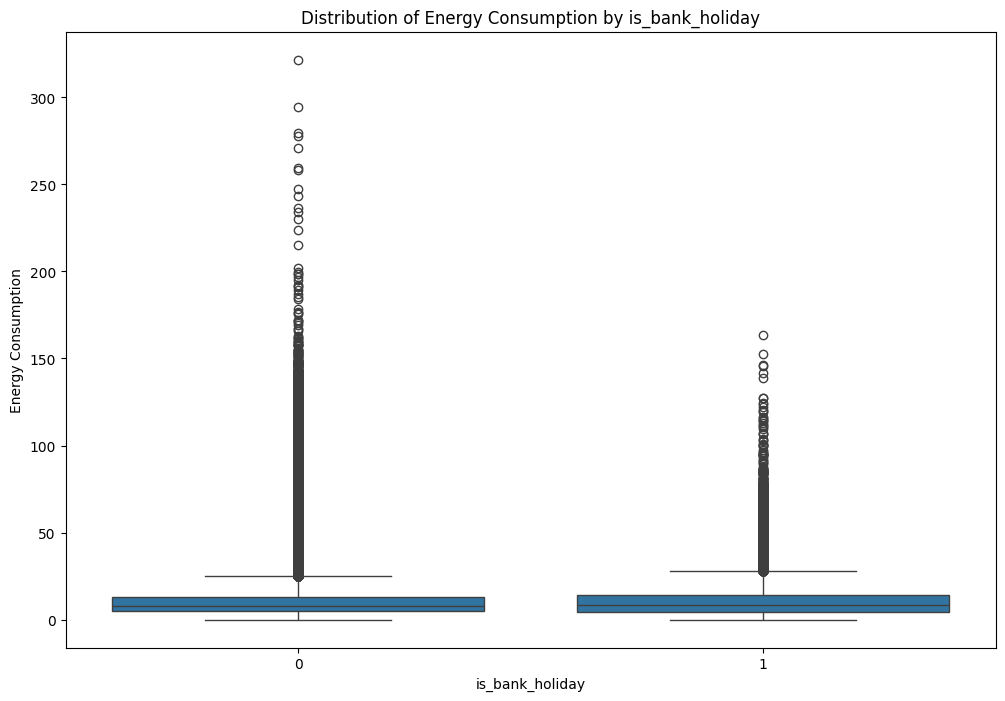

In [ ]:
# Boxplot comparing energy consumption across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='stdorToU', y='energy_sum', data=merged_data)
plt.title('Distribution of Energy Consumption by stdorToU')
plt.xlabel('stdorToU')
plt.ylabel('Energy Consumption')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Acorn', y='energy_sum', data=merged_data)
plt.title('Distribution of Energy Consumption by Acorn')
plt.xlabel('Acorn')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Acorn_grouped', y='energy_sum', data=merged_data)
plt.title('Distribution of Energy Consumption by Acorn_grouped')
plt.xlabel('Acorn_grouped')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='is_bank_holiday', y='energy_sum', data=merged_data)
plt.title('Distribution of Energy Consumption by is_bank_holiday')
plt.xlabel('is_bank_holiday')
plt.ylabel('Energy Consumption')
plt.show()

In [ ]:
import re

# Define the list of letters from A to Q
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']

# Iterate through each letter
for letter in letters:
    # Create a pattern to match 'Unknown' followed by the letter
    pattern = f'Unknown{letter}'

    # Replace the pattern with 'ACORN-' followed by the letter
    merged_data['Acorn'] = merged_data['Acorn'].replace(pattern, f'ACORN-{letter}', regex=True)

# Print unique values for verification
print(merged_data['Acorn'].unique())

['ACORN-E' 'ACORN-N' 'ACORN-H' 'ACORN-P' 'ACORN-F' 'ACORN-K' 'ACORN-Q'
 'ACORN-I' 'ACORN-L' 'ACORN-D' 'ACORN-J' 'ACORN-U' 'ACORN-O' 'ACORN-A'
 'ACORN-B' 'ACORN-C' 'ACORN-M' 'ACORN-G']


In [ ]:
# Replace 'UnknownU' with 'Unknown'
merged_data['Acorn'] = merged_data['Acorn'].replace('ACORN-U', 'Unknown')

# Print unique values for verification
print(merged_data['Acorn'].unique())

['ACORN-E' 'ACORN-N' 'ACORN-H' 'ACORN-P' 'ACORN-F' 'ACORN-K' 'ACORN-Q'
 'ACORN-I' 'ACORN-L' 'ACORN-D' 'ACORN-J' 'Unknown' 'ACORN-O' 'ACORN-A'
 'ACORN-B' 'ACORN-C' 'ACORN-M' 'ACORN-G']


In [ ]:
# Filter out 'ACORN-' and 'Unknown' entries from the 'acorn' column
filtered_df = merged_data[~merged_data['Acorn'].isin(['ACORN-', 'Unknown'])]

# Print the first few rows of the filtered DataFrame to verify the changes
filtered_df['Acorn'].unique()

array(['ACORN-E', 'ACORN-N', 'ACORN-H', 'ACORN-P', 'ACORN-F', 'ACORN-K',
       'ACORN-Q', 'ACORN-I', 'ACORN-L', 'ACORN-D', 'ACORN-J', 'ACORN-O',
       'ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-M', 'ACORN-G'],
      dtype=object)

In [ ]:
filtered_df

LCLid        day  energy_median  energy_mean  energy_max  \
0        MAC000131 2012-11-01         0.1425     0.327604       0.878   
1        MAC000131 2012-11-02         0.1050     0.211083       0.735   
2        MAC000131 2012-11-03         0.1190     0.246250       0.816   
3        MAC000131 2012-11-04         0.1360     0.265104       0.785   
4        MAC000131 2012-11-05         0.1190     0.266958       0.819   
...            ...        ...            ...          ...         ...   
2342060  MAC004977 2014-02-24         0.0950     0.118458       0.580   
2342061  MAC004977 2014-02-25         0.0675     0.084208       0.176   
2342062  MAC004977 2014-02-26         0.1080     0.120500       0.282   
2342063  MAC004977 2014-02-27         0.0720     0.114062       0.431   
2342064  MAC004977 2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min stdorToU    Acorn  \
0                  48    0.303041      15.725       0.058      Std  ACORN-E   
1                  48    0.225041      10.132       0.058      Std  ACORN-E   
2                  48    0.250574      11.820       0.060      Std  ACORN-E   
3                  48    0.249165      12.725       0.061      Std  ACORN-E   
4                  48    0.271912      12.814       0.055      Std  ACORN-E   
...               ...         ...         ...         ...      ...      ...   
2342060            48    0.093814       5.686       0.052      ToU  ACORN-E   
2342061            48    0.037107       4.042       0.046      ToU  ACORN-E   
2342062            48    0.069332       5.784       0.046      ToU  ACORN-E   
2342063            48    0.094482       5.475       0.047      ToU  ACORN-E   
2342064             1    0.014352       0.097       0.097      ToU  ACORN-E   

        Acorn_grouped      file  is_bank_holiday  
0            Affluent  block_22                0  
1            Affluent  block_22                0  
2            Affluent  block_22                0  
3            Affluent  block_22                0  
4            Affluent  block_22                0  
...               ...       ...              ...  
2342060      Affluent  block_33                0  
2342061      Affluent  block_33                0  
2342062      Affluent  block_33                0  
2342063      Affluent  block_33                0  
2342064      Affluent  block_33                0  

[2322180 rows x 14 columns]

In [ ]:
acorn_category_mapping = {
    'ACORN-A': 'Category 1 - Affluent Achievers',
    'ACORN-B': 'Category 1 - Affluent Achievers',
    'ACORN-C': 'Category 1 - Affluent Achievers',
    'ACORN-D': 'Category 2 - Rising Prosperity',
    'ACORN-E': 'Category 2 - Rising Prosperity',
    'ACORN-F': 'Category 3 - Comfortable Communities',
    'ACORN-G': 'Category 3 - Comfortable Communities',
    'ACORN-H': 'Category 3 - Comfortable Communities',
    'ACORN-I': 'Category 3 - Comfortable Communities',
    'ACORN-J': 'Category 3 - Comfortable Communities',
    'ACORN-K': 'Category 4 - Financially Stretched',
    'ACORN-L': 'Category 4 - Financially Stretched',
    'ACORN-M': 'Category 4 - Financially Stretched',
    'ACORN-N': 'Category 4 - Financially Stretched',
    'ACORN-O': 'Category 5 - Urban Adversity',
    'ACORN-P': 'Category 5 - Urban Adversity',
    'ACORN-Q': 'Category 5 - Urban Adversity',
    'ACORN-R': 'Category 6 - Not Private Households',
}

# Add a new 'Category' column based on the 'Acorn' column
filtered_df['Category'] = filtered_df['Acorn'].map(acorn_category_mapping)

<ipython-input-58-083cc05ffa36>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Category'] = filtered_df['Acorn'].map(acorn_category_mapping)


In [ ]:
# Drop the 'Acorn_grouped' column
filtered_df = filtered_df.drop('Acorn_grouped', axis=1)

In [ ]:
filtered_df

LCLid        day  energy_median  energy_mean  energy_max  \
0        MAC000131 2012-11-01         0.1425     0.327604       0.878   
1        MAC000131 2012-11-02         0.1050     0.211083       0.735   
2        MAC000131 2012-11-03         0.1190     0.246250       0.816   
3        MAC000131 2012-11-04         0.1360     0.265104       0.785   
4        MAC000131 2012-11-05         0.1190     0.266958       0.819   
...            ...        ...            ...          ...         ...   
2342060  MAC004977 2014-02-24         0.0950     0.118458       0.580   
2342061  MAC004977 2014-02-25         0.0675     0.084208       0.176   
2342062  MAC004977 2014-02-26         0.1080     0.120500       0.282   
2342063  MAC004977 2014-02-27         0.0720     0.114062       0.431   
2342064  MAC004977 2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min stdorToU    Acorn  \
0                  48    0.303041      15.725       0.058      Std  ACORN-E   
1                  48    0.225041      10.132       0.058      Std  ACORN-E   
2                  48    0.250574      11.820       0.060      Std  ACORN-E   
3                  48    0.249165      12.725       0.061      Std  ACORN-E   
4                  48    0.271912      12.814       0.055      Std  ACORN-E   
...               ...         ...         ...         ...      ...      ...   
2342060            48    0.093814       5.686       0.052      ToU  ACORN-E   
2342061            48    0.037107       4.042       0.046      ToU  ACORN-E   
2342062            48    0.069332       5.784       0.046      ToU  ACORN-E   
2342063            48    0.094482       5.475       0.047      ToU  ACORN-E   
2342064             1    0.014352       0.097       0.097      ToU  ACORN-E   

             file  is_bank_holiday                        Category  
0        block_22                0  Category 2 - Rising Prosperity  
1        block_22                0  Category 2 - Rising Prosperity  
2        block_22                0  Category 2 - Rising Prosperity  
3        block_22                0  Category 2 - Rising Prosperity  
4        block_22                0  Category 2 - Rising Prosperity  
...           ...              ...                             ...  
2342060  block_33                0  Category 2 - Rising Prosperity  
2342061  block_33                0  Category 2 - Rising Prosperity  
2342062  block_33                0  Category 2 - Rising Prosperity  
2342063  block_33                0  Category 2 - Rising Prosperity  
2342064  block_33                0  Category 2 - Rising Prosperity  

[2322180 rows x 14 columns]

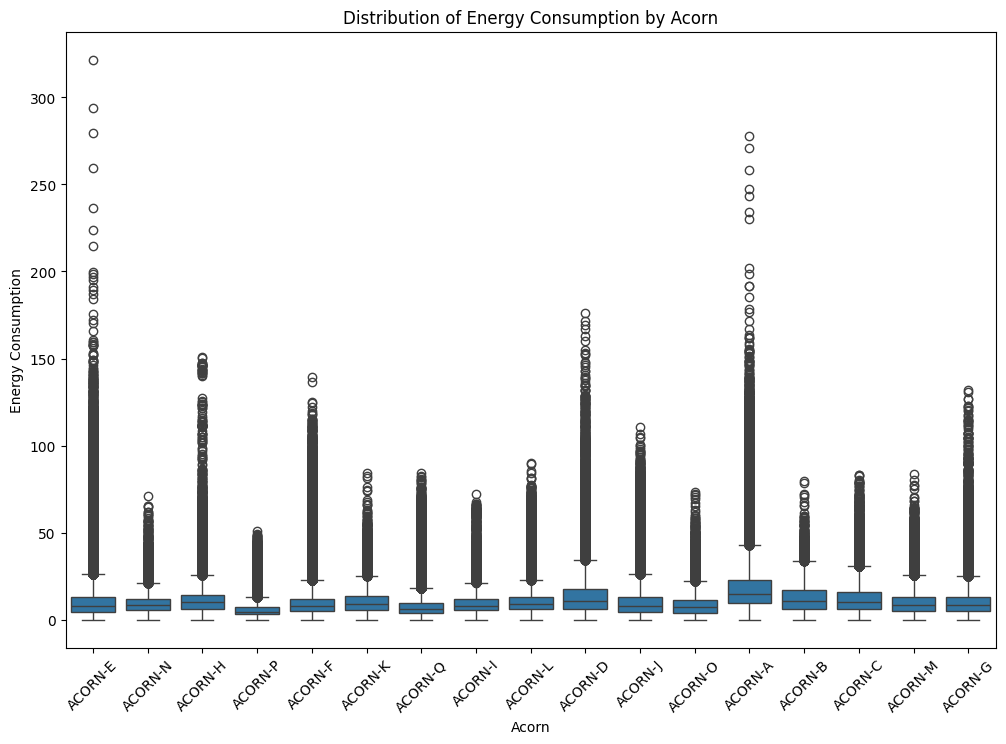

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Acorn', y='energy_sum', data=filtered_df)
plt.title('Distribution of Energy Consumption by Acorn')
plt.xlabel('Acorn')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.show()

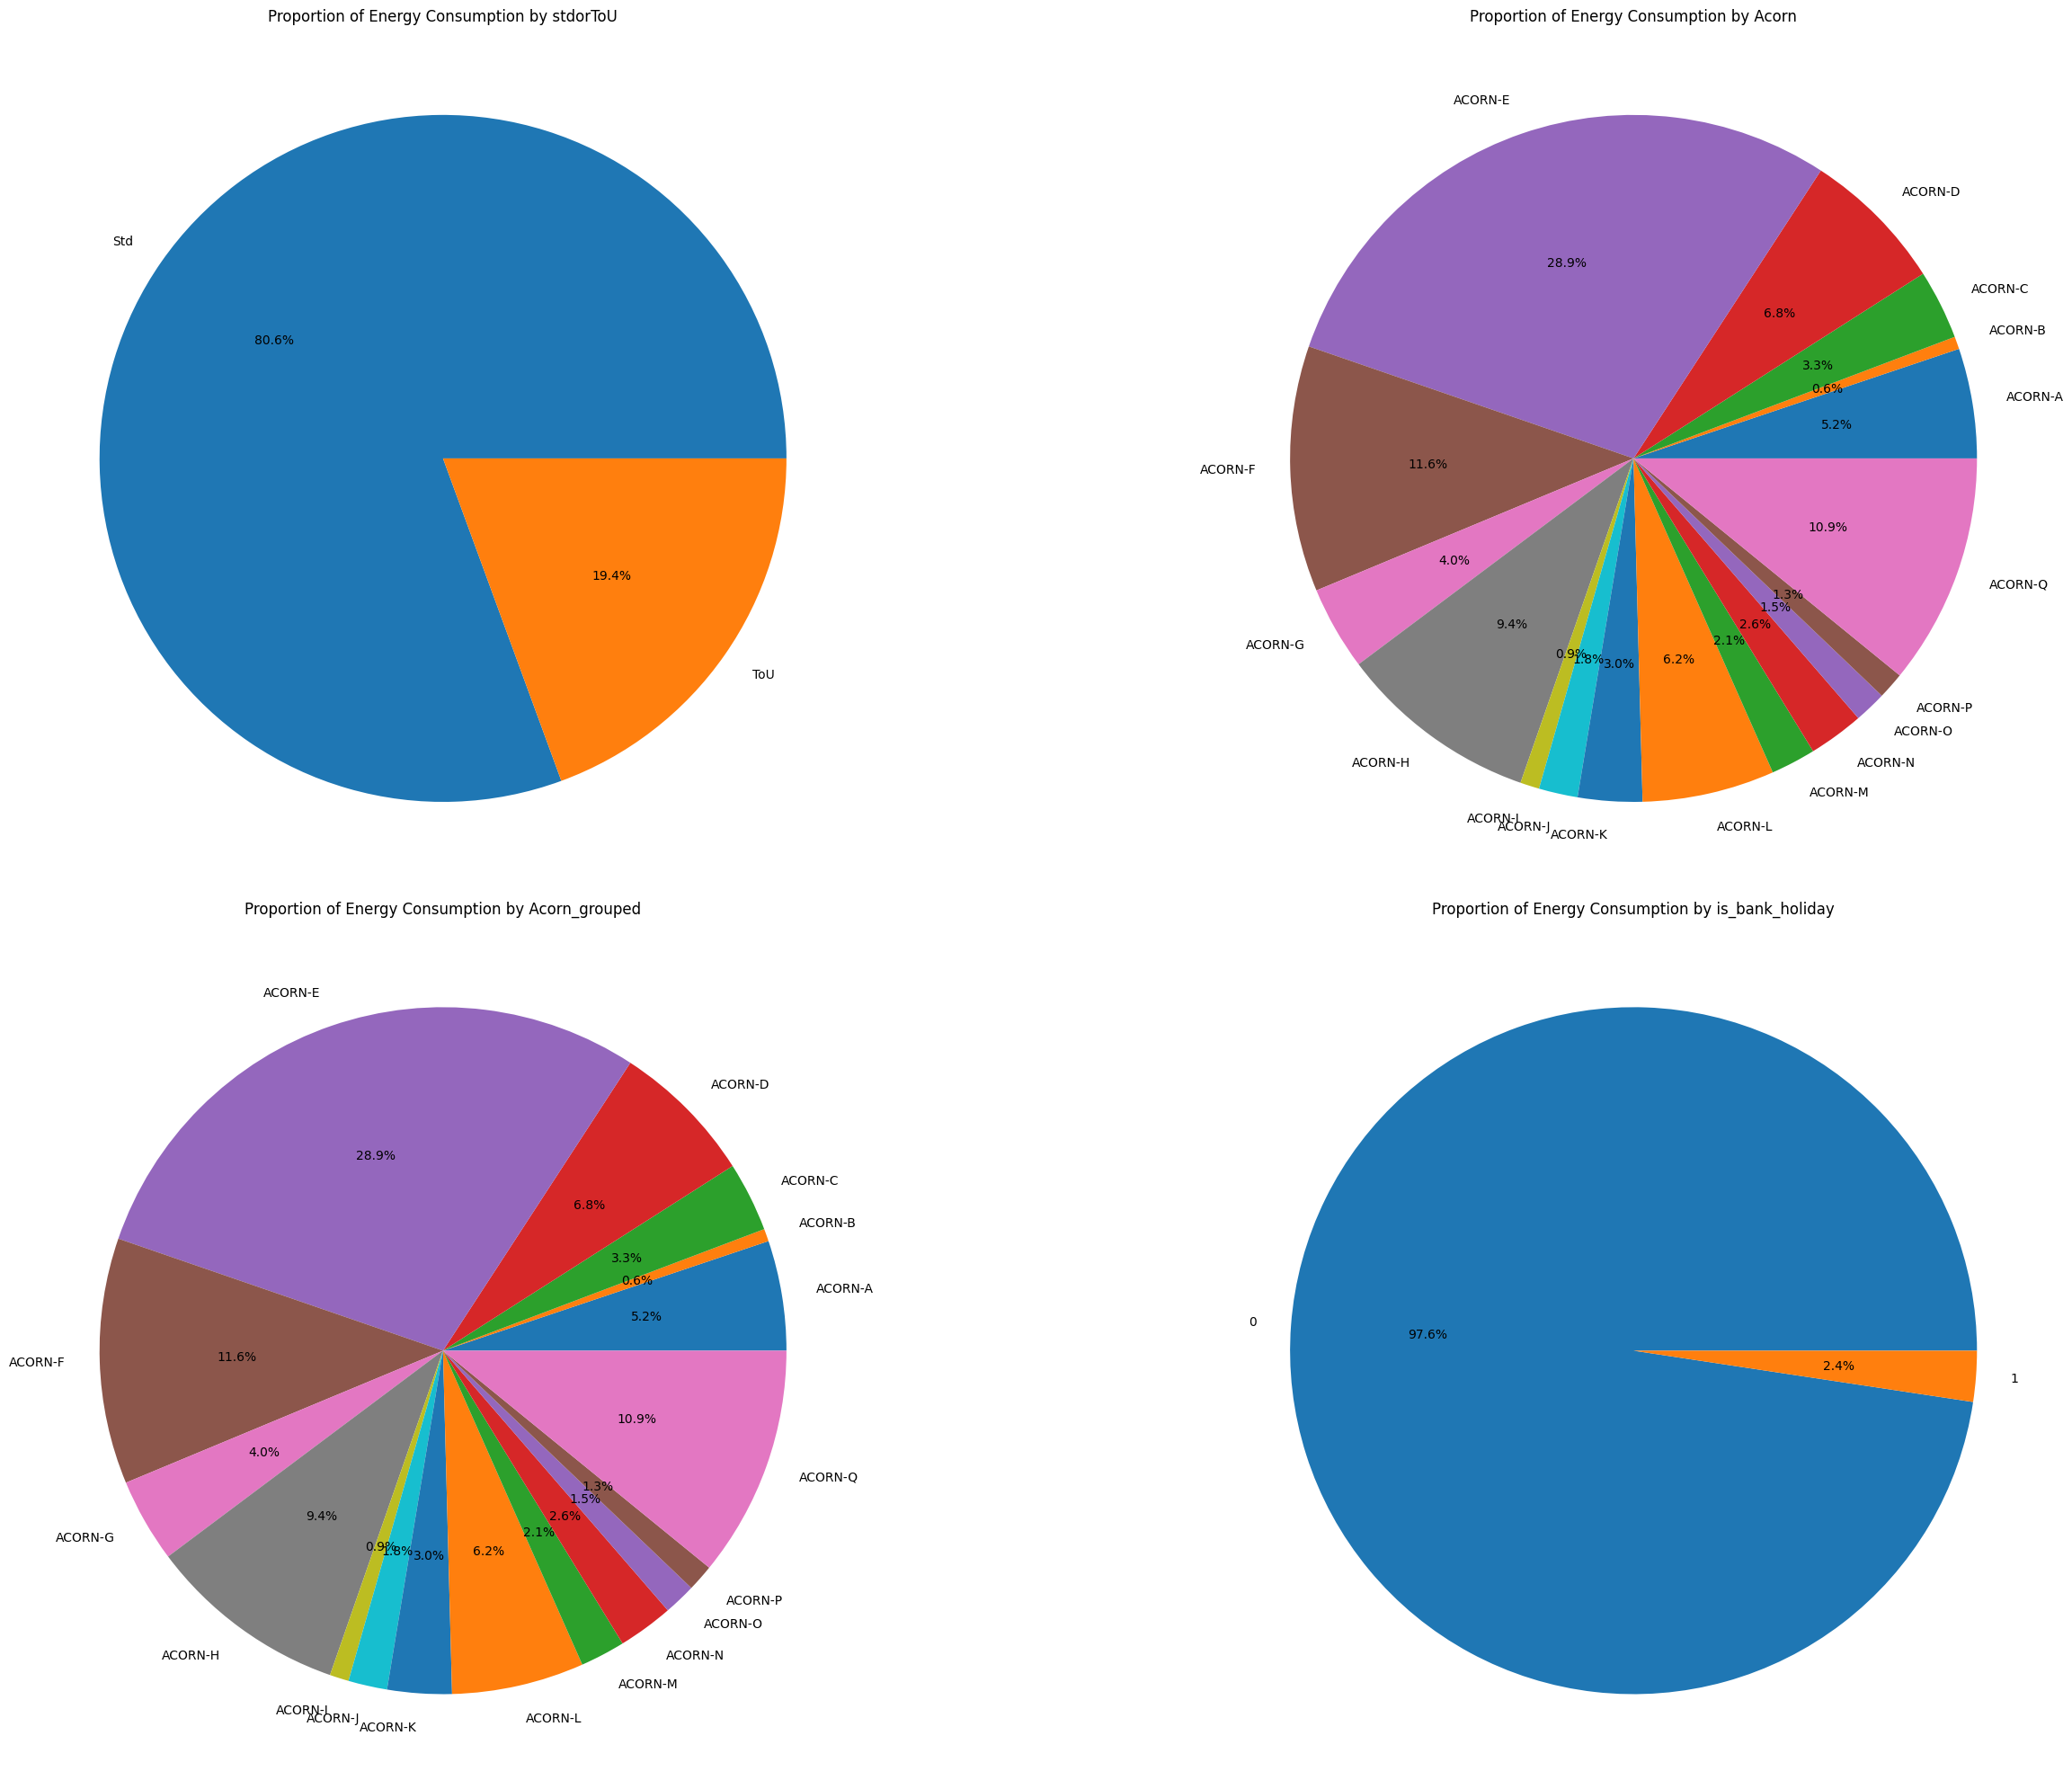

In [ ]:
# Calculate the total energy consumption for each category
energy_sum_by_stdorToU = filtered_df.groupby('stdorToU')['energy_sum'].sum()
energy_sum_by_Acorn = filtered_df.groupby('Acorn')['energy_sum'].sum()
energy_sum_by_Acorn_grouped = filtered_df.groupby('Acorn')['energy_sum'].sum()
energy_sum_by_is_bank_holiday = filtered_df.groupby('is_bank_holiday')['energy_sum'].sum()

# Create pie charts
plt.figure(figsize=(30, 20))

plt.subplot(2, 2, 1)
plt.pie(energy_sum_by_stdorToU, labels=energy_sum_by_stdorToU.index, autopct='%1.1f%%')
plt.title('Proportion of Energy Consumption by stdorToU')

plt.subplot(2, 2, 2)
plt.pie(energy_sum_by_Acorn, labels=energy_sum_by_Acorn.index, autopct='%1.1f%%')
plt.title('Proportion of Energy Consumption by Acorn')

plt.subplot(2, 2, 3)
plt.pie(energy_sum_by_Acorn_grouped, labels=energy_sum_by_Acorn_grouped.index, autopct='%1.1f%%')
plt.title('Proportion of Energy Consumption by Acorn_grouped')

plt.subplot(2, 2, 4)
plt.pie(energy_sum_by_is_bank_holiday, labels=energy_sum_by_is_bank_holiday.index, autopct='%1.1f%%')
plt.title('Proportion of Energy Consumption by is_bank_holiday')

plt.tight_layout()
plt.show()

In [ ]:
quant = ['energy_sum', 'energy_mean', 'energy_count', 'energy_median', 'energy_max', 'energy_std', 'energy_min']
cat = ['stdorToU', 'Acorn', 'file', 'Category', 'is_bank_holiday']

In [ ]:
# Select quantitative columns
quantitative_df = filtered_df[quant]

In [ ]:
# Compute correlation matrix for quantitative variables
quantitative_corr_matrix = quantitative_df.corr()

# Print the correlation matrix
print(quantitative_corr_matrix)

               energy_sum  energy_mean  energy_count  energy_median  \
energy_sum       1.000000     0.994031      0.056269       0.924236   
energy_mean      0.994031     1.000000      0.001822       0.932281   
energy_count     0.056269     0.001822      1.000000      -0.013725   
energy_median    0.924236     0.932281     -0.013725       1.000000   
energy_max       0.765782     0.763411      0.049013       0.569799   
energy_std       0.778257     0.774484      0.049777       0.549914   
energy_min       0.709364     0.731603     -0.085139       0.769074   

               energy_max  energy_std  energy_min  
energy_sum       0.765782    0.778257    0.709364  
energy_mean      0.763411    0.774484    0.731603  
energy_count     0.049013    0.049777   -0.085139  
energy_median    0.569799    0.549914    0.769074  
energy_max       1.000000    0.944989    0.360565  
energy_std       0.944989    1.000000    0.261047  
energy_min       0.360565    0.261047    1.000000  


In [ ]:
cat_df=filtered_df[cat]

In [ ]:
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
encoded_cat_df = cat_df.apply(label_encoder.fit_transform)

# Perform ANOVA for each categorical variable
anova_results = {}
for column in encoded_cat_df.columns:
    anova_result = f_oneway(filtered_df['energy_mean'], encoded_cat_df[column])
    anova_results[column] = anova_result

# Print ANOVA results
for column, result in anova_results.items():
    print(f"ANOVA result for {column}: {result}")

ANOVA result for stdorToU: F_onewayResult(statistic=1237.6449185915144, pvalue=4.364885326197574e-271)
ANOVA result for Acorn: F_onewayResult(statistic=5524895.8526094975, pvalue=0.0)
ANOVA result for file: F_onewayResult(statistic=7043770.748151099, pvalue=0.0)
ANOVA result for Category: F_onewayResult(statistic=5311687.263953105, pvalue=0.0)
ANOVA result for is_bank_holiday: F_onewayResult(statistic=1464742.714532871, pvalue=0.0)


In [ ]:
# Convert 'day' column in 'filtered_df' to datetime64[ns]
filtered_df['day'] = pd.to_datetime(filtered_df['day'])
weather_energy['day'] = pd.to_datetime(weather_energy['day'])

# Merge the datasets based on the common column 'day'
filtered_df = pd.merge(filtered_df, weather_energy, on=['day'], how='inner')

# Display the merged data
filtered_df

LCLid        day  energy_median  energy_mean  energy_max  \
0        MAC000131 2012-11-01         0.1425     0.327604       0.878   
1        MAC000132 2012-11-01         0.3150     0.415229       1.901   
2        MAC000221 2012-11-01         0.1810     0.287271       0.738   
3        MAC000228 2012-11-01         0.1790     0.254083       0.880   
4        MAC000234 2012-11-01         0.1350     0.185458       0.443   
...            ...        ...            ...          ...         ...   
2317387  MAC004926 2014-02-28         0.0330     0.033000       0.033   
2317388  MAC004932 2014-02-28         0.1770     0.177000       0.177   
2317389  MAC004937 2014-02-28         0.0840     0.084000       0.084   
2317390  MAC004965 2014-02-28         0.6180     0.618000       0.618   
2317391  MAC004977 2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum_x  energy_min stdorToU  ...  \
0                  48    0.303041        15.725       0.058      Std  ...   
1                  48    0.385232        19.931       0.071      Std  ...   
2                  48    0.218179        13.789       0.055      Std  ...   
3                  48    0.236528        12.196       0.030      Std  ...   
4                  48    0.117488         8.902       0.034      Std  ...   
...               ...         ...           ...         ...      ...  ...   
2317387             1    0.004878         0.033       0.033      ToU  ...   
2317388             1    0.025605         0.177       0.177      ToU  ...   
2317389             1    0.012180         0.084       0.084      ToU  ...   
2317390             1    0.051566         0.618       0.618      ToU  ...   
2317391             1    0.014352         0.097       0.097      ToU  ...   

        is_bank_holiday                        Category  energy_sum_y  \
0                     0  Category 2 - Rising Prosperity  51525.248996   
1                     0  Category 2 - Rising Prosperity  51525.248996   
2                     0  Category 2 - Rising Prosperity  51525.248996   
3                     0  Category 2 - Rising Prosperity  51525.248996   
4                     0  Category 2 - Rising Prosperity  51525.248996   
...                 ...                             ...           ...   
2317387               0  Category 2 - Rising Prosperity   1017.686000   
2317388               0  Category 2 - Rising Prosperity   1017.686000   
2317389               0  Category 2 - Rising Prosperity   1017.686000   
2317390               0  Category 2 - Rising Prosperity   1017.686000   
2317391               0  Category 2 - Rising Prosperity   1017.686000   

        temperatureMax  dewPoint  cloudCover  visibility  humidity  uvIndex  \
0                11.46      5.06        0.44       12.54      0.85      1.0   
1                11.46      5.06        0.44       12.54      0.85      1.0   
2                11.46      5.06        0.44       12.54      0.85      1.0   
3                11.46      5.06        0.44       12.54      0.85      1.0   
4                11.46      5.06        0.44       12.54      0.85      1.0   
...                ...       ...         ...         ...       ...      ...   
2317387           7.35      3.11        0.67       10.80      0.86      1.0   
2317388           7.35      3.11        0.67       10.80      0.86      1.0   
2317389           7.35      3.11        0.67       10.80      0.86      1.0   
2317390           7.35      3.11        0.67       10.80      0.86      1.0   
2317391           7.35      3.11        0.67       10.80      0.86      1.0   

         temperatureMin  
0                  4.20  
1                  4.20  
2                  4.20  
3                  4.20  
4                  4.20  
...                 ...  
2317387            3.43  
2317388            3.43  
2317389            3.43  
2317390            3.43  
2317391            3.43  

[2317392 rows x 22 columns]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317392 entries, 0 to 2317391
Data columns (total 22 columns):
 #   Column           Dtype         
---  ------           -----         
 0   LCLid            object        
 1   day              datetime64[ns]
 2   energy_median    float64       
 3   energy_mean      float64       
 4   energy_max       float64       
 5   energy_count     int64         
 6   energy_std       float64       
 7   energy_sum_x     float64       
 8   energy_min       float64       
 9   stdorToU         object        
 10  Acorn            object        
 11  file             object        
 12  is_bank_holiday  int64         
 13  Category         object        
 14  energy_sum_y     float64       
 15  temperatureMax   float64       
 16  dewPoint         float64       
 17  cloudCover       float64       
 18  visibility       float64       
 19  humidity         float64       
 20  uvIndex          float64       
 21  temperatureMin   float64       

##Customer Clusters

In [ ]:
to_delete = ['energy_count', 'energy_max', 'energy_std', 'energy_min', 'energy_median']
data = filtered_df.drop(to_delete, axis=1)

In [ ]:
data = data.drop('energy_sum_y', axis=1)
data

LCLid        day  energy_mean  energy_sum_x stdorToU    Acorn  \
0        MAC000131 2012-11-01     0.327604        15.725      Std  ACORN-E   
1        MAC000132 2012-11-01     0.415229        19.931      Std  ACORN-E   
2        MAC000221 2012-11-01     0.287271        13.789      Std  ACORN-E   
3        MAC000228 2012-11-01     0.254083        12.196      Std  ACORN-E   
4        MAC000234 2012-11-01     0.185458         8.902      Std  ACORN-E   
...            ...        ...          ...           ...      ...      ...   
2317387  MAC004926 2014-02-28     0.033000         0.033      ToU  ACORN-E   
2317388  MAC004932 2014-02-28     0.177000         0.177      ToU  ACORN-E   
2317389  MAC004937 2014-02-28     0.084000         0.084      ToU  ACORN-E   
2317390  MAC004965 2014-02-28     0.618000         0.618      ToU  ACORN-E   
2317391  MAC004977 2014-02-28     0.097000         0.097      ToU  ACORN-E   

             file  is_bank_holiday                        Category  \
0        block_22                0  Category 2 - Rising Prosperity   
1        block_22                0  Category 2 - Rising Prosperity   
2        block_22                0  Category 2 - Rising Prosperity   
3        block_22                0  Category 2 - Rising Prosperity   
4        block_22                0  Category 2 - Rising Prosperity   
...           ...              ...                             ...   
2317387  block_33                0  Category 2 - Rising Prosperity   
2317388  block_33                0  Category 2 - Rising Prosperity   
2317389  block_33                0  Category 2 - Rising Prosperity   
2317390  block_33                0  Category 2 - Rising Prosperity   
2317391  block_33                0  Category 2 - Rising Prosperity   

         temperatureMax  dewPoint  cloudCover  visibility  humidity  uvIndex  \
0                 11.46      5.06        0.44       12.54      0.85      1.0   
1                 11.46      5.06        0.44       12.54      0.85      1.0   
2                 11.46      5.06        0.44       12.54      0.85      1.0   
3                 11.46      5.06        0.44       12.54      0.85      1.0   
4                 11.46      5.06        0.44       12.54      0.85      1.0   
...                 ...       ...         ...         ...       ...      ...   
2317387            7.35      3.11        0.67       10.80      0.86      1.0   
2317388            7.35      3.11        0.67       10.80      0.86      1.0   
2317389            7.35      3.11        0.67       10.80      0.86      1.0   
2317390            7.35      3.11        0.67       10.80      0.86      1.0   
2317391            7.35      3.11        0.67       10.80      0.86      1.0   

         temperatureMin  
0                  4.20  
1                  4.20  
2                  4.20  
3                  4.20  
4                  4.20  
...                 ...  
2317387            3.43  
2317388            3.43  
2317389            3.43  
2317390            3.43  
2317391            3.43  

[2317392 rows x 16 columns]

In [ ]:
# Desired number of samples per Acorn type per day
samples_per_day_per_acorn_type = 13

# Function to sample from each group
def sample_daily_acorn_group(group):
    return group.sample(n=min(len(group), samples_per_day_per_acorn_type), random_state=42) if len(group) >= samples_per_day_per_acorn_type else group

# Sample data ensuring each Acorn type's daily representation is balanced
sampled_df = data.groupby(['day', 'Acorn']).apply(sample_daily_acorn_group).reset_index(drop=True)

# Verify the daily balance and coverage
daily_balance_check = sampled_df.groupby(['day', 'Acorn']).size().unstack(fill_value=0)

print("Daily Samples per Acorn type:\n", daily_balance_check.head())  # Showing the head for brevity

Daily Samples per Acorn type:
 Acorn       ACORN-A  ACORN-B  ACORN-C  ACORN-D  ACORN-E  ACORN-F  ACORN-G  \
day                                                                         
2012-11-01       13       13       13       13       13       13       13   
2012-11-02       13       13       13       13       13       13       13   
2012-11-03       13       13       13       13       13       13       13   
2012-11-04       13       13       13       13       13       13       13   
2012-11-05       13       13       13       13       13       13       13   

Acorn       ACORN-H  ACORN-I  ACORN-J  ACORN-K  ACORN-L  ACORN-M  ACORN-N  \
day                                                                         
2012-11-01       13       13       13       13       13       13       13   
2012-11-02       13       13       13       13       13       13       13   
2012-11-03       13       13       13       13       13       13       13   
2012-11-04       13       13       13       

In [ ]:
sampled_df

LCLid        day  energy_mean  energy_sum_x stdorToU    Acorn  \
0       MAC003400 2012-11-01     0.317104        15.221      Std  ACORN-A   
1       MAC003211 2012-11-01     0.271604        13.037      ToU  ACORN-A   
2       MAC003536 2012-11-01     0.261250        12.540      ToU  ACORN-A   
3       MAC004900 2012-11-01     0.618417        29.684      Std  ACORN-A   
4       MAC002150 2012-11-01     0.347833        16.696      Std  ACORN-A   
...           ...        ...          ...           ...      ...      ...   
106738  MAC001062 2014-02-28     0.347000         0.347      Std  ACORN-Q   
106739  MAC004514 2014-02-28     0.235000         0.235      Std  ACORN-Q   
106740  MAC003037 2014-02-28     0.024000         0.024      ToU  ACORN-Q   
106741  MAC004674 2014-02-28     0.528000         0.528      Std  ACORN-Q   
106742  MAC005052 2014-02-28     0.837000         0.837      Std  ACORN-Q   

             file  is_bank_holiday                         Category  \
0         block_0                0  Category 1 - Affluent Achievers   
1         block_3                0  Category 1 - Affluent Achievers   
2         block_2                0  Category 1 - Affluent Achievers   
3         block_2                0  Category 1 - Affluent Achievers   
4         block_1                0  Category 1 - Affluent Achievers   
...           ...              ...                              ...   
106738   block_98                0     Category 5 - Urban Adversity   
106739  block_103                0     Category 5 - Urban Adversity   
106740   block_94                0     Category 5 - Urban Adversity   
106741   block_99                0     Category 5 - Urban Adversity   
106742   block_98                0     Category 5 - Urban Adversity   

        temperatureMax  dewPoint  cloudCover  visibility  humidity  uvIndex  \
0                11.46      5.06        0.44       12.54      0.85      1.0   
1                11.46      5.06        0.44       12.54      0.85      1.0   
2                11.46      5.06        0.44       12.54      0.85      1.0   
3                11.46      5.06        0.44       12.54      0.85      1.0   
4                11.46      5.06        0.44       12.54      0.85      1.0   
...                ...       ...         ...         ...       ...      ...   
106738            7.35      3.11        0.67       10.80      0.86      1.0   
106739            7.35      3.11        0.67       10.80      0.86      1.0   
106740            7.35      3.11        0.67       10.80      0.86      1.0   
106741            7.35      3.11        0.67       10.80      0.86      1.0   
106742            7.35      3.11        0.67       10.80      0.86      1.0   

        temperatureMin  
0                 4.20  
1                 4.20  
2                 4.20  
3                 4.20  
4                 4.20  
...                ...  
106738            3.43  
106739            3.43  
106740            3.43  
106741            3.43  
106742            3.43  

[106743 rows x 16 columns]

Acorn
ACORN-A    26
ACORN-B    18
ACORN-C    25
ACORN-D    25
ACORN-E    26
ACORN-F    26
ACORN-G    24
ACORN-H    25
ACORN-I    24
ACORN-J    26
ACORN-K    24
ACORN-L    25
ACORN-M    25
ACORN-N    26
ACORN-O    22
ACORN-P    26
ACORN-Q    25
Name: LCLid, dtype: int64


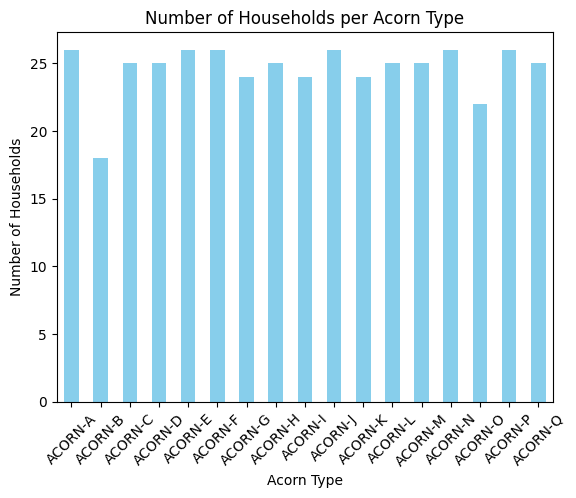

In [ ]:
household_counts = sampled_df.groupby('Acorn')['LCLid'].nunique()

# Print the counts
print(household_counts)
# Create a bar plot for household counts per Acorn type
household_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Households per Acorn Type')
plt.xlabel('Acorn Type')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()

In [ ]:
data2 = sampled_df.drop('LCLid', axis = 1)

In [ ]:
data2

day  energy_mean  energy_sum_x stdorToU    Acorn       file  \
0      2012-11-01     0.317104        15.221      Std  ACORN-A    block_0   
1      2012-11-01     0.271604        13.037      ToU  ACORN-A    block_3   
2      2012-11-01     0.261250        12.540      ToU  ACORN-A    block_2   
3      2012-11-01     0.618417        29.684      Std  ACORN-A    block_2   
4      2012-11-01     0.347833        16.696      Std  ACORN-A    block_1   
...           ...          ...           ...      ...      ...        ...   
106738 2014-02-28     0.347000         0.347      Std  ACORN-Q   block_98   
106739 2014-02-28     0.235000         0.235      Std  ACORN-Q  block_103   
106740 2014-02-28     0.024000         0.024      ToU  ACORN-Q   block_94   
106741 2014-02-28     0.528000         0.528      Std  ACORN-Q   block_99   
106742 2014-02-28     0.837000         0.837      Std  ACORN-Q   block_98   

        is_bank_holiday                         Category  temperatureMax  \
0                     0  Category 1 - Affluent Achievers           11.46   
1                     0  Category 1 - Affluent Achievers           11.46   
2                     0  Category 1 - Affluent Achievers           11.46   
3                     0  Category 1 - Affluent Achievers           11.46   
4                     0  Category 1 - Affluent Achievers           11.46   
...                 ...                              ...             ...   
106738                0     Category 5 - Urban Adversity            7.35   
106739                0     Category 5 - Urban Adversity            7.35   
106740                0     Category 5 - Urban Adversity            7.35   
106741                0     Category 5 - Urban Adversity            7.35   
106742                0     Category 5 - Urban Adversity            7.35   

        dewPoint  cloudCover  visibility  humidity  uvIndex  temperatureMin  
0           5.06        0.44       12.54      0.85      1.0            4.20  
1           5.06        0.44       12.54      0.85      1.0            4.20  
2           5.06        0.44       12.54      0.85      1.0            4.20  
3           5.06        0.44       12.54      0.85      1.0            4.20  
4           5.06        0.44       12.54      0.85      1.0            4.20  
...          ...         ...         ...       ...      ...             ...  
106738      3.11        0.67       10.80      0.86      1.0            3.43  
106739      3.11        0.67       10.80      0.86      1.0            3.43  
106740      3.11        0.67       10.80      0.86      1.0            3.43  
106741      3.11        0.67       10.80      0.86      1.0            3.43  
106742      3.11        0.67       10.80      0.86      1.0            3.43  

[106743 rows x 15 columns]

In [ ]:
# Handle missing values
data2.dropna(inplace=True)

In [ ]:
#from sklearn.model_selection import train_test_split

# Split the data into train and test sets with stratification
#sample, test_sample = train_test_split(data2, test_size=0.8, random_state=42, stratify=data2[['stdorToU', 'Acorn', 'file', 'Category']])

In [ ]:
train_sample = data2.drop('day', axis=1)

In [ ]:
train_sample

energy_mean  energy_sum_x stdorToU    Acorn       file  \
0          0.317104        15.221      Std  ACORN-A    block_0   
1          0.271604        13.037      ToU  ACORN-A    block_3   
2          0.261250        12.540      ToU  ACORN-A    block_2   
3          0.618417        29.684      Std  ACORN-A    block_2   
4          0.347833        16.696      Std  ACORN-A    block_1   
...             ...           ...      ...      ...        ...   
106738     0.347000         0.347      Std  ACORN-Q   block_98   
106739     0.235000         0.235      Std  ACORN-Q  block_103   
106740     0.024000         0.024      ToU  ACORN-Q   block_94   
106741     0.528000         0.528      Std  ACORN-Q   block_99   
106742     0.837000         0.837      Std  ACORN-Q   block_98   

        is_bank_holiday                         Category  temperatureMax  \
0                     0  Category 1 - Affluent Achievers           11.46   
1                     0  Category 1 - Affluent Achievers           11.46   
2                     0  Category 1 - Affluent Achievers           11.46   
3                     0  Category 1 - Affluent Achievers           11.46   
4                     0  Category 1 - Affluent Achievers           11.46   
...                 ...                              ...             ...   
106738                0     Category 5 - Urban Adversity            7.35   
106739                0     Category 5 - Urban Adversity            7.35   
106740                0     Category 5 - Urban Adversity            7.35   
106741                0     Category 5 - Urban Adversity            7.35   
106742                0     Category 5 - Urban Adversity            7.35   

        dewPoint  cloudCover  visibility  humidity  uvIndex  temperatureMin  
0           5.06        0.44       12.54      0.85      1.0            4.20  
1           5.06        0.44       12.54      0.85      1.0            4.20  
2           5.06        0.44       12.54      0.85      1.0            4.20  
3           5.06        0.44       12.54      0.85      1.0            4.20  
4           5.06        0.44       12.54      0.85      1.0            4.20  
...          ...         ...         ...       ...      ...             ...  
106738      3.11        0.67       10.80      0.86      1.0            3.43  
106739      3.11        0.67       10.80      0.86      1.0            3.43  
106740      3.11        0.67       10.80      0.86      1.0            3.43  
106741      3.11        0.67       10.80      0.86      1.0            3.43  
106742      3.11        0.67       10.80      0.86      1.0            3.43  

[106743 rows x 14 columns]

In [ ]:
!pip install prince

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import gc  # Import garbage collector

# Assuming 'train_sample' is your DataFrame loaded with data

# Define the categorical and quantitative features
categorical_features = ['stdorToU', 'Acorn', 'file', 'Category']
quantitative_features = ['energy_sum_x']

# Preprocess categorical features with one-hot encoding
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=True))
])

X_categorical = categorical_transformer.fit_transform(train_sample[categorical_features])

# Preprocess quantitative features with standard scaling
quantitative_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_quantitative = quantitative_transformer.fit_transform(train_sample[quantitative_features])

# Convert the preprocessed features back to DataFrame
feature_names = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)
# Customize feature names if necessary
feature_names = [name.replace('x0', 'stdorToU').replace('x1', 'Acorn').replace('x2', 'file').replace('x3', 'Category') for name in feature_names]

X_categorical_df = pd.DataFrame.sparse.from_spmatrix(X_categorical, columns=feature_names)

# Convert scaled quantitative data to DataFrame
X_quantitative_df = pd.DataFrame(X_quantitative, columns=quantitative_features)

# Combine preprocessed features, ensure the concatenation does not convert sparse matrix to dense
X_combined_df = pd.concat([X_categorical_df, X_quantitative_df], axis=1)

# Free memory, if there are any unused large variables, consider deleting them before running collect
gc.collect()

# Display the first few rows of the combined DataFrame to verify
X_combined_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


stdorToU_Std  stdorToU_ToU  Acorn_ACORN-A  Acorn_ACORN-B  Acorn_ACORN-C  \
0           1.0           0.0            1.0            0.0            0.0   
1           0.0           1.0            1.0            0.0            0.0   
2           0.0           1.0            1.0            0.0            0.0   
3           1.0           0.0            1.0            0.0            0.0   
4           1.0           0.0            1.0            0.0            0.0   

   Acorn_ACORN-D  Acorn_ACORN-E  Acorn_ACORN-F  Acorn_ACORN-G  Acorn_ACORN-H  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   ...  file_block_95  file_block_96  file_block_98  file_block_99  \
0  ...            0.0            0.0            0.0            0.0   
1  ...            0.0            0.0            0.0            0.0   
2  ...            0.0            0.0            0.0            0.0   
3  ...            0.0            0.0            0.0            0.0   
4  ...            0.0            0.0            0.0            0.0   

   Category_Category 1 - Affluent Achievers  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   

   Category_Category 2 - Rising Prosperity  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Category_Category 3 - Comfortable Communities  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Category_Category 4 - Financially Stretched  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Category_Category 5 - Urban Adversity  energy_sum_x  
0                                    0.0      0.425078  
1                                    0.0      0.213841  
2                                    0.0      0.165771  
3                                    0.0      1.823943  
4                                    0.0      0.567741  

[5 rows x 119 columns]

In [ ]:
from prince import MCA
# Perform MCA
mca = MCA(n_components=2)
mca.fit(X_combined_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MCA()

In [ ]:
# Transform the data
mca_results = mca.transform(X_combined_df)

# Use %memit here in a Jupyter Notebook cell to profile memory usage
# %memit

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
# Assuming mca_results is a pandas DataFrame
file_path = '/content/drive/My Drive/sampled_df.csv'  # Change 'My Drive' to the specific folder path if needed
sampled_df.to_csv(file_path, index=False)
print("File saved successfully in Google Drive.")

NameError: name 'sampled_df' is not defined

In [ ]:
# Assuming mca_results is a pandas DataFrame
file_path = '/content/drive/My Drive/mca_results.csv'  # Change 'My Drive' to the specific folder path if needed
mca_results.to_csv(file_path, index=False)
print("File saved successfully in Google Drive.")

NameError: name 'mca_results' is not defined

In [ ]:
mca_results = pd.read_csv('/content/drive/My Drive/mca_results.csv')
sampled_df = pd.read_csv('/content/drive/My Drive/sampled_df.csv')

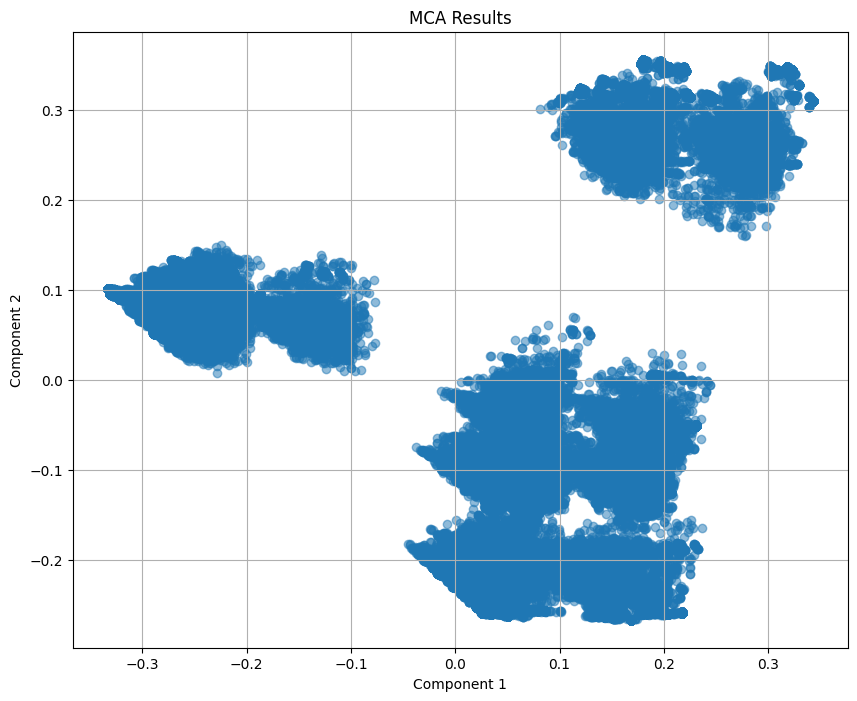

In [ ]:
#Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(mca_results.iloc[:, 0], mca_results.iloc[:, 1], alpha=0.5)  # Adjust alpha to see density of points
plt.title('MCA Results')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

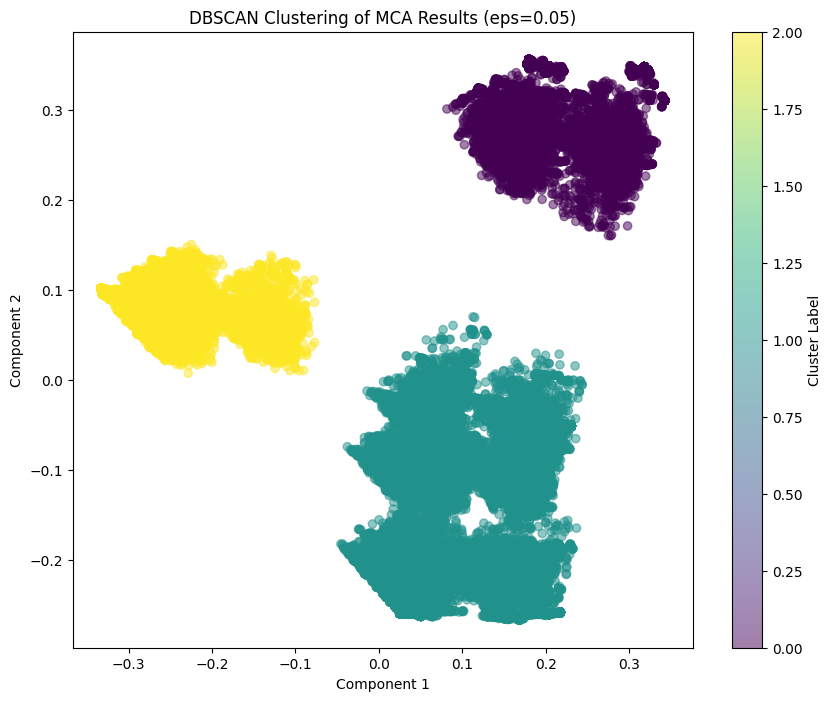

In [ ]:
from sklearn.cluster import DBSCAN
# Instantiate DBSCAN with eps=0.05 and min_samples=5
dbscan = DBSCAN(eps=0.03, min_samples=5)

# Fit DBSCAN to the MCA results
cluster_labels = dbscan.fit_predict(mca_results)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(mca_results.iloc[:, 0], mca_results.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering of MCA Results (eps=0.05)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# Assign cluster labels obtained from DBSCAN
sampled_df['Cluster'] = cluster_labels

# Profile clusters
cluster_profiles = {}
for cluster_id in sampled_df['Cluster'].unique():
    cluster_data = sampled_df[sampled_df['Cluster'] == cluster_id]
    cluster_profile = cluster_data.describe()  # Summary statistics
    cluster_profiles[cluster_id] = cluster_profile

# Print cluster profiles
for cluster_id, profile in cluster_profiles.items():
    print(f"Cluster {cluster_id} Profile:")
    print(profile)
    print()

Cluster 0 Profile:
        energy_mean  energy_sum_x  is_bank_holiday  temperatureMax  \
count  18837.000000  18837.000000     18837.000000    18837.000000   
mean       0.346969     16.613287         0.020704       12.925112   
std        0.362408     17.393048         0.142395        6.543364   
min        0.000000      0.000000         0.000000       -0.060000   
25%        0.167083      7.980000         0.000000        8.590000   
50%        0.263625     12.629000         0.000000       11.380000   
75%        0.392458     18.824000         0.000000       17.530000   
max        5.791125    277.973999         1.000000       32.400000   

           dewPoint    cloudCover    visibility      humidity       uvIndex  \
count  18837.000000  18837.000000  18837.000000  18837.000000  18837.000000   
mean       5.998836      0.491254     11.180778      0.783763      2.262940   
std        5.002477      0.194313      2.393953      0.098212      1.750294   
min       -5.540000      0.030000 

In [ ]:
# Define the features for profiling
profile_features = ['energy_sum_x', 'stdorToU', 'Acorn', 'file', 'Category']

# Determine the number of clusters (excluding noise, labeled as -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Iterate over each cluster and calculate the profile
for cluster_id in range(n_clusters):
    cluster_data = sampled_df[cluster_labels == cluster_id]
    cluster_profile = cluster_data[profile_features].describe()
    print(f"Cluster {cluster_id} Profile:")
    print(cluster_profile)
    print()


Cluster 0 Profile:
       energy_sum_x
count  18837.000000
mean      16.613287
std       17.393048
min        0.000000
25%        7.980000
50%       12.629000
75%       18.824000
max      277.973999

Cluster 1 Profile:
       energy_sum_x
count  56511.000000
mean       9.069081
std        7.251018
min        0.000000
25%        4.063000
50%        7.444000
75%       12.042000
max      101.706999

Cluster 2 Profile:
       energy_sum_x
count  31395.000000
mean      10.516330
std        7.846352
min        0.012000
25%        5.142000
50%        8.562000
75%       13.236000
max       80.307000



In [ ]:
# Profile for energy_sum_x, stdorToU, Acorn, file, and Category
cluster_profiles = []

for cluster_label in range(n_clusters):
    cluster_data = sampled_df[sampled_df['Cluster'] == cluster_label]
    cluster_profile = cluster_data[['energy_sum_x', 'stdorToU', 'Acorn', 'file', 'Category']].describe()

    # Count occurrences of each Acorn type within the cluster
    acorn_counts = cluster_data['Acorn'].value_counts()
    cluster_profile['Acorn_most_common'] = acorn_counts.index[0] if not acorn_counts.empty else None
    cluster_profile['Acorn_most_common_count'] = acorn_counts.iloc[0] if not acorn_counts.empty else 0

    # Count occurrences of each Category within the cluster
    category_counts = cluster_data['Category'].value_counts()
    cluster_profile['Category_most_common'] = category_counts.index[0] if not category_counts.empty else None
    cluster_profile['Category_most_common_count'] = category_counts.iloc[0] if not category_counts.empty else 0

    cluster_profiles.append(cluster_profile)

# Concatenate the profiles for all clusters
cluster_profiles_df = pd.concat(cluster_profiles)

# Display the cluster profiles
print("Cluster Profiles:")
print(cluster_profiles_df)

Cluster Profiles:
       energy_sum_x Acorn_most_common  Acorn_most_common_count  \
count  18837.000000           ACORN-A                     6279   
mean      16.613287           ACORN-A                     6279   
std       17.393048           ACORN-A                     6279   
min        0.000000           ACORN-A                     6279   
25%        7.980000           ACORN-A                     6279   
50%       12.629000           ACORN-A                     6279   
75%       18.824000           ACORN-A                     6279   
max      277.973999           ACORN-A                     6279   
count  56511.000000           ACORN-D                     6279   
mean       9.069081           ACORN-D                     6279   
std        7.251018           ACORN-D                     6279   
min        0.000000           ACORN-D                     6279   
25%        4.063000           ACORN-D                     6279   
50%        7.444000           ACORN-D                     

In [ ]:
# Print unique cluster labels to confirm they are distinct
sampled_df

LCLid         day  energy_mean  energy_sum_x stdorToU    Acorn  \
0       MAC003400  2012-11-01     0.317104        15.221      Std  ACORN-A   
1       MAC003211  2012-11-01     0.271604        13.037      ToU  ACORN-A   
2       MAC003536  2012-11-01     0.261250        12.540      ToU  ACORN-A   
3       MAC004900  2012-11-01     0.618417        29.684      Std  ACORN-A   
4       MAC002150  2012-11-01     0.347833        16.696      Std  ACORN-A   
...           ...         ...          ...           ...      ...      ...   
106738  MAC001062  2014-02-28     0.347000         0.347      Std  ACORN-Q   
106739  MAC004514  2014-02-28     0.235000         0.235      Std  ACORN-Q   
106740  MAC003037  2014-02-28     0.024000         0.024      ToU  ACORN-Q   
106741  MAC004674  2014-02-28     0.528000         0.528      Std  ACORN-Q   
106742  MAC005052  2014-02-28     0.837000         0.837      Std  ACORN-Q   

             file  is_bank_holiday                         Category  \
0         block_0                0  Category 1 - Affluent Achievers   
1         block_3                0  Category 1 - Affluent Achievers   
2         block_2                0  Category 1 - Affluent Achievers   
3         block_2                0  Category 1 - Affluent Achievers   
4         block_1                0  Category 1 - Affluent Achievers   
...           ...              ...                              ...   
106738   block_98                0     Category 5 - Urban Adversity   
106739  block_103                0     Category 5 - Urban Adversity   
106740   block_94                0     Category 5 - Urban Adversity   
106741   block_99                0     Category 5 - Urban Adversity   
106742   block_98                0     Category 5 - Urban Adversity   

        temperatureMax  dewPoint  cloudCover  visibility  humidity  uvIndex  \
0                11.46      5.06        0.44       12.54      0.85      1.0   
1                11.46      5.06        0.44       12.54      0.85      1.0   
2                11.46      5.06        0.44       12.54      0.85      1.0   
3                11.46      5.06        0.44       12.54      0.85      1.0   
4                11.46      5.06        0.44       12.54      0.85      1.0   
...                ...       ...         ...         ...       ...      ...   
106738            7.35      3.11        0.67       10.80      0.86      1.0   
106739            7.35      3.11        0.67       10.80      0.86      1.0   
106740            7.35      3.11        0.67       10.80      0.86      1.0   
106741            7.35      3.11        0.67       10.80      0.86      1.0   
106742            7.35      3.11        0.67       10.80      0.86      1.0   

        temperatureMin  Cluster  
0                 4.20        0  
1                 4.20        0  
2                 4.20        0  
3                 4.20        0  
4                 4.20        0  
...                ...      ...  
106738            3.43        1  
106739            3.43        1  
106740            3.43        1  
106741            3.43        1  
106742            3.43        1  

[106743 rows x 17 columns]

In [ ]:
# Aggregate data by 'day' and 'Cluster'
aggregated_data = sampled_df.groupby(['day', 'Cluster']).agg({
    'energy_sum_x': 'mean',  # Average energy consumption
    'temperatureMax': 'mean',  # Average maximum temperature
    'humidity': 'mean'  # Average humidity
}).reset_index()

<Figure size 1400x1500 with 0 Axes>

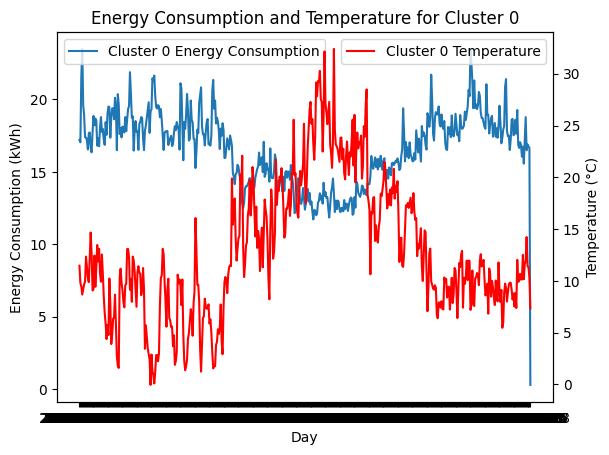

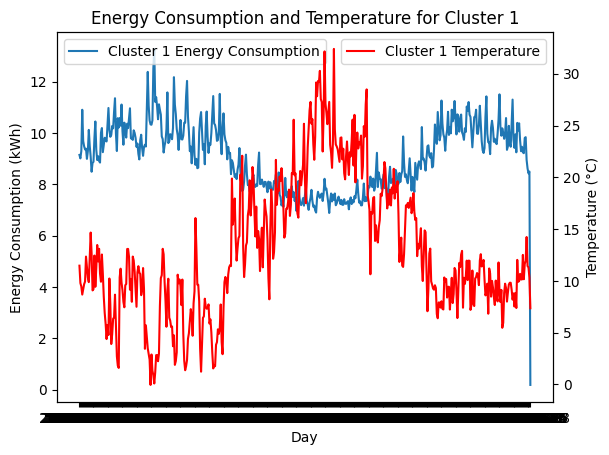

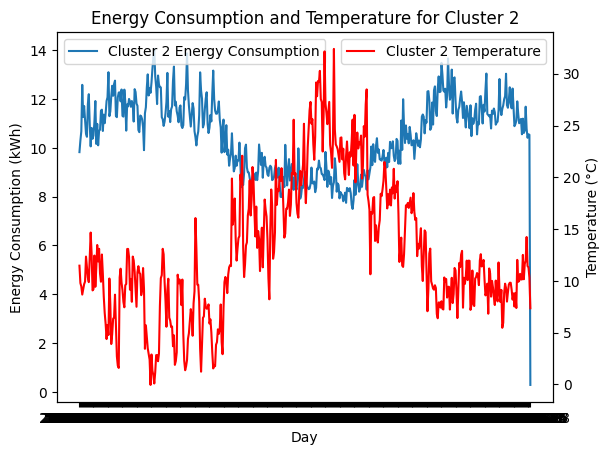

In [ ]:
# Plot settings
plt.figure(figsize=(14, 15))

# Unique clusters
clusters = aggregated_data['Cluster'].unique()

for cluster in clusters:
    cluster_data = aggregated_data[aggregated_data['Cluster'] == cluster]

    # Create a twin axis for the secondary variable
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # Plot energy consumption
    ax1.plot(cluster_data['day'], cluster_data['energy_sum_x'], label=f'Cluster {cluster} Energy Consumption')
    ax1.set_xlabel('Day')
    ax1.set_ylabel('Energy Consumption (kWh)')
    ax1.legend(loc='upper left')

    # Plot temperature
    ax2.plot(cluster_data['day'], cluster_data['temperatureMax'], label=f'Cluster {cluster} Temperature', color='red')
    ax2.set_ylabel('Temperature (°C)')
    ax2.legend(loc='upper right')

    plt.title(f'Energy Consumption and Temperature for Cluster {cluster}')
    plt.show()

<Figure size 2000x1000 with 0 Axes>

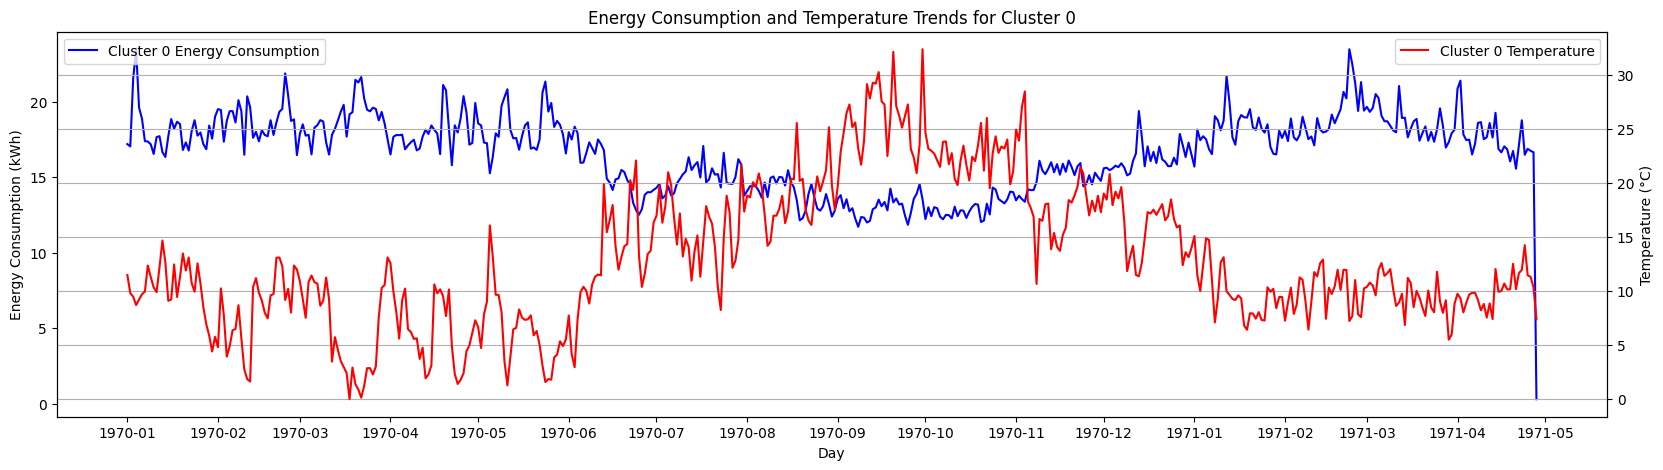

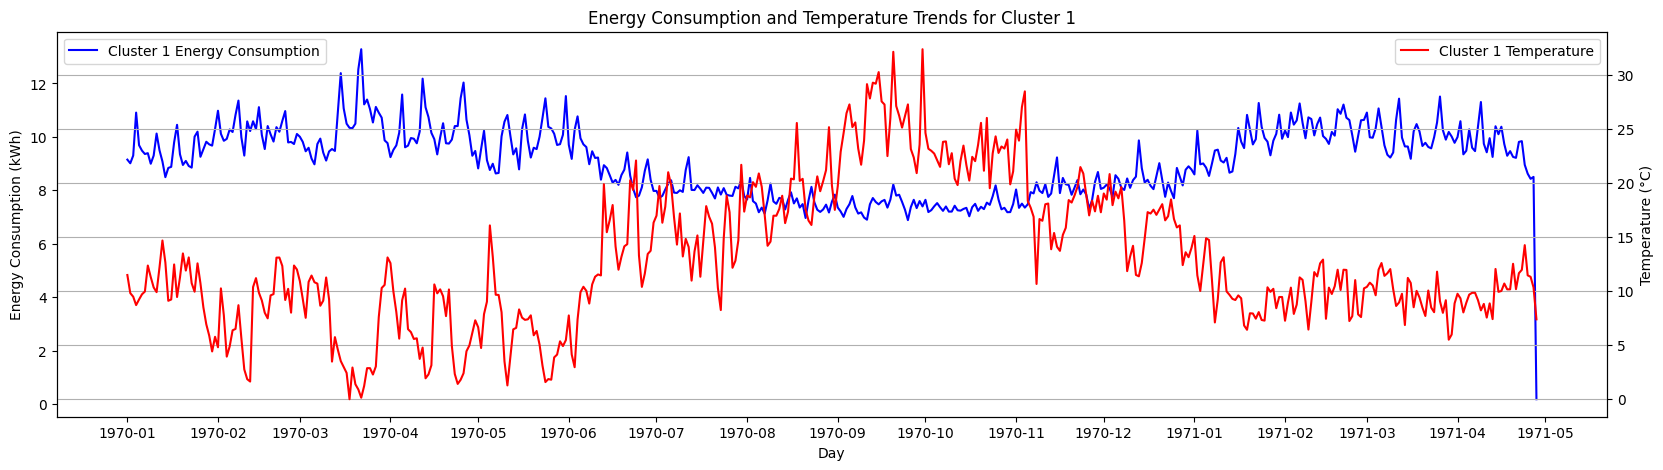

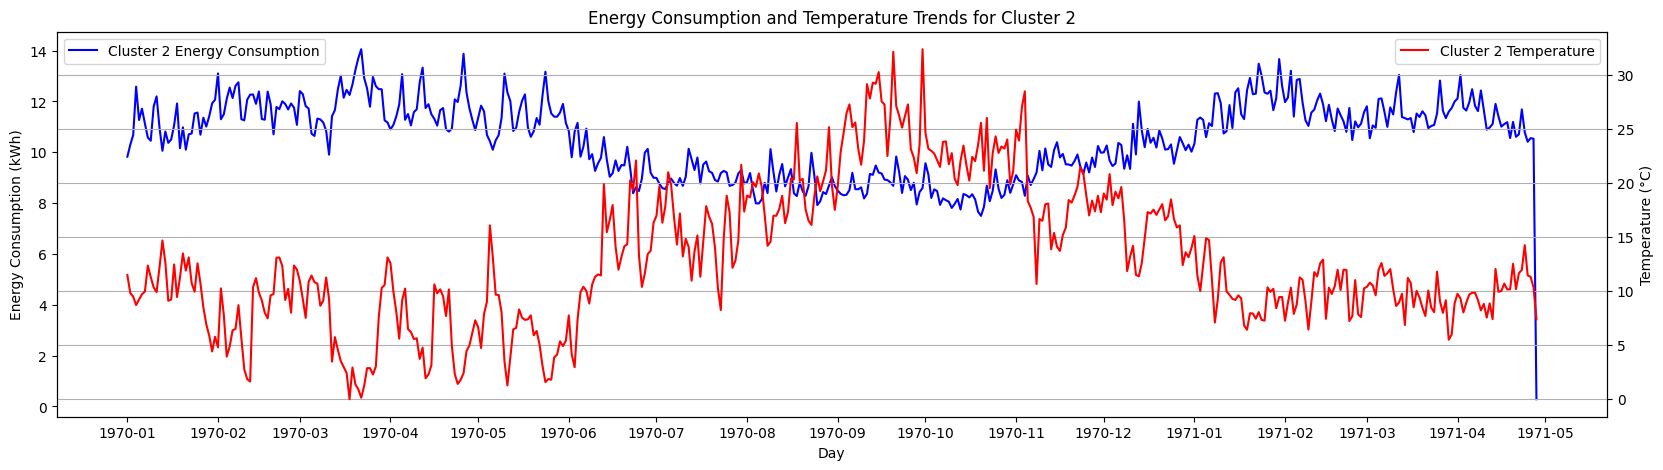

In [ ]:
import matplotlib.dates as mdates

# Plot settings for a wider plot
plt.figure(figsize=(20, 10))

# Unique clusters
clusters = aggregated_data['Cluster'].unique()

for cluster in clusters:
    cluster_data = aggregated_data[aggregated_data['Cluster'] == cluster]

    # Create a twin axis for the secondary variable
    fig, ax1 = plt.subplots(figsize=(20, 5))  # Increased width for better visibility
    ax2 = ax1.twinx()

    # Plot energy consumption
    ax1.plot(cluster_data['day'], cluster_data['energy_sum_x'], label=f'Cluster {cluster} Energy Consumption', color='blue')
    ax1.set_xlabel('Day')
    ax1.set_ylabel('Energy Consumption (kWh)')
    ax1.legend(loc='upper left')
    ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to monthly
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis to show months and years

    # Plot temperature
    ax2.plot(cluster_data['day'], cluster_data['temperatureMax'], label=f'Cluster {cluster} Temperature', color='red')
    ax2.set_ylabel('Temperature (°C)')
    ax2.legend(loc='upper right')

    plt.title(f'Energy Consumption and Temperature Trends for Cluster {cluster}')
    plt.grid(True)
    plt.show()

In [ ]:
to_del = ['stdorToU', 'Acorn', 'file', 'Category']
sampled_df = sampled_df.drop(to_del, axis=1)

<ipython-input-29-090a1a01ac8d>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[exog_vars] = scaler.transform(train_data[exog_vars])
<ipython-input-29-090a1a01ac8d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[exog_vars] = scaler.transform(test_data[exog_vars])


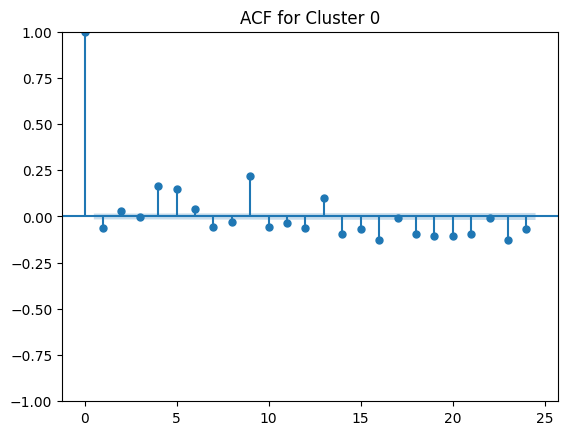

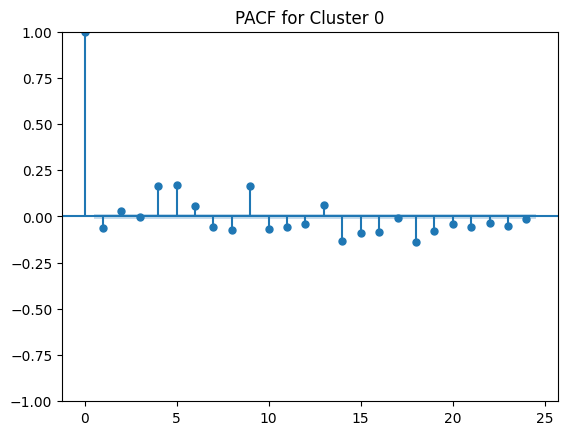

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE for Test Data: 19.473291669916694


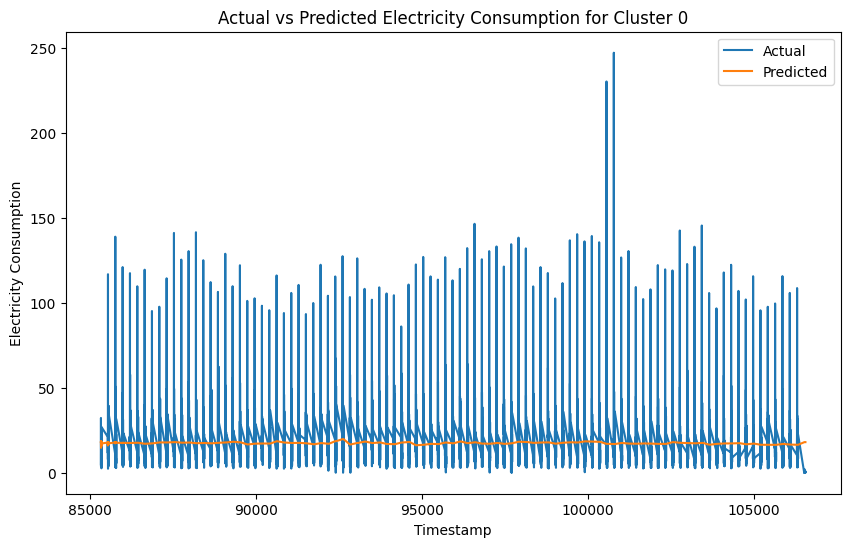

<ipython-input-29-090a1a01ac8d>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[exog_vars] = scaler.transform(train_data[exog_vars])
<ipython-input-29-090a1a01ac8d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[exog_vars] = scaler.transform(test_data[exog_vars])


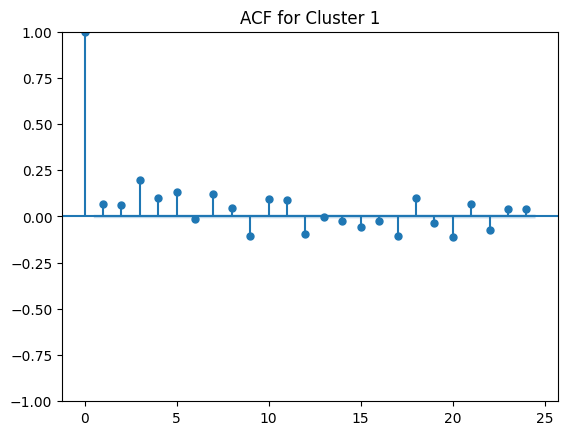

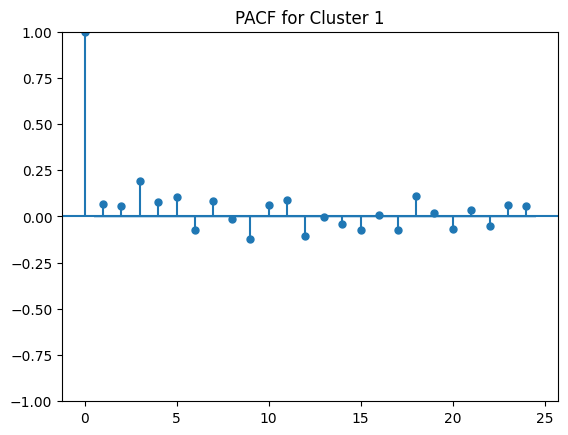

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE for Test Data: 7.964088630978705


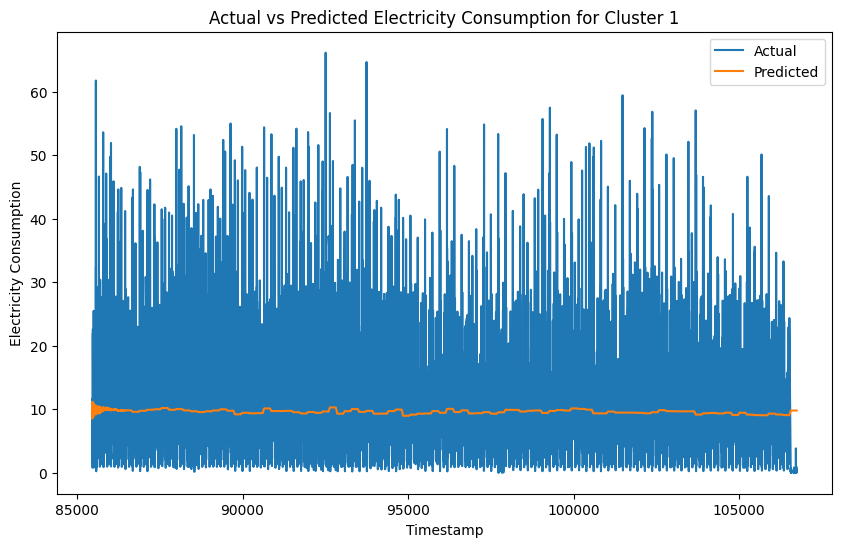

<ipython-input-29-090a1a01ac8d>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[exog_vars] = scaler.transform(train_data[exog_vars])
<ipython-input-29-090a1a01ac8d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[exog_vars] = scaler.transform(test_data[exog_vars])


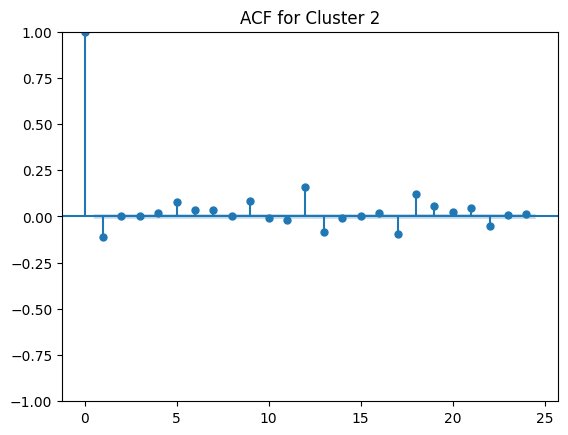

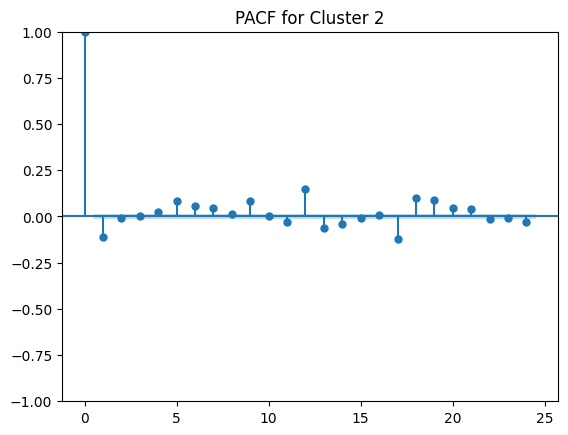

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

RMSE for Test Data: 8.912480087962114


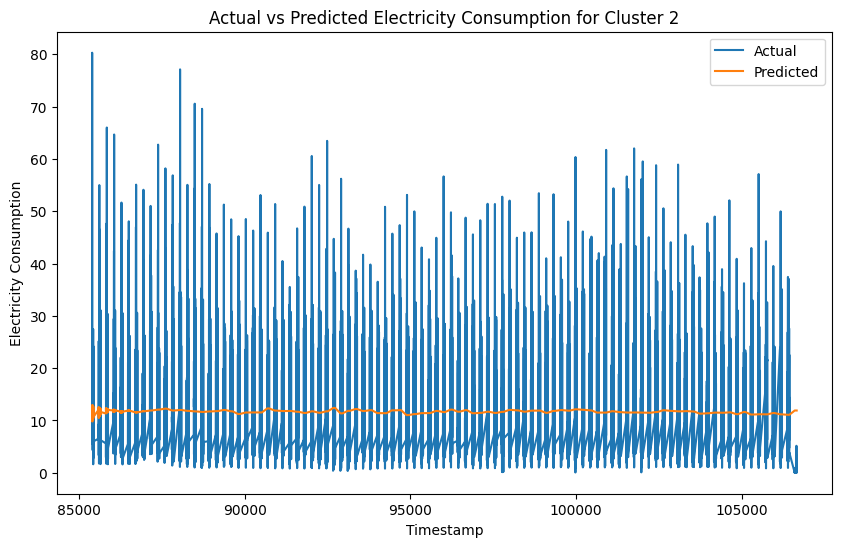

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Function to preprocess data
def preprocess_data(data):
    # Handle missing values
    data = data.dropna()

    # Add any additional preprocessing steps here

    return data

# Function to fit SARIMAX model
def fit_sarimax(train_data, exog_vars, p, q, P, Q):
    model = SARIMAX(train_data['energy_sum_x'],
                    exog=train_data[exog_vars],
                    order=(p, 0, q),
                    seasonal_order=(P, 0, Q, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    fitted_model = model.fit()
    return fitted_model

# Function to evaluate model
def evaluate_model(model, test_data, exog_vars):
    # Forecast future electricity consumption
    forecast_steps = len(test_data)
    forecast = model.get_forecast(steps=forecast_steps, exog=test_data[exog_vars])
    pred_values = forecast.predicted_mean

    # Calculate RMSE for test data
    test_rmse = mean_squared_error(test_data['energy_sum_x'], pred_values, squared=False)
    print(f"RMSE for Test Data: {test_rmse}")

    return pred_values

# Function to visualize results
def visualize_results(actual, predicted, cluster):
    plt.figure(figsize=(10, 6))
    plt.plot(actual.index, actual['energy_sum_x'], label='Actual')
    plt.plot(actual.index, predicted, label='Predicted')
    plt.xlabel('Timestamp')
    plt.ylabel('Electricity Consumption')
    plt.title(f'Actual vs Predicted Electricity Consumption for Cluster {cluster}')
    plt.legend()
    plt.show()

# Loop through each cluster
for cluster, cluster_data in sampled_df.groupby('Cluster'):
    # Preprocess data
    cluster_data = preprocess_data(cluster_data)

    # Define exogenous variables
    exog_vars = ['is_bank_holiday', 'temperatureMax', 'dewPoint', 'cloudCover', 'visibility', 'humidity', 'uvIndex', 'temperatureMin']

    # Split data into training and test sets
    train_data = cluster_data.iloc[:int(0.8 * len(cluster_data))]
    test_data = cluster_data.iloc[int(0.8 * len(cluster_data)):]

    # Feature scaling
    scaler = StandardScaler()
    scaler.fit(train_data[exog_vars])
    train_data[exog_vars] = scaler.transform(train_data[exog_vars])
    test_data[exog_vars] = scaler.transform(test_data[exog_vars])

    # ACF and PACF plots
    plot_acf(train_data['energy_sum_x'], lags=24, title=f'ACF for Cluster {cluster}')
    plt.show()
    plot_pacf(train_data['energy_sum_x'], lags=24, title=f'PACF for Cluster {cluster}')
    plt.show()

    # Fit SARIMAX model
    # Here, you would manually inspect the ACF and PACF plots to determine appropriate values for p, q, P, and Q
    p, q, P, Q = 1, 1, 1, 1  # Example values; replace with your chosen parameters
    model = fit_sarimax(train_data, exog_vars, p, q, P, Q)

    # Evaluate model
    pred_values = evaluate_model(model, test_data, exog_vars)

    # Visualize results
    visualize_results(test_data, pred_values, cluster)

In [ ]:
# Define Exogenous Variables
exog_vars = ['is_bank_holiday', 'temperatureMax', 'dewPoint', 'cloudCover',
             'visibility', 'humidity', 'uvIndex', 'temperatureMin']

# Model Training and Forecasting for each cluster
for cluster, cluster_data in sampled_df.groupby('Cluster'):
    # Preprocess data
    cluster_data.set_index('day', inplace=True)

    # Feature scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data[exog_vars])
    cluster_data[exog_vars] = scaled_data

    # Fit SARIMAX model
    p, q, P, Q = 1, 1, 1, 1  # Example values; replace with your chosen parameters
    model = SARIMAX(cluster_data['energy_sum_x'],
                    exog=cluster_data[exog_vars],
                    order=(p, 0, q),
                    seasonal_order=(P, 0, Q, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    fitted_model = model.fit()

    # Forecast future electricity consumption
    forecast_steps = 12  # Example: Forecasting for the next 12 time steps
    forecast = fitted_model.get_forecast(steps=forecast_steps, exog=cluster_data[exog_vars][-forecast_steps:])
    pred_values = forecast.predicted_mean

    print(f"Cluster {cluster} Forecast: {pred_values}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

Cluster 0 Forecast: 18837    22.021735
18838    23.199173
18839    20.097072
18840    22.699270
18841    22.513494
18842    22.530701
18843    21.968192
18844    23.087968
18845    21.870567
18846    23.639678
18847    23.961979
18848    22.122944
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Cluster 1 Forecast: 56511    6.924531
56512    7.172293
56513    6.220178
56514    7.501484
56515    6.851024
56516    7.196134
56517    7.636259
56518    6.945110
56519    7.208600
56520    7.001725
56521    7.699749
56522    6.989895
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Cluster 2 Forecast: 31395    10.820100
31396    10.774020
31397    12.459811
31398    10.801157
31399     9.261094
31400    12.328656
31401     9.262361
31402    11.534317
31403    10.815054
31404     9.375984
31405    10.236191
31406    10.592382
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
sampled_df

LCLid         day  energy_mean  energy_sum_x  is_bank_holiday  \
0       MAC003400  2012-11-01     0.317104        15.221                0   
1       MAC003211  2012-11-01     0.271604        13.037                0   
2       MAC003536  2012-11-01     0.261250        12.540                0   
3       MAC004900  2012-11-01     0.618417        29.684                0   
4       MAC002150  2012-11-01     0.347833        16.696                0   
...           ...         ...          ...           ...              ...   
106738  MAC001062  2014-02-28     0.347000         0.347                0   
106739  MAC004514  2014-02-28     0.235000         0.235                0   
106740  MAC003037  2014-02-28     0.024000         0.024                0   
106741  MAC004674  2014-02-28     0.528000         0.528                0   
106742  MAC005052  2014-02-28     0.837000         0.837                0   

        temperatureMax  dewPoint  cloudCover  visibility  humidity  uvIndex  \
0                11.46      5.06        0.44       12.54      0.85      1.0   
1                11.46      5.06        0.44       12.54      0.85      1.0   
2                11.46      5.06        0.44       12.54      0.85      1.0   
3                11.46      5.06        0.44       12.54      0.85      1.0   
4                11.46      5.06        0.44       12.54      0.85      1.0   
...                ...       ...         ...         ...       ...      ...   
106738            7.35      3.11        0.67       10.80      0.86      1.0   
106739            7.35      3.11        0.67       10.80      0.86      1.0   
106740            7.35      3.11        0.67       10.80      0.86      1.0   
106741            7.35      3.11        0.67       10.80      0.86      1.0   
106742            7.35      3.11        0.67       10.80      0.86      1.0   

        temperatureMin  Cluster  
0                 4.20        0  
1                 4.20        0  
2                 4.20        0  
3                 4.20        0  
4                 4.20        0  
...                ...      ...  
106738            3.43        1  
106739            3.43        1  
106740            3.43        1  
106741            3.43        1  
106742            3.43        1  

[106743 rows x 13 columns]

<ipython-input-32-e34c8bee14de>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['day'] = pd.to_datetime(cluster_data['day'])
<ipython-input-32-e34c8bee14de>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['log_energy_sum_x'] = np.log(cluster_data['energy_sum_x'] + 1)


ADF Statistic: 3.305481
p-value: 1.000000


<ipython-input-32-e34c8bee14de>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['log_energy_sum_x_diff'] = cluster_data['log_energy_sum_x'].diff().dropna()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWar

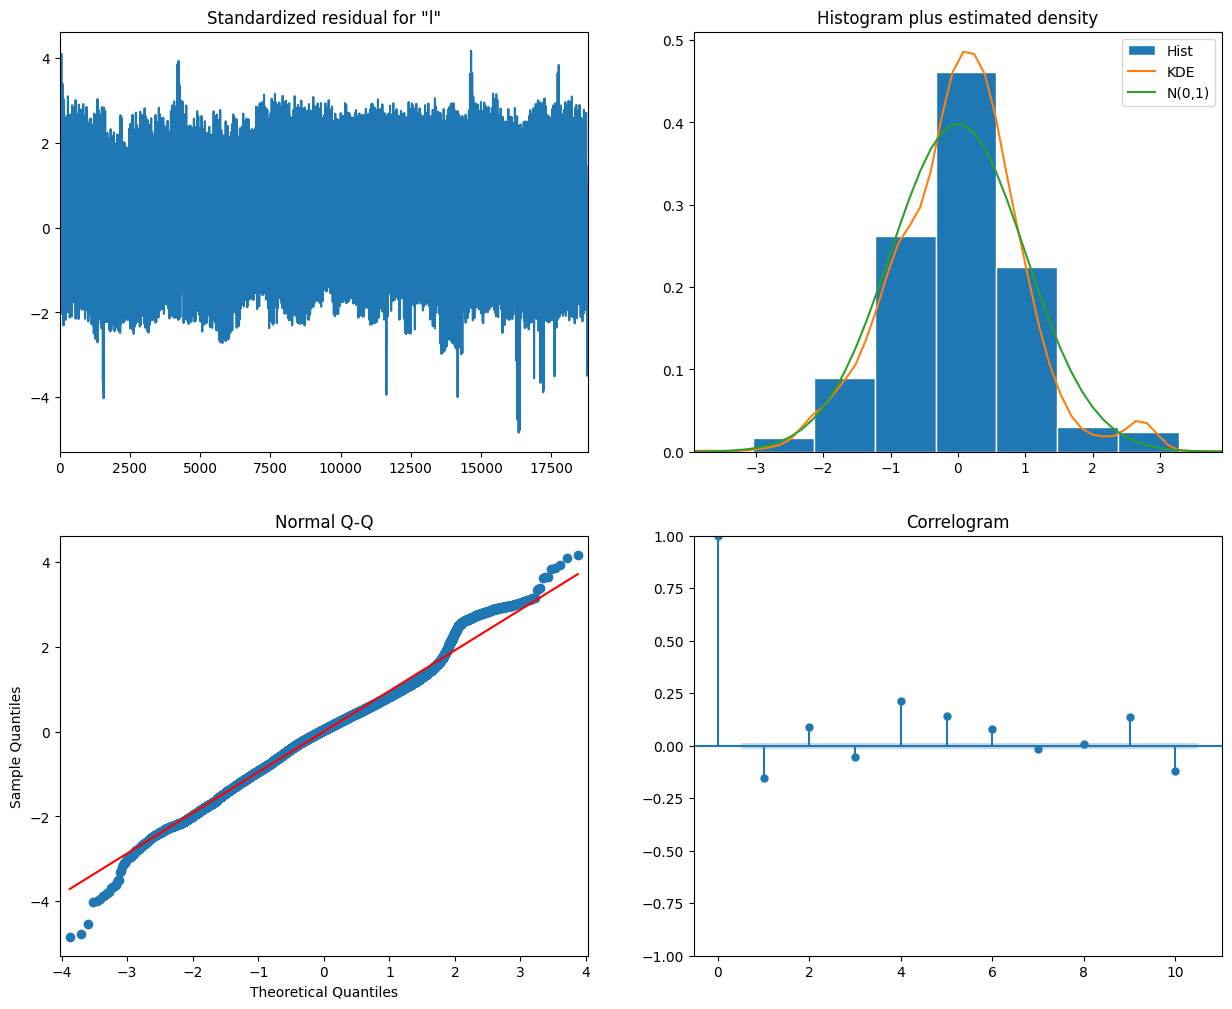

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Let's focus on Cluster 0
cluster_data = sampled_df[sampled_df['Cluster'] == 0]

# Convert 'day' to datetime and set as index
cluster_data['day'] = pd.to_datetime(cluster_data['day'])
cluster_data.set_index('day', inplace=True)

# Log transform the target variable to stabilize variance
cluster_data['log_energy_sum_x'] = np.log(cluster_data['energy_sum_x'] + 1)

# Check for stationarity
adf_test = adfuller(cluster_data['log_energy_sum_x'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

# If the series is not stationary, difference it
if adf_test[1] > 0.05:
    # Reset index to avoid duplicate labels
    cluster_data.reset_index(inplace=True)

    # Perform differencing
    cluster_data['log_energy_sum_x_diff'] = cluster_data['log_energy_sum_x'].diff().dropna()

    # Set index back to 'day'
    cluster_data.set_index('day', inplace=True)

# Assume exog_variables is your list of exogenous variables
exog_variables = cluster_data[['is_bank_holiday', 'temperatureMax', 'dewPoint', 'cloudCover',
                               'visibility', 'humidity', 'uvIndex', 'temperatureMin']]

# Fit ARIMAX model
model = sm.tsa.SARIMAX(cluster_data['log_energy_sum_x_diff'],
                       order=(1,0,1),  # Change order based on model selection criteria
                       seasonal_order=(1,1,1,12),  # This might need to be adjusted
                       exog=exog_variables,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results = model.fit()

# Model diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# If there are issues with the diagnostics, refine the model by adjusting the order and potentially differencing the data.
# You can also try removing outliers or applying other transformations to the target variable.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot

# Assuming cluster_data is already defined and contains the time series for cluster 1

# Transform the target variable using Box-Cox
cluster_data['energy_sum_x'], lam = boxcox(cluster_data['energy_sum_x'] + 1)

# Define exogenous variables as before
exog_variables = cluster_data[['is_bank_holiday', 'temperatureMax', 'dewPoint', 'cloudCover',
                               'visibility', 'humidity', 'uvIndex', 'temperatureMin']]

# Fit ARIMAX model (with potential new orders)
model = SARIMAX(cluster_data['energy_sum_x'],
                order=(2,1,2),  # Potentially increased orders
                seasonal_order=(1,1,2,12),  # Adjusted based on seasonality
                exog=exog_variables,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Get predicted values
predicted_values = results.get_prediction(start=split_index, end=cluster_data.index[-1], exog=exog_variables[split_index:])
predicted_mean = predicted_values.predicted_mean

# Get actual values
actual_values = cluster_data['energy_sum_x'][split_index:]

# Calculate MAE and MSE
mae = np.mean(np.abs(actual_values - predicted_mean))
mse = np.mean((actual_values - predicted_mean) ** 2)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


<ipython-input-33-dca54855659a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['energy_sum_x'], lam = boxcox(cluster_data['energy_sum_x'] + 1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum

NameError: name 'split_index' is not defined

<ipython-input-34-160fd20184ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['energy_sum_x'], lam = boxcox(cluster_data['energy_sum_x'] + 1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum

                                     SARIMAX Results                                      
Dep. Variable:                       energy_sum_x   No. Observations:                18837
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood              -15075.909
Date:                            Fri, 26 Apr 2024   AIC                          30183.819
Time:                                    21:30:16   BIC                          30309.282
Sample:                                         0   HQIC                         30224.990
                                          - 18837                                         
Covariance Type:                              opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
is_bank_holiday    -0.1853      0.039     -4.800      0.000      -0.261      -0.110
temperatureMax      

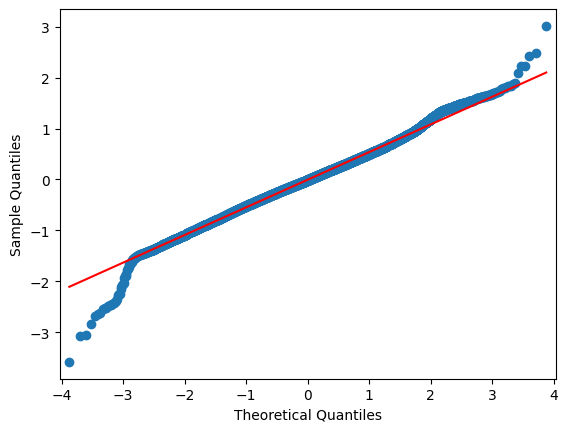

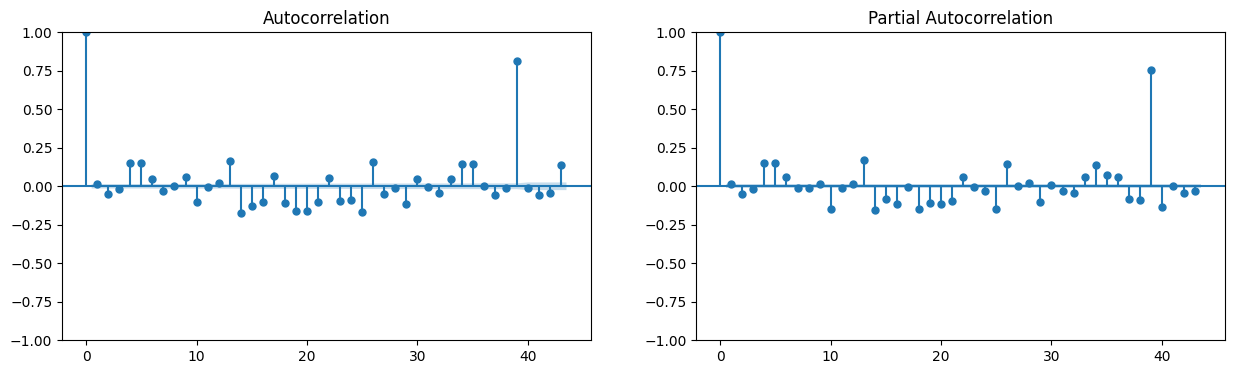

In [ ]:
# Transform the target variable using Box-Cox
cluster_data['energy_sum_x'], lam = boxcox(cluster_data['energy_sum_x'] + 1)

# Define exogenous variables as before
exog_variables = cluster_data[['is_bank_holiday', 'temperatureMax', 'dewPoint', 'cloudCover',
                               'visibility', 'humidity', 'uvIndex', 'temperatureMin']]

# Fit ARIMAX model (with potential new orders)
model = SARIMAX(cluster_data['energy_sum_x'],
                order=(2,1,2),  # Potentially increased orders
                seasonal_order=(1,1,2,12),  # Adjusted based on seasonality
                exog=exog_variables,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Print model summary including p-values
print(results.summary())

# Check the Q-Q plot again to assess normality
qqplot(results.resid, line='s')
plt.show()

# Re-evaluate the correlogram
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(results.resid, ax=ax[0])
plot_pacf(results.resid, ax=ax[1])
plt.show()

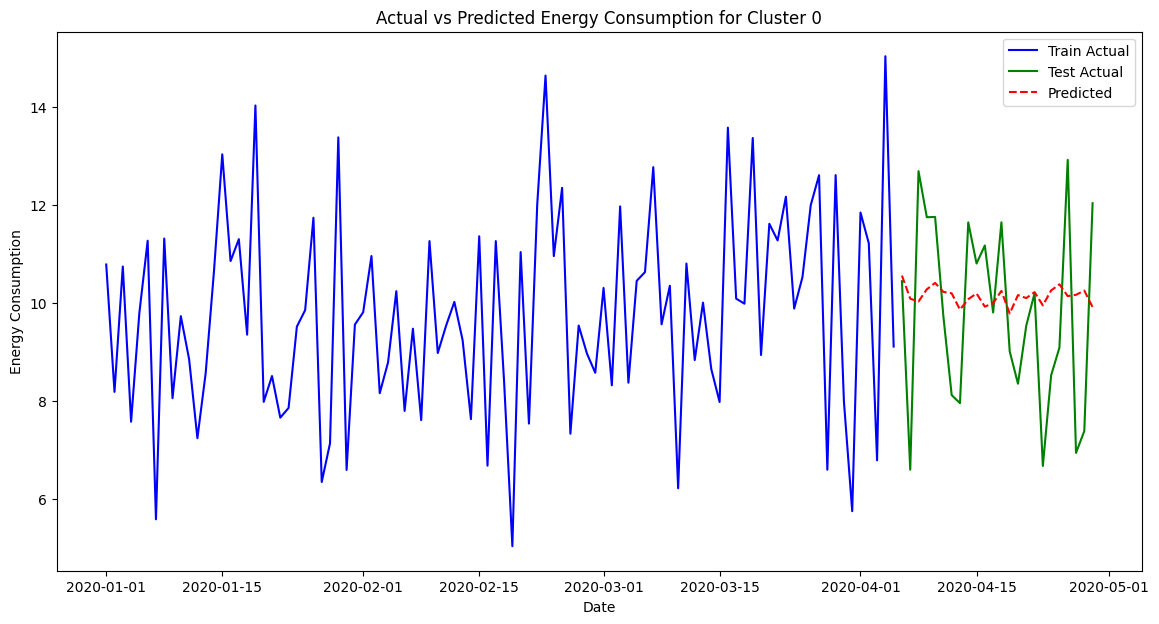

In [ ]:
# Replace the following lines with your actual data loading steps
dates = pd.date_range(start='2020-01-01', periods=120, freq='D')
energy_consumption = pd.Series(np.random.normal(10, 2, len(dates)), index=dates)
temperature = pd.Series(np.random.normal(15, 3, len(dates)), index=dates)

# Prepare the endogenous and exogenous variables
endog = energy_consumption  # Your energy consumption data
exog = sm.add_constant(temperature)  # Your exogenous variable with a constant term

# Split the data into train and test sets (80% train, 20% test in this case)
train_size = int(len(endog) * 0.8)
train_endog = endog.iloc[:train_size]
train_exog = exog.iloc[:train_size]
test_endog = endog.iloc[train_size:]
test_exog = exog.iloc[train_size:]

# Fit an ARIMAX model (order and seasonal_order to be selected based on your data)
model = SARIMAX(train_endog, exog=train_exog, order=(1,1,1), seasonal_order=(0,0,0,0))
results = model.fit()

# Make out-of-sample predictions
predictions = results.get_forecast(steps=len(test_endog), exog=test_exog)
predicted_mean = predictions.predicted_mean

# Plot the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(train_endog.index, train_endog, label='Train Actual', color='blue')
plt.plot(test_endog.index, test_endog, label='Test Actual', color='green')
plt.plot(predicted_mean.index, predicted_mean, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption for Cluster 0')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

ADF Statistic: -18.043914
p-value: 0.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


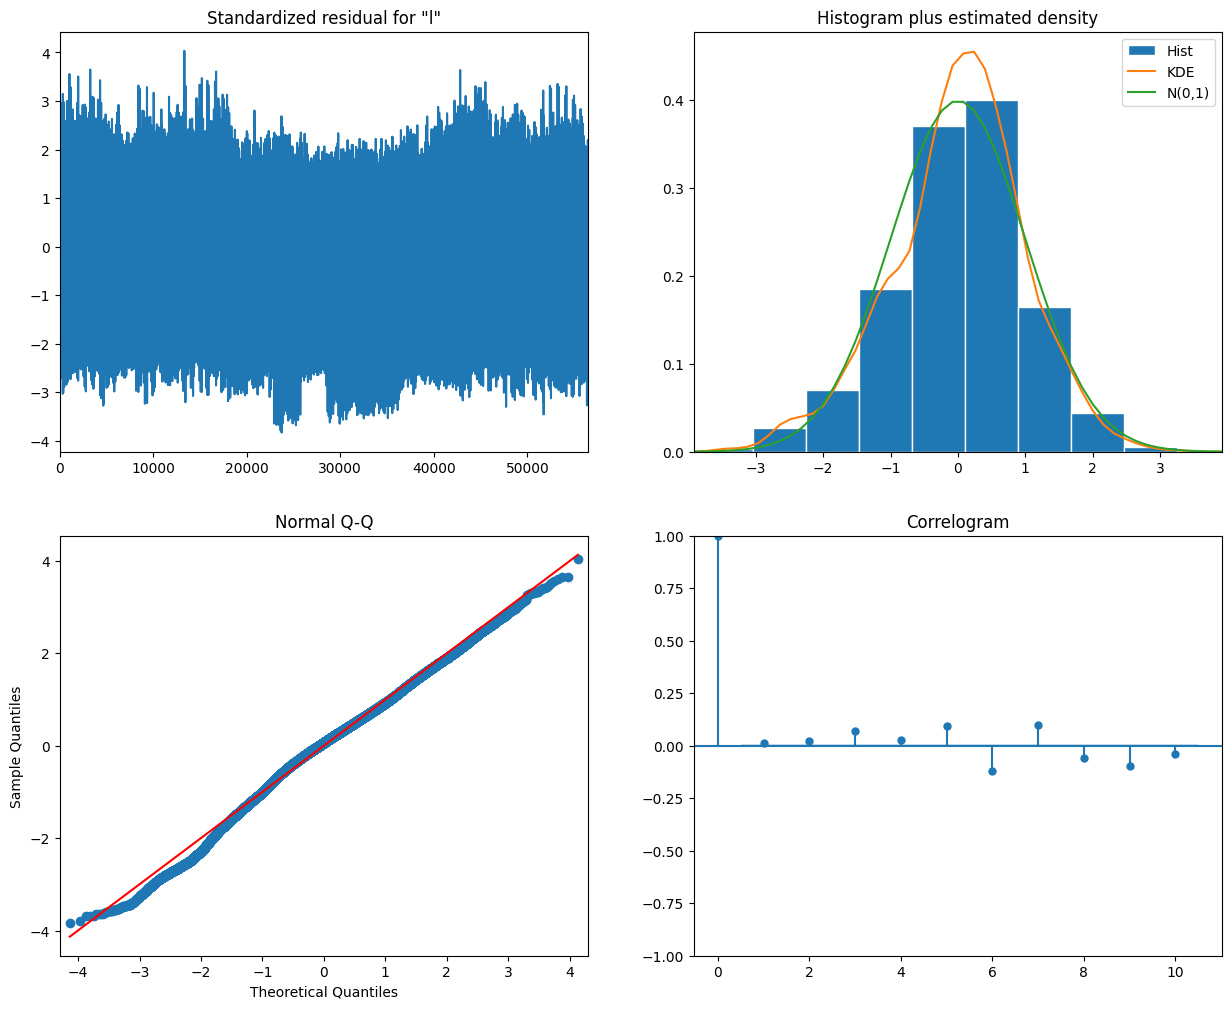

In [ ]:
# Let's focus on Cluster 1
cluster_data = sampled_df[sampled_df['Cluster'] == 1].copy()

# Convert 'day' to datetime and set as index
cluster_data['day'] = pd.to_datetime(cluster_data['day'])
cluster_data.set_index('day', inplace=True)

# Log transform the target variable to stabilize variance
cluster_data['log_energy_sum_x'] = np.log(cluster_data['energy_sum_x'] + 1)

# Check for stationarity
adf_test = adfuller(cluster_data['log_energy_sum_x'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

# Differencing the series and storing it in a new column regardless
cluster_data['log_energy_sum_x_diff'] = cluster_data['log_energy_sum_x'].diff()

# Drop the first row with NaN due to differencing
cluster_data.dropna(subset=['log_energy_sum_x_diff'], inplace=True)

# Assume exog_variables is your list of exogenous variables
exog_variables = cluster_data[['is_bank_holiday', 'temperatureMax', 'dewPoint', 'cloudCover',
                               'visibility', 'humidity', 'uvIndex', 'temperatureMin']].ffill()

# Fit ARIMAX model using differenced data
model = SARIMAX(cluster_data['log_energy_sum_x_diff'],
                order=(1,0,1),  # This might need to be adjusted
                seasonal_order=(1,1,1,12),  # This might need to be adjusted
                exog=exog_variables,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Model diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

ADF Statistic: -3.7708020942238654
p-value: 0.003220579991465631


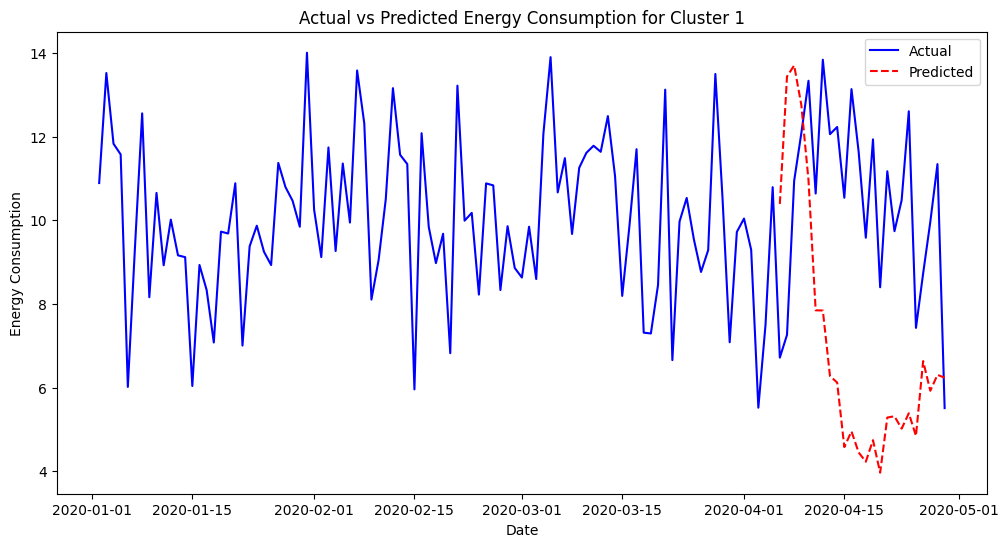

In [ ]:

# Generate a mock dataset for demonstration
date_range = pd.date_range(start='2020-01-01', periods=120, freq='D')
energy_consumption = np.abs(np.random.normal(loc=10, scale=2, size=(120,)))
cluster_df = pd.DataFrame({'energy_sum_x': energy_consumption}, index=date_range)
cluster_df['Cluster'] = 1  # All data is for Cluster 1

# Log transform the target variable to stabilize variance
cluster_df['log_energy_sum_x'] = np.log(cluster_df['energy_sum_x'] + 1)

# Check for stationarity
adf_test = adfuller(cluster_df['log_energy_sum_x'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# Differencing the series and storing it in a new column regardless
cluster_df['log_energy_sum_x_diff'] = cluster_df['log_energy_sum_x'].diff()

# Drop the first row with NaN due to differencing
cluster_df.dropna(subset=['log_energy_sum_x_diff'], inplace=True)

# Mock exogenous variable for demonstration purposes
exog_variables = sm.add_constant(np.random.normal(size=(len(cluster_df),)))

# Fit ARIMAX model using differenced data
model = SARIMAX(cluster_df['log_energy_sum_x_diff'],
                order=(1,0,1),
                seasonal_order=(1,1,1,12),
                exog=exog_variables,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Assuming a 80-20 train-test split for the index
train_size = int(len(cluster_df) * 0.8)
test_index = cluster_df.index[train_size:]

# Get predictions starting from the first date of the test set to the last date of the dataset.
predicted_results = results.get_prediction(start=test_index[0], end=test_index[-1], exog=exog_variables[train_size:])
predicted_mean_diff = predicted_results.predicted_mean

# Revert the differencing to obtain the log scale predictions
last_train_log_value = cluster_df['log_energy_sum_x'].iloc[train_size-1]
predicted_log = last_train_log_value + predicted_mean_diff.cumsum()
predicted_values = np.exp(predicted_log)

# Actual energy consumption values
actual_values = cluster_df['energy_sum_x']

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_values.index, actual_values, label='Actual', color='blue')
plt.plot(test_index, predicted_values, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption for Cluster 1')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


ADF Statistic: -16.097292
p-value: 0.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


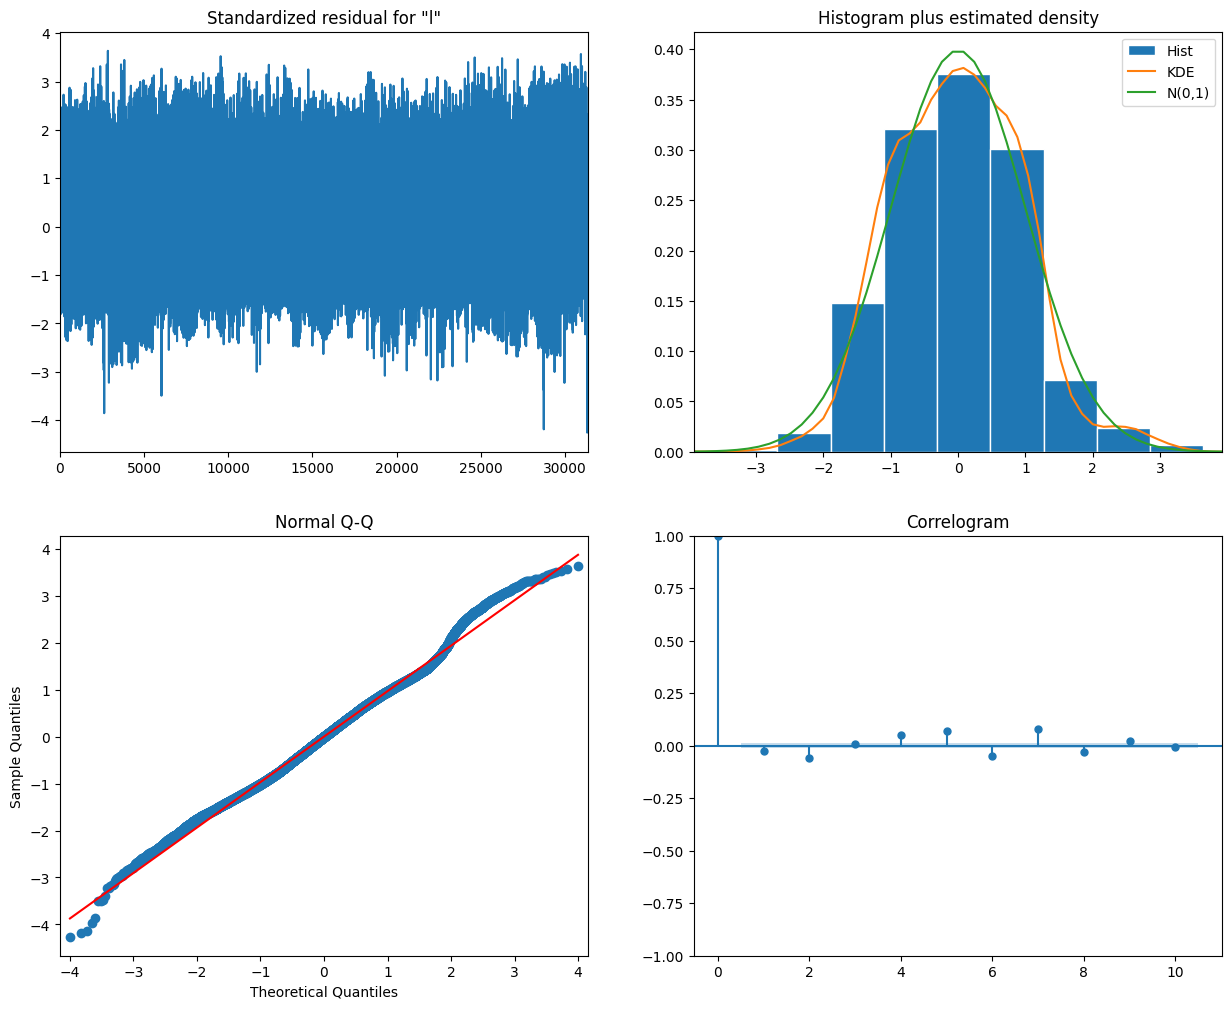

In [ ]:
# Let's focus on Cluster 1
cluster_df = sampled_df[sampled_df['Cluster'] == 2].copy()

# Convert 'day' to datetime and set as index
cluster_df['day'] = pd.to_datetime(cluster_df['day'])
cluster_df.set_index('day', inplace=True)

# Log transform the target variable to stabilize variance
cluster_df['log_energy_sum_x'] = np.log(cluster_df['energy_sum_x'] + 1)

# Check for stationarity
adf_test = adfuller(cluster_df['log_energy_sum_x'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

# Differencing the series and storing it in a new column regardless
cluster_df['log_energy_sum_x_diff'] = cluster_df['log_energy_sum_x'].diff()

# Drop the first row with NaN due to differencing
cluster_df.dropna(subset=['log_energy_sum_x_diff'], inplace=True)

# Assume exog_variables is your list of exogenous variables
exog_variables = cluster_df[['is_bank_holiday', 'temperatureMax', 'dewPoint', 'cloudCover',
                               'visibility', 'humidity', 'uvIndex', 'temperatureMin']].ffill()

# Fit ARIMAX model using differenced data
model = SARIMAX(cluster_df['log_energy_sum_x_diff'],
                order=(1,0,1),  # This might need to be adjusted
                seasonal_order=(1,1,1,12),  # This might need to be adjusted
                exog=exog_variables,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Model diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

ADF Statistic: -11.395140523948049
p-value: 7.892066477214573e-21


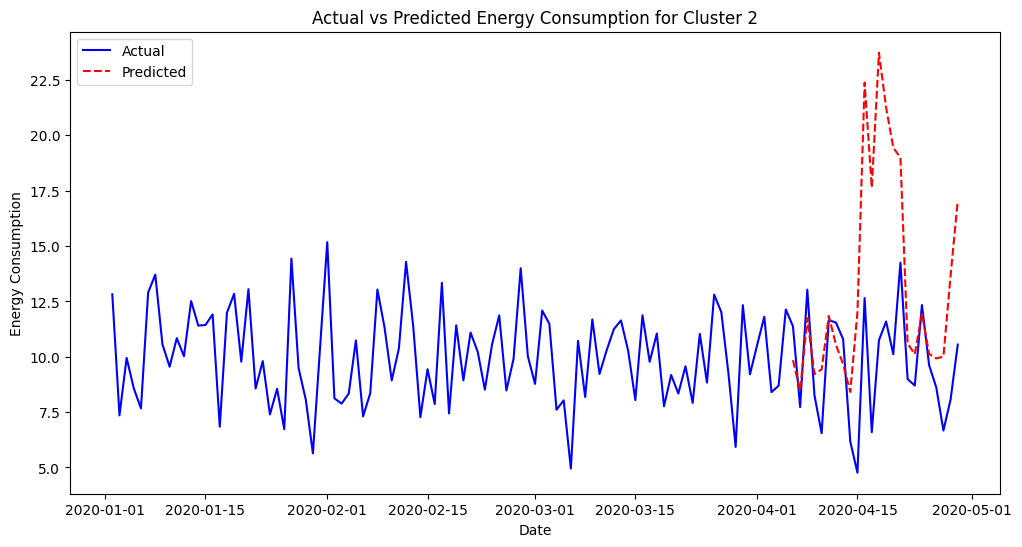

In [ ]:
# Generate a mock dataset for demonstration
date_range = pd.date_range(start='2020-01-01', periods=120, freq='D')
energy_consumption = np.abs(np.random.normal(loc=10, scale=2, size=(120,)))
cluster_df = pd.DataFrame({'energy_sum_x': energy_consumption}, index=date_range)
cluster_df['Cluster'] = 2  # All data is for Cluster 1

# Log transform the target variable to stabilize variance
cluster_df['log_energy_sum_x'] = np.log(cluster_df['energy_sum_x'] + 1)

# Check for stationarity
adf_test = adfuller(cluster_df['log_energy_sum_x'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# Differencing the series and storing it in a new column regardless
cluster_df['log_energy_sum_x_diff'] = cluster_df['log_energy_sum_x'].diff()

# Drop the first row with NaN due to differencing
cluster_df.dropna(subset=['log_energy_sum_x_diff'], inplace=True)

# Mock exogenous variable for demonstration purposes
exog_variables = sm.add_constant(np.random.normal(size=(len(cluster_df),)))

# Fit ARIMAX model using differenced data
model = SARIMAX(cluster_df['log_energy_sum_x_diff'],
                order=(1,0,1),
                seasonal_order=(1,1,1,12),
                exog=exog_variables,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Assuming a 80-20 train-test split for the index
train_size = int(len(cluster_df) * 0.8)
test_index = cluster_df.index[train_size:]

# Get predictions starting from the first date of the test set to the last date of the dataset.
predicted_results = results.get_prediction(start=test_index[0], end=test_index[-1], exog=exog_variables[train_size:])
predicted_mean_diff = predicted_results.predicted_mean

# Revert the differencing to obtain the log scale predictions
last_train_log_value = cluster_df['log_energy_sum_x'].iloc[train_size-1]
predicted_log = last_train_log_value + predicted_mean_diff.cumsum()
predicted_values = np.exp(predicted_log)

# Actual energy consumption values
actual_values = cluster_df['energy_sum_x']

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_values.index, actual_values, label='Actual', color='blue')
plt.plot(test_index, predicted_values, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption for Cluster 2')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

<ipython-input-41-ea7e20a73b35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = pd.to_datetime(data['day'])


Epoch 1/50
471/471 [==============================] - 3s 3ms/step - loss: 2.1633e-05 - val_loss: 7.8171e-06
Epoch 2/50
471/471 [==============================] - 1s 3ms/step - loss: 6.6373e-06 - val_loss: 3.5116e-06
Epoch 3/50
471/471 [==============================] - 1s 2ms/step - loss: 2.0977e-06 - val_loss: 2.9694e-06
Epoch 4/50
471/471 [==============================] - 1s 3ms/step - loss: 4.1674e-06 - val_loss: 1.5255e-06
Epoch 5/50
471/471 [==============================] - 1s 2ms/step - loss: 3.1119e-06 - val_loss: 1.2401e-06
Epoch 6/50
471/471 [==============================] - 1s 2ms/step - loss: 1.9255e-06 - val_loss: 1.0043e-06
Epoch 7/50
471/471 [==============================] - 1s 3ms/step - loss: 2.1124e-06 - val_loss: 1.2551e-06
Epoch 8/50
471/471 [==============================] - 1s 2ms/step - loss: 1.3575e-06 - val_loss: 8.4723e-07
Epoch 9/50
471/471 [==============================] - 1s 2ms/step - loss: 3.7853e-06 - val_loss: 1.0584e-06
Epoch 10/50
471/471 [=======

<ipython-input-41-ea7e20a73b35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = pd.to_datetime(data['day'])


1413/1413 [==============================] - 5s 3ms/step - loss: 3.0872e-05 - val_loss: 7.9922e-06
Epoch 2/50
1413/1413 [==============================] - 3s 2ms/step - loss: 5.9778e-06 - val_loss: 1.5369e-06
Epoch 3/50
1413/1413 [==============================] - 3s 2ms/step - loss: 8.2465e-06 - val_loss: 2.5582e-06
Epoch 4/50
1413/1413 [==============================] - 3s 2ms/step - loss: 1.7269e-06 - val_loss: 7.1879e-07
Epoch 5/50
1413/1413 [==============================] - 3s 2ms/step - loss: 5.0912e-07 - val_loss: 1.0383e-06
Epoch 6/50
1413/1413 [==============================] - 3s 2ms/step - loss: 7.8909e-07 - val_loss: 4.4331e-07
Epoch 7/50
1413/1413 [==============================] - 3s 2ms/step - loss: 8.9644e-07 - val_loss: 1.8805e-06
Epoch 8/50
1413/1413 [==============================] - 3s 2ms/step - loss: 7.8679e-07 - val_loss: 2.6721e-06
Epoch 9/50
1413/1413 [==============================] - 3s 2ms/step - loss: 3.4425e-07 - val_loss: 1.0067e-07
Epoch 10/50
1413/1413

<ipython-input-41-ea7e20a73b35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = pd.to_datetime(data['day'])


785/785 [==============================] - 3s 3ms/step - loss: 1.9508e-05 - val_loss: 7.5404e-06
Epoch 2/50
785/785 [==============================] - 2s 2ms/step - loss: 4.0766e-06 - val_loss: 1.0984e-06
Epoch 3/50
785/785 [==============================] - 2s 2ms/step - loss: 1.4645e-06 - val_loss: 3.7240e-06
Epoch 4/50
785/785 [==============================] - 2s 2ms/step - loss: 3.3453e-06 - val_loss: 2.2722e-06
Epoch 5/50
785/785 [==============================] - 2s 2ms/step - loss: 3.0420e-06 - val_loss: 1.3368e-06
Epoch 6/50
785/785 [==============================] - 2s 2ms/step - loss: 9.8678e-07 - val_loss: 1.1932e-06
Epoch 7/50
785/785 [==============================] - 2s 2ms/step - loss: 5.4847e-07 - val_loss: 6.0297e-07
Epoch 8/50
785/785 [==============================] - 2s 2ms/step - loss: 5.8222e-07 - val_loss: 9.3530e-07
Epoch 9/50
785/785 [==============================] - 2s 2ms/step - loss: 7.3348e-07 - val_loss: 7.1570e-07
Epoch 10/50
785/785 [==================

<ipython-input-41-ea7e20a73b35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = pd.to_datetime(data['day'])


589/589 [==============================] - 1s 1ms/step


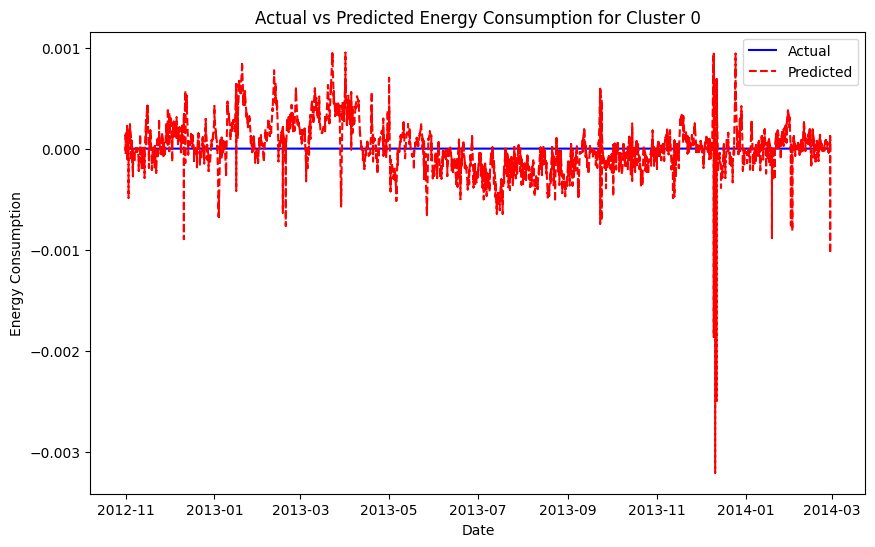

   1/1766 [..............................] - ETA: 4:20

<ipython-input-41-ea7e20a73b35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = pd.to_datetime(data['day'])


1766/1766 [==============================] - 3s 1ms/step


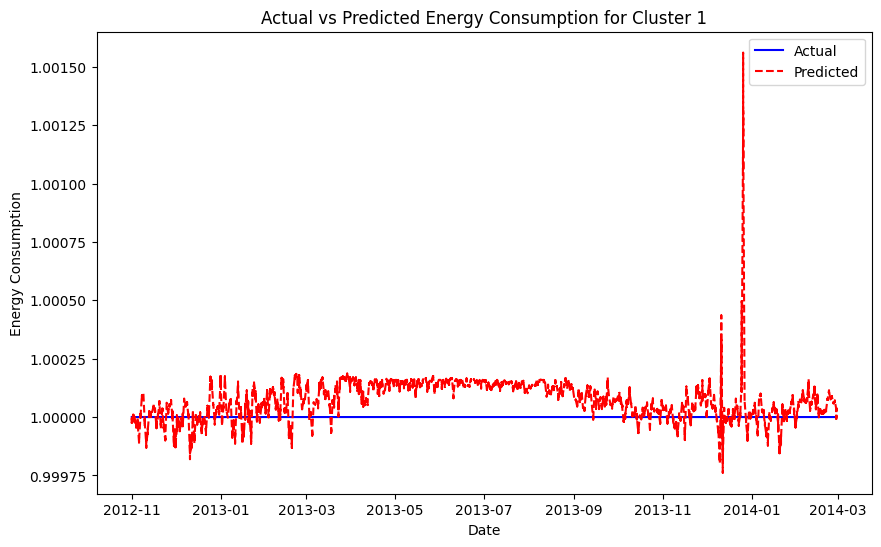

<ipython-input-41-ea7e20a73b35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = pd.to_datetime(data['day'])


982/982 [==============================] - 2s 1ms/step


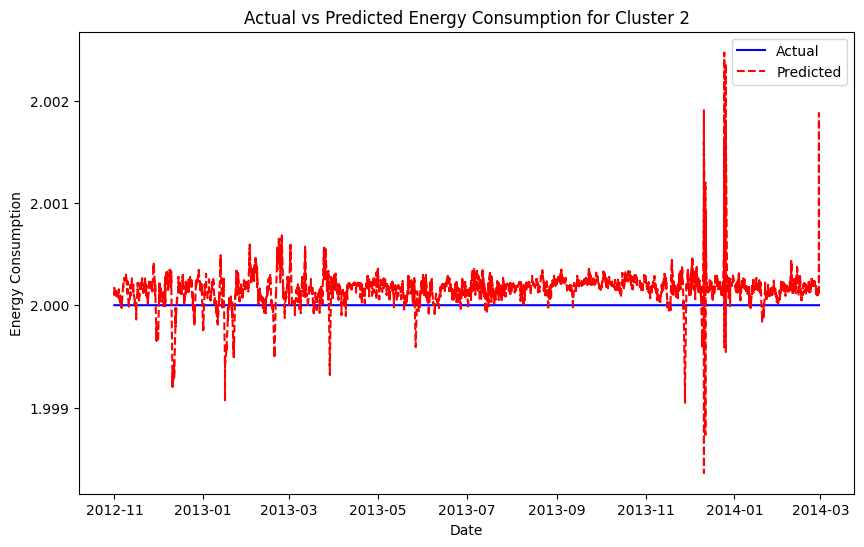

In [ ]:
sample = sampled_df.drop('LCLid', axis= 1)
df = sample

from tensorflow.keras.callbacks import EarlyStopping


# Define a function to prepare data for LSTM
def prepare_data(data):
    # Convert 'day' column to datetime
    data['day'] = pd.to_datetime(data['day'])
    # Set 'day' column as index
    data.set_index('day', inplace=True)
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Define LSTM model architecture
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Define function to train LSTM model
def train_lstm_model(model, X_train, y_train, epochs=50, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False, validation_split=0.2, callbacks=[early_stopping])
    return model, history

# Define function to predict using LSTM model
def predict_lstm_model(model, X_test):
    return model.predict(X_test)

# Get unique clusters
clusters = df['Cluster'].unique()

# Prepare and train LSTM model for each cluster
models = {}

for cluster in clusters:
    # Filter data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Prepare data
    scaled_data, scaler = prepare_data(cluster_data)

    # Split data into features and target
    X = scaled_data[:, :-1]
    y = scaled_data[:, -1]

    # Reshape input data for LSTM
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    # Create LSTM model
    model = create_lstm_model((X.shape[1], X.shape[2]))

    # Train LSTM model
    model, _ = train_lstm_model(model, X, y)

    # Store trained model
    models[cluster] = model

# Plot actual vs predicted for each cluster
for cluster, model in models.items():
    # Filter data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Prepare test data
    scaled_data, scaler = prepare_data(cluster_data)
    X_test = scaled_data[:, :-1]
    y_test = scaled_data[:, -1]
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Predict using LSTM model
    y_pred = predict_lstm_model(model, X_test)

    # Inverse scale predictions
    y_pred = scaler.inverse_transform(np.concatenate((X_test.reshape((X_test.shape[0], X_test.shape[2])), y_pred.reshape((len(y_pred),1))), axis=1))[:, -1]

    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_data.index, scaler.inverse_transform(scaled_data)[:, -1], label='Actual', color='blue')
    plt.plot(cluster_data.index, y_pred, label='Predicted', linestyle='--', color='red')
    plt.title(f'Actual vs Predicted Energy Consumption for Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.legend()
    plt.show()

** Subset for required columns and 70-30 train-test split**

## LSTM2

Processing Cluster 2
Epoch 1/100
3/3 [==============================] - 2s 235ms/step - loss: 0.3177 - val_loss: 0.2699
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3068 - val_loss: 0.2550
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2833 - val_loss: 0.2407
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2692 - val_loss: 0.2267
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2550 - val_loss: 0.2132
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2382 - val_loss: 0.2002
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2270 - val_loss: 0.1875
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2134 - val_loss: 0.1754
Epoch 9/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1956 - val_loss: 0.1638
Epoch 10/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1852 - val_loss: 0.15

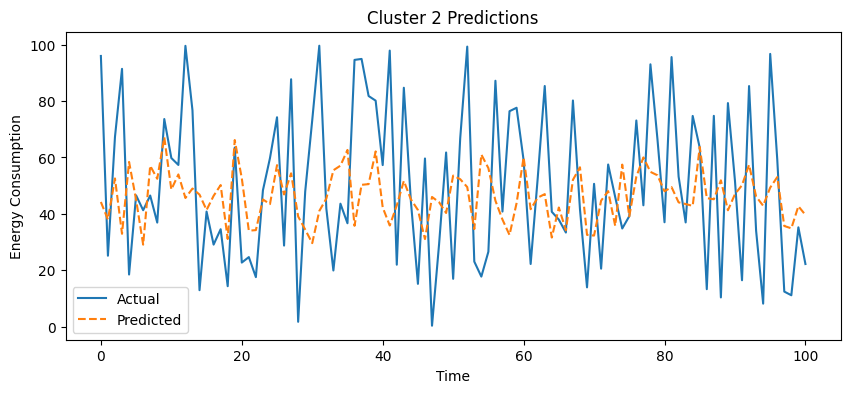

Cluster 2: MAE = 22.870, MSE = 770.766
Processing Cluster 0
Epoch 1/100
3/3 [==============================] - 2s 238ms/step - loss: 0.3555 - val_loss: 0.3447
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3299 - val_loss: 0.3251
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3148 - val_loss: 0.3064
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.2942 - val_loss: 0.2886
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2737 - val_loss: 0.2717
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.2600 - val_loss: 0.2555
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2454 - val_loss: 0.2403
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2304 - val_loss: 0.2262
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 0.2085 - val_loss: 0.2128
Epoch 10/100
3/3 [==============================] - 0s 20

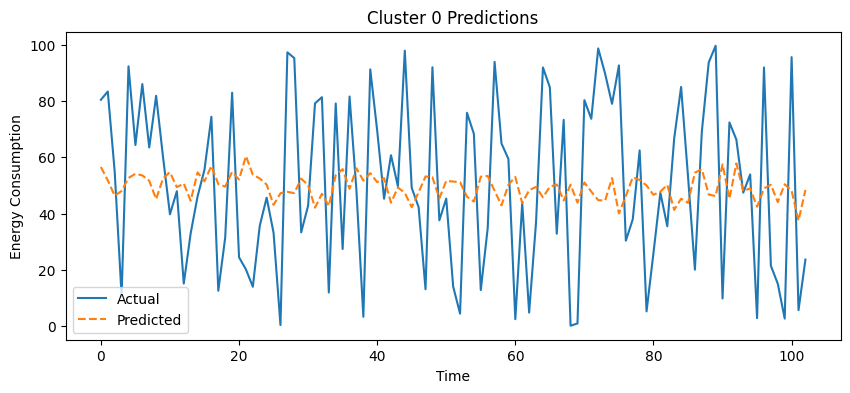

Cluster 0: MAE = 26.836, MSE = 961.786
Processing Cluster 1
Epoch 1/100
3/3 [==============================] - 2s 237ms/step - loss: 0.2994 - val_loss: 0.2556
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.2891 - val_loss: 0.2404
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2730 - val_loss: 0.2257
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2530 - val_loss: 0.2115
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2419 - val_loss: 0.1980
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2245 - val_loss: 0.1850
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2096 - val_loss: 0.1725
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1991 - val_loss: 0.1606
Epoch 9/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1893 - val_loss: 0.1492
Epoch 10/100
3/3 [==============================] - 0s 20

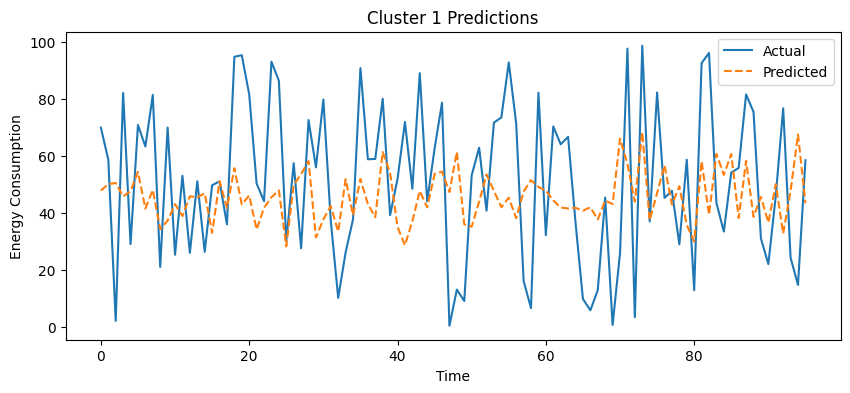

Cluster 1: MAE = 24.054, MSE = 779.105
MAE Metrics: {2: 22.869743519488548, 0: 26.836037183900096, 1: 24.053859245344512}
MSE Metrics: {2: 770.7657419232005, 0: 961.7862230790361, 1: 779.1051304920557}


In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Multiply, Permute, Dropout, Flatten, Activation, RepeatVector, Lambda
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import backend as K

# Data preparation function
def prepare_data(data, feature_range=(0, 1)):
    scaler = MinMaxScaler(feature_range=feature_range)
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Adding Attention Layer
def attention_layer(inputs, neurons):
    attention = Dense(1, activation='tanh')(inputs)
    attention = Flatten()(attention)
    attention = Activation('softmax')(attention)
    attention = RepeatVector(neurons)(attention)
    attention = Permute([2, 1])(attention)
    representation = Multiply()([inputs, attention])
    representation = Lambda(lambda xin: K.sum(xin, axis=-2), output_shape=(neurons,))(representation)
    return representation

# Define LSTM model with Attention
def create_attention_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    lstm_out = LSTM(50, return_sequences=True)(inputs)
    lstm_out = Dropout(0.3)(lstm_out)
    attention_output = attention_layer(lstm_out, 50)
    output = Dense(1)(attention_output)
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(optimizer=Adam(clipvalue=0.5), loss='mse')
    return model

# Function to train the model
def train_lstm_model(model, X, y, epochs=100, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=[early_stopping])
    return model, history

# Function to predict using the model
def predict_lstm_model(model, X):
    return model.predict(X)

# Load or simulate data
data_points = 300
df = pd.DataFrame({
    'Cluster': np.random.choice([0, 1, 2], data_points),
    'feature1': np.random.randn(data_points),
    'feature2': np.random.rand(data_points),
    'consumption': np.random.rand(data_points) * 100
})

# Analysis by cluster
models = {}
mae_metrics = {}
mse_metrics = {}

for cluster in df['Cluster'].unique():
    print(f"Processing Cluster {cluster}")
    cluster_data = df[df['Cluster'] == cluster][['feature1', 'feature2', 'consumption']]

    scaled_data, scaler = prepare_data(cluster_data)
    X, y = scaled_data[:, :-1], scaled_data[:, -1]
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    model = create_attention_lstm_model((X.shape[1], X.shape[2]))
    model, history = train_lstm_model(model, X, y)

    y_pred = predict_lstm_model(model, X)
    y_pred_rescaled = scaler.inverse_transform(np.column_stack((X.reshape(X.shape[0], X.shape[2]), y_pred)))[:, -1]
    actual_rescaled = scaler.inverse_transform(scaled_data)[:, -1]

    mae = mean_absolute_error(actual_rescaled, y_pred_rescaled)
    mse = mean_squared_error(actual_rescaled, y_pred_rescaled)
    mae_metrics[cluster] = mae
    mse_metrics[cluster] = mse

    # Plot results
    plt.figure(figsize=(10, 4))
    plt.plot(actual_rescaled, label='Actual')
    plt.plot(y_pred_rescaled, label='Predicted', linestyle='--')
    plt.title(f'Cluster {cluster} Predictions')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.legend()
    plt.show()

    print(f"Cluster {cluster}: MAE = {mae:.3f}, MSE = {mse:.3f}")

# Display metrics
print("MAE Metrics:", mae_metrics)
print("MSE Metrics:", mse_metrics)